In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
sns.set(rc={'figure.figsize' :[6,6]} , font_scale=1.2)

<h1 style="font-family:Brush Script MT; font-size:3.4em;color:black;">  Villas's Problem </h1>


<h2 style="font-family:Times New Roman; font-size:2.4m;color:black;"><em> About Dataset</em> </h2>

<h2 style="font-family:Times New Roman; font-size:2.4m;color:black;"> <u>Problem Statment:</u> </h2>
<p style="font-family:Times New Roman; font-size:2.0m;color:black;"><strong>Recently, real estate prices in  Egypt have witnessed a rise, especially in villa real estate, and because housing is one of the most important living factors, this file helps to predict prices according to each region in Egypt,and takes into account the factors affecting the increase in the villa price, such as the Compound and other features within each villa.
   
train_data.csv is the training dataset test_data.csv is the testing dataset</strong></p>


<h1 style="font-family:Times New Roman; font-size:2.0em;color:black;"> Data Description: </h1>

<p style="font-family:Times New Roman; font-size:2.4m;color:blue;"><strong>Content: the Villa prices in Eypt data contain 17 features for each villa that help to predict villa price</strong></p>


| Feature | Type | Description |
| --------| ---- | ----------- |
| price | float | Villa price  |
| Date | datetime | Date of publishing advertising on the website |
| title| object| Description of villa |
| link | object | Villa link on website |
| viwers| int | Villa viwers |
| negotiable| float | Is the owner negotiable in price or not? |
| Bedrooms| float | number of bedrooms in villa |
| Bathrooms| float | number of bathrooms in villa|
|Area (m²)| float  | Villa area |
|Type| object | type of villa |
|Payment Option| object | payment way |
|Compound| object | The compound to which the villa belongs  |
|Delivery Term| float | The finishing of villa  |
|Amenities| object | What features that villa contains |
|Furnished| object | check if villa funshied or not  |
|Delivery Date| object | when villa delivers   |
|Down Payment| object | check if it has down payment or not |

<h1 style="font-family:Times New Roman; font-size:2.0em;color:black;"> Villa's  problem </h1>
<h2 style="font-family:Times New Roman; font-size:1.5em;color:black;"> Read dataset: </h2>

1. **Delivery Term:**بدون تشطيب / على المحارة / على العظم core& shell .

2. **Down Payment:** المقدم

In [2]:
df=pd.read_csv('villas.csv')
df


,price,location,data,title,link,viwers,negotiable,Bedrooms,Bathrooms,Area (m²),Type,Payment Option,Compound,Delivery Term,Amenities,Furnished,Delivery Date,Down Payment,vlaues
0,"7,400,000 EGP",Sheikh Zayed، Giza,9 March 2022,استغل الفرصه وامتلك اخر فيلا في ليك ويست بتسهي...,https://www.olx.com.eg/en/ad/8-IDcHny4.html,54,0.0,['4'],['4'],['338'],"['Stand', 'Alone', 'Villa']","['Cash', 'or', 'Installment']","['Lake', 'West']","['Core', '&', 'Shell']",NaN,NaN,NaN,NaN,NaN
1,"7,700,000 EGP",Rehab City، Cairo,1 March 2022,فيلا للبيع نموذج c بمدينة الرحاب تشطيب كامل,https://www.olx.com.eg/en/ad/c-IDcGhF0.html,291,0.0,['3'],['3'],['456'],"['Stand', 'Alone', 'Villa']",['Cash'],NaN,['Finished'],"['Balcony', 'Pets', 'Allowed', 'Private', 'Gar...",['No'],"['Ready', 'to', 'move']",NaN,NaN
2,"4,900,000 EGP",Shorouk City، Cairo,10 January 2022,تاون هاوس245م للبيع بأفضل نظم سداد استلام خلال...,https://www.olx.com.eg/en/ad/245-gcv-IDc4U6j.html,205,0.0,['4'],['2'],['245'],"['Town', 'House']","['Cash', 'or', 'Installment']",['GCR'],NaN,"['Balcony', 'Built', 'in', 'Kitchen', 'Applian...",['No'],['2022'],NaN,NaN
3,"6,500,000 EGP","New Cairo - El Tagamoa, Cairo",10 March 2022,توين هاوس 255م للبيع - هايد بارك - التجمع,https://www.olx.com.eg/en/ad/255-IDcqiQS.html,67,0.0,['4'],['4'],['255'],"['Twin', 'House']",['Cash'],"['Hyde', 'Park', 'New', 'Cairo']","['Semi', 'Finished']","['Private', 'Garden', 'Security']",['No'],"['Ready', 'to', 'move']",NaN,NaN
4,"12,000,000 EGP",Sheikh Zayed، Giza,27 February 2022,للبيع فيلا بسعر مميز علي الجولف كمبوند الربوة,https://www.olx.com.eg/en/ad/-IDcG0Qo.html,165,0.0,['4'],['3'],['800'],"['Stand', 'Alone', 'Villa']",['Cash'],"['Al', 'Rabwa']",['Finished'],"['Balcony', 'Built', 'in', 'Kitchen', 'Applian...",['No'],"['Ready', 'to', 'move']",['1'],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21732,"15,380,000 EGP","New Cairo - El Tagamoa, Cairo",23 January 2022,Hyde park chill out in amazing standalone in p...,https://www.olx.com.eg/en/ad/hyde-park-chill-o...,12,0.0,['5'],['5'],['630'],"['Stand', 'Alone', 'Villa']",['Cash'],"['Hyde', 'Park', 'New', 'Cairo']","['Core', '&', 'Shell']","['Private', 'Garden', 'Built', 'in', 'Kitchen'...",['No'],"['Ready', 'to', 'move']",NaN,NaN
21733,"750,000 EGP",New Capital City، Cairo,23 January 2022,فيلا للبيع بالتقسيط استلام فوري في كمبوند البو...,https://www.olx.com.eg/en/ad/-IDcBgOe.html,14,0.0,['3'],['3'],['250'],"['Twin', 'House']","['Cash', 'or', 'Installment']","['IL', 'Bosco']",NaN,NaN,NaN,"['Ready', 'to', 'move']","['750,000']",NaN
21734,"5,500,000 EGP","Sheikh Zayed, Giza",23 January 2022,City villa for sale in west town sodic,https://www.olx.com.eg/en/ad/city-villa-for-sa...,20,0.0,['5'],['6'],['250'],"['Town', 'House']",NaN,"['Sodic', 'Westown']",NaN,NaN,NaN,NaN,NaN,NaN
21735,"5,500,000 EGP","Sheikh Zayed, Giza",23 January 2022,سيتي فيلا للبيع في ويست تاون سوديك,https://www.olx.com.eg/en/ad/-IDcBgNi.html,13,0.0,['5'],['6'],['250'],"['Town', 'House']",NaN,"['Sodic', 'Westown']",NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 19)


<h1 style="font-family:Times New Roman; font-size:2.4em;color:black;"> Data Preprocessing</h1>
<h1 style="font-family:Times New Roman; font-size:1.5em;color:black;"> Feature Engineering & Extraction: </h1>

<ul>
  <li>Data Cleaning or Cleansing</li>
  <li>Date and Time Features</li>
  <li>String Operations</li>
  <li>Text Features</li>
  <li>Work with missing Data</li>
</ul>
 


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21737 entries, 0 to 21736
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21703 non-null  object 
 1   location        21736 non-null  object 
 2   data            21736 non-null  object 
 3   title           21736 non-null  object 
 4   link            21737 non-null  object 
 5   viwers          21737 non-null  object 
 6   negotiable      21703 non-null  float64
 7   Bedrooms        21703 non-null  object 
 8   Bathrooms       21703 non-null  object 
 9   Area (m²)       21703 non-null  object 
 10  Type            21703 non-null  object 
 11  Payment Option  17664 non-null  object 
 12  Compound        13373 non-null  object 
 13  Delivery Term   11912 non-null  object 
 14  Amenities       15815 non-null  object 
 15  Furnished       13846 non-null  object 
 16  Delivery Date   14740 non-null  object 
 17  Down Payment    4238 non-null  

In [5]:
df.isna().sum()

price                34
location              1
data                  1
title                 1
link                  0
viwers                0
negotiable           34
Bedrooms             34
Bathrooms            34
Area (m²)            34
Type                 34
Payment Option     4073
Compound           8364
Delivery Term      9825
Amenities          5922
Furnished          7891
Delivery Date      6997
Down Payment      17499
vlaues            21704
dtype: int64

## Price

In [6]:
df[df['price'].isna()]

,price,location,data,title,link,viwers,negotiable,Bedrooms,Bathrooms,Area (m²),Type,Payment Option,Compound,Delivery Term,Amenities,Furnished,Delivery Date,Down Payment,vlaues
206,NaN,"<strong class=""c2b small"">\n\t\t\t\tNew Cairo ...","<span class=""pdingleft10 brlefte5"">\n\t\t\t\t\...","<h1 class=""brkword lheight28"">\n\t\t\n\t\tللاث...",https://www.olx.com.eg/en/ad/4600-IDciHPj.html,"[<div class=""clr pdingtop10 brtop-1 rel zi5"">\...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"<table cellpadding=""0"" cellspacing=""0"" class=""..."
387,NaN,"<strong class=""c2b small"">\n\t\t\t\tGiza Distr...","<span class=""pdingleft10 brlefte5"">\n\t\t\t\t\...","<h1 class=""brkword lheight28"">\n\t\t\n\t\tللبي...",https://www.olx.com.eg/en/ad/-IDbTMBU.html,"[<div class=""clr pdingtop10 brtop-1 rel zi5"">\...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"<table cellpadding=""0"" cellspacing=""0"" class=""..."
1609,NaN,"<strong class=""c2b small"">\n\t\t\t\t10th of Ra...","<span class=""pdingleft10 brlefte5"">\n\t\t\t\t\...","<h1 class=""brkword lheight28"">\n\t\t\n\t\tمنزل...",https://www.olx.com.eg/en/ad/-IDcHpTg.html,"[<div class=""clr pdingtop10 brtop-1 rel zi5"">\...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"<table cellpadding=""0"" cellspacing=""0"" class=""..."
1716,NaN,"<strong class=""c2b small"">\n\t\t\t\tNew Cairo ...","<span class=""pdingleft10 brlefte5"">\n\t\t\t\t\...","<h1 class=""brkword lheight28"">\n\t\t\n\t\tللبي...",https://www.olx.com.eg/en/ad/-IDcGigZ.html,"[<div class=""clr pdingtop10 brtop-1 rel zi5"">\...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"<table cellpadding=""0"" cellspacing=""0"" class=""..."
2179,NaN,"<strong class=""c2b small"">\n\t\t\t\tNew Cairo ...","<span class=""pdingleft10 brlefte5"">\n\t\t\t\t\...","<h1 class=""brkword lheight28"">\n\t\t\n\t\tMivi...",https://www.olx.com.eg/en/ad/mivida-fully-fini...,"[<div class=""clr pdingtop10 brtop-1 rel zi5"">\...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"<table cellpadding=""0"" cellspacing=""0"" class=""..."
2820,NaN,"<strong class=""c2b small"">\n\t\t\t\tNew Cairo ...","<span class=""pdingleft10 brlefte5"">\n\t\t\t\t\...","<h1 class=""brkword lheight28"">\n\t\t\n\t\tTwin...",https://www.olx.com.eg/en/ad/twin-house-for-sa...,"[<div class=""clr pdingtop10 brtop-1 rel zi5"">\...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"<table cellpadding=""0"" cellspacing=""0"" class=""..."
3255,NaN,"<strong class=""c2b small"">\n\t\t\t\tMansura، D...","<span class=""pdingleft10 brlefte5"">\n\t\t\t\t\...","<h1 class=""brkword lheight28"">\n\t\t\n\t\tVill...",https://www.olx.com.eg/en/ad/villas-IDcH0AR.html,"[<div class=""clr pdingtop10 brtop-1 rel zi5"">\...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"<table cellpadding=""0"" cellspacing=""0"" class=""..."
3808,NaN,"<strong class=""c2b small"">\n\t\t\t\tNew Cairo ...","<span class=""pdingleft10 brlefte5"">\n\t\t\t\t\...","<h1 class=""brkword lheight28"">\n\t\t\n\t\tVill...",https://www.olx.com.eg/en/ad/villa-at-hayah-fo...,"[<div class=""clr pdingtop10 brtop-1 rel zi5"">\...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"<table cellpadding=""0"" cellspacing=""0"" class=""..."
4388,NaN,"<strong class=""c2b small"">\n\t\t\t\t6th of Oct...","<span class=""pdingleft10 brlefte5"">\n\t\t\t\t\...","<h1 class=""brkword lheight28"">\n\t\t\n\t\tفيلا...",https://www.olx.com.eg/en/ad/-IDcGByb.html,"[<div class=""clr pdingtop10 brtop-1 rel zi5"">\...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"<table cellpadding=""0"" cellspacing=""0"" class=""..."
4427,NaN,"<strong class=""c2b small"">\n\t\t\t\tSheikh Zay...","<span class=""pdingleft10 brlefte5"">\n\t\t\t\t\...","<h1 class=""brkword lheight28"">\n\t\t\n\t\tللاث...",https://www.olx.com.eg/en/ad/4100-IDcGAt0.html,"[<div class=""clr pdingtop10 brtop-1 rel zi5"">\...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"<table cellpadding=""0"" cellspacing=""0"" class=""..."


In [7]:
type(df['price'][1609])

float

In [8]:
df['price'][5]

'5,035,000 EGP'

In [9]:
df['price'] = df['price'].fillna('')

In [10]:
def get_price(p):
    try:
        if p=='':
            return 'nan'
        else:
            s = p.split(' ')[0].split(',')
            str1 = ''.join(s)
            return str1
    except:
        return 'nan'
    
df['price']=df['price'].apply(get_price)

In [11]:
df['price'] = pd.to_numeric(df['price'], errors='coerce',downcast='float')

In [12]:
df['price'].isna().sum()

34

In [13]:
df.dropna(subset=['price'] , inplace=True)

In [14]:
df['price'].describe()

count       21703.0
mean      8580535.0
std       7865314.0
min         50000.0
25%       4300000.0
50%       6800000.0
75%      10500000.0
max      90500000.0
Name: price, dtype: float64

<AxesSubplot:ylabel='Density'>

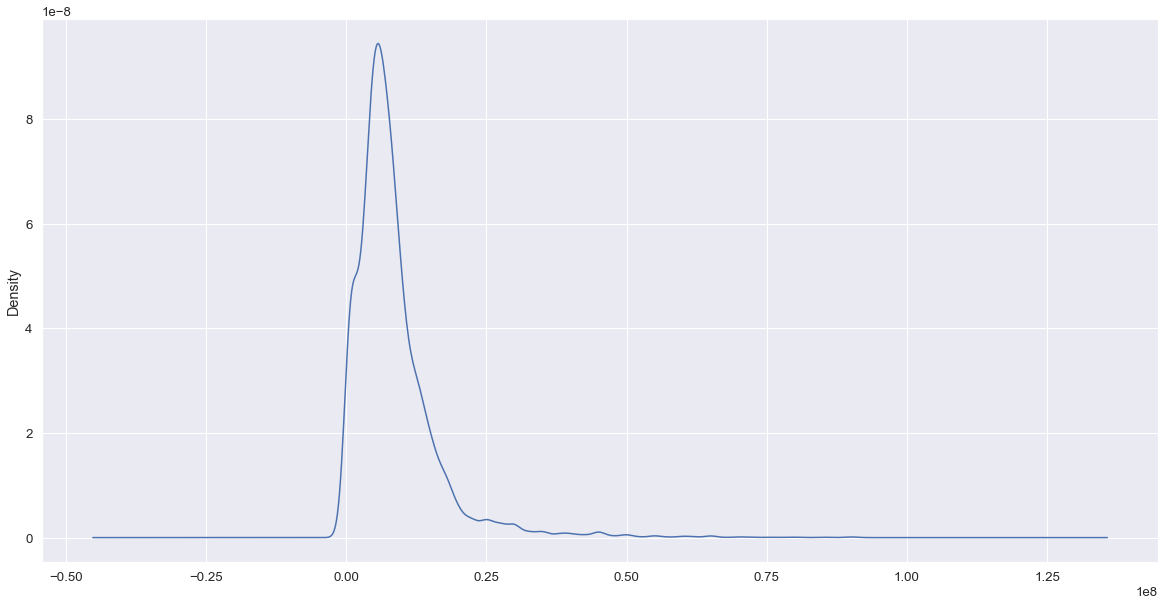

In [15]:
df['price'].plot(kind = 'kde', figsize = (20, 10))

In [16]:
min_price = 2_000_000
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
lower_whisker = q1 - 1.5 * iqr
if lower_whisker < min_price:
    lower_whisker = min_price
upper_whisker = q3 + 1.5 * iqr
lower_whisker, upper_whisker



(2000000, 19800000.0)

In [17]:
filt = (df['price'] < lower_whisker) | (df['price'] > upper_whisker)
filt.sum()

3798

In [18]:
indices = filt[filt].index
df.drop(indices, inplace = True)

<AxesSubplot:ylabel='Density'>

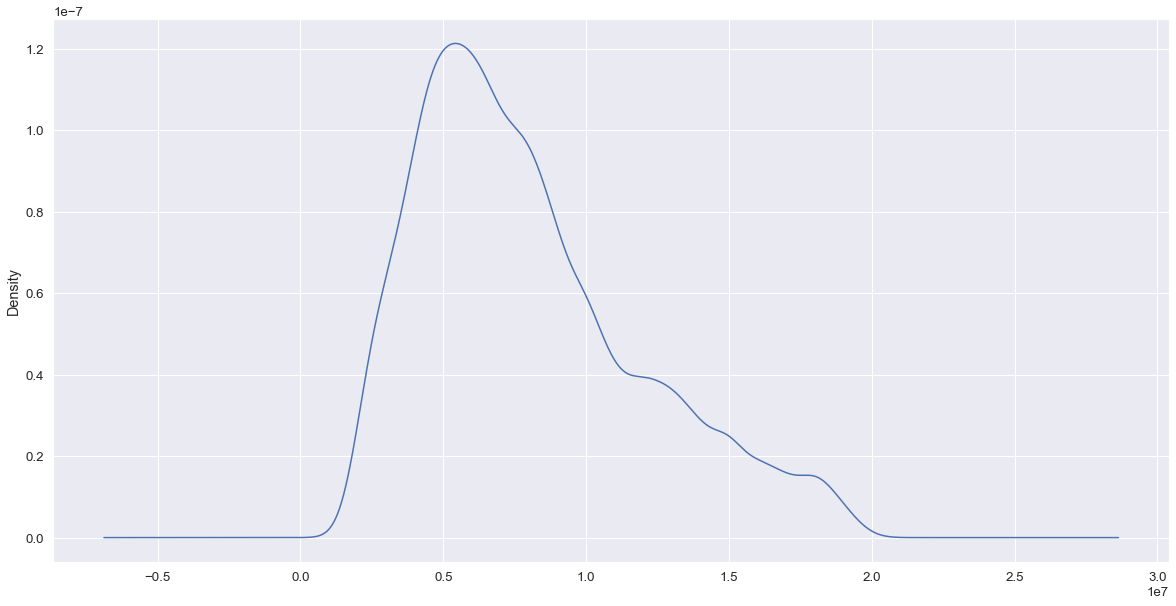

In [19]:
df['price'].plot(kind = 'kde', figsize = (20, 10))


In [20]:
df['price'].isna().sum()

0

C:\Users\Sarah\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price'>

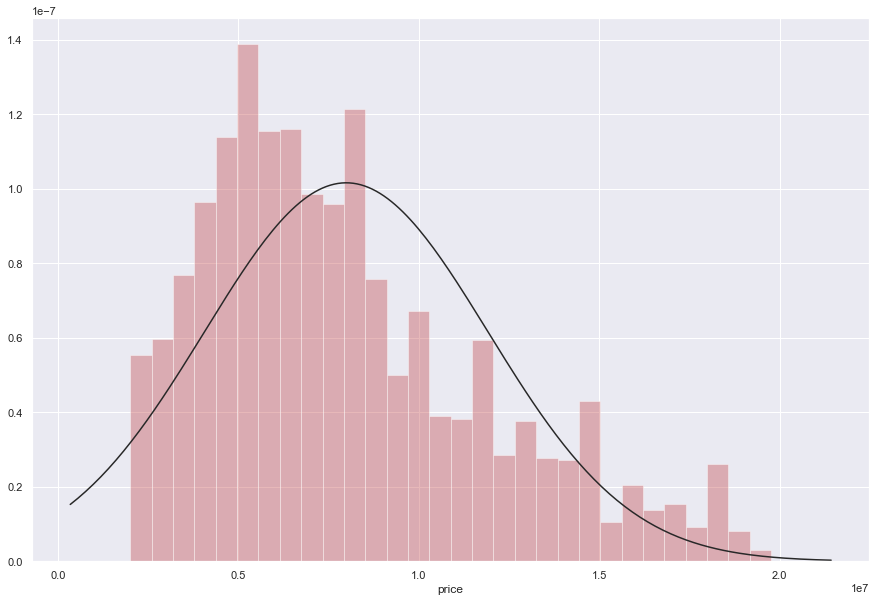

In [21]:
sns.set(rc={"figure.figsize": (15, 10)}); np.random.seed(0)
sns.set_color_codes()
sns.distplot(df['price'],fit=norm ,kde=False, bins=30, color='r')



In [22]:
df

,price,location,data,title,link,viwers,negotiable,Bedrooms,Bathrooms,Area (m²),Type,Payment Option,Compound,Delivery Term,Amenities,Furnished,Delivery Date,Down Payment,vlaues
0,7400000.0,Sheikh Zayed، Giza,9 March 2022,استغل الفرصه وامتلك اخر فيلا في ليك ويست بتسهي...,https://www.olx.com.eg/en/ad/8-IDcHny4.html,54,0.0,['4'],['4'],['338'],"['Stand', 'Alone', 'Villa']","['Cash', 'or', 'Installment']","['Lake', 'West']","['Core', '&', 'Shell']",NaN,NaN,NaN,NaN,NaN
1,7700000.0,Rehab City، Cairo,1 March 2022,فيلا للبيع نموذج c بمدينة الرحاب تشطيب كامل,https://www.olx.com.eg/en/ad/c-IDcGhF0.html,291,0.0,['3'],['3'],['456'],"['Stand', 'Alone', 'Villa']",['Cash'],NaN,['Finished'],"['Balcony', 'Pets', 'Allowed', 'Private', 'Gar...",['No'],"['Ready', 'to', 'move']",NaN,NaN
2,4900000.0,Shorouk City، Cairo,10 January 2022,تاون هاوس245م للبيع بأفضل نظم سداد استلام خلال...,https://www.olx.com.eg/en/ad/245-gcv-IDc4U6j.html,205,0.0,['4'],['2'],['245'],"['Town', 'House']","['Cash', 'or', 'Installment']",['GCR'],NaN,"['Balcony', 'Built', 'in', 'Kitchen', 'Applian...",['No'],['2022'],NaN,NaN
3,6500000.0,"New Cairo - El Tagamoa, Cairo",10 March 2022,توين هاوس 255م للبيع - هايد بارك - التجمع,https://www.olx.com.eg/en/ad/255-IDcqiQS.html,67,0.0,['4'],['4'],['255'],"['Twin', 'House']",['Cash'],"['Hyde', 'Park', 'New', 'Cairo']","['Semi', 'Finished']","['Private', 'Garden', 'Security']",['No'],"['Ready', 'to', 'move']",NaN,NaN
4,12000000.0,Sheikh Zayed، Giza,27 February 2022,للبيع فيلا بسعر مميز علي الجولف كمبوند الربوة,https://www.olx.com.eg/en/ad/-IDcG0Qo.html,165,0.0,['4'],['3'],['800'],"['Stand', 'Alone', 'Villa']",['Cash'],"['Al', 'Rabwa']",['Finished'],"['Balcony', 'Built', 'in', 'Kitchen', 'Applian...",['No'],"['Ready', 'to', 'move']",['1'],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21731,6200000.0,New Cairo - El Tagamoa، Cairo,23 January 2022,Twin house فيلا 20% مقدم تسليم فورى توين هاوس ...,https://www.olx.com.eg/en/ad/twin-house-20-4-I...,10,0.0,['4'],['4'],['300'],"['Twin', 'House']",['Installment'],"['Cleopatra', 'Palace']","['Semi', 'Finished']","['Balcony', 'Covered', 'Parking', 'Maids', 'Ro...",['No'],"['Ready', 'to', 'move']","['1,240,000']",NaN
21732,15380000.0,"New Cairo - El Tagamoa, Cairo",23 January 2022,Hyde park chill out in amazing standalone in p...,https://www.olx.com.eg/en/ad/hyde-park-chill-o...,12,0.0,['5'],['5'],['630'],"['Stand', 'Alone', 'Villa']",['Cash'],"['Hyde', 'Park', 'New', 'Cairo']","['Core', '&', 'Shell']","['Private', 'Garden', 'Built', 'in', 'Kitchen'...",['No'],"['Ready', 'to', 'move']",NaN,NaN
21734,5500000.0,"Sheikh Zayed, Giza",23 January 2022,City villa for sale in west town sodic,https://www.olx.com.eg/en/ad/city-villa-for-sa...,20,0.0,['5'],['6'],['250'],"['Town', 'House']",NaN,"['Sodic', 'Westown']",NaN,NaN,NaN,NaN,NaN,NaN
21735,5500000.0,"Sheikh Zayed, Giza",23 January 2022,سيتي فيلا للبيع في ويست تاون سوديك,https://www.olx.com.eg/en/ad/-IDcBgNi.html,13,0.0,['5'],['6'],['250'],"['Town', 'House']",NaN,"['Sodic', 'Westown']",NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df['price'].describe()

count       17905.00
mean      7984867.00
std       3926756.75
min       2000000.00
25%       5000000.00
50%       7125000.00
75%      10000000.00
max      19760002.00
Name: price, dtype: float64

## Date

In [24]:
df.isnull().sum()

price                 0
location              0
data                  0
title                 0
link                  0
viwers                0
negotiable            0
Bedrooms              0
Bathrooms             0
Area (m²)             0
Type                  0
Payment Option     3125
Compound           6160
Delivery Term      7324
Amenities          4963
Furnished          6229
Delivery Date      4983
Down Payment      14462
vlaues            17905
dtype: int64

In [25]:
df.rename(columns = {'data':'Date', }, inplace = True) 

In [26]:
# 
# df['Date'] = df['Date'].fillna('')

# def get_date(d):
#     if d!='':
#         if d.startswith('<span') :
#             return str(d).split('<span')[1].split(',')[1]
#         else:
#             return d
#     else:
#         return np.nan
    
# df['Date'] = df['Date'].apply(get_date)
# 

In [27]:
df['Date'].isna().sum()

0

In [28]:
# 10 July 2021, 10:54:27AM
#datetime.strftime("%-d %B %Y, %I:%M:%S%p")


In [29]:
df['Date'] = pd.to_datetime(df['Date'], format=' %d %B %Y', errors='coerce')

df['Day'] = df['Date'].dt.day 

df['Month'] = df['Date'].dt.month

df['Year'] = df['Date'].dt.year

In [30]:
def get_season(x):
    if x in [12, 1, 2]:
        return 'Winter'
    elif x in [3, 4, 5]:
        return 'Spring'
    elif x in [6, 7, 8]:
        return 'Summer'
    elif x in [9, 10, 11]:
        return 'Autumn'

df['Season'] = df['Month'].apply(get_season)

In [31]:
df.drop('Date' ,axis=1 , inplace=True)

In [32]:
df

,price,location,title,link,viwers,negotiable,Bedrooms,Bathrooms,Area (m²),Type,...,Delivery Term,Amenities,Furnished,Delivery Date,Down Payment,vlaues,Day,Month,Year,Season
0,7400000.0,Sheikh Zayed، Giza,استغل الفرصه وامتلك اخر فيلا في ليك ويست بتسهي...,https://www.olx.com.eg/en/ad/8-IDcHny4.html,54,0.0,['4'],['4'],['338'],"['Stand', 'Alone', 'Villa']",...,"['Core', '&', 'Shell']",NaN,NaN,NaN,NaN,NaN,9,3,2022,Spring
1,7700000.0,Rehab City، Cairo,فيلا للبيع نموذج c بمدينة الرحاب تشطيب كامل,https://www.olx.com.eg/en/ad/c-IDcGhF0.html,291,0.0,['3'],['3'],['456'],"['Stand', 'Alone', 'Villa']",...,['Finished'],"['Balcony', 'Pets', 'Allowed', 'Private', 'Gar...",['No'],"['Ready', 'to', 'move']",NaN,NaN,1,3,2022,Spring
2,4900000.0,Shorouk City، Cairo,تاون هاوس245م للبيع بأفضل نظم سداد استلام خلال...,https://www.olx.com.eg/en/ad/245-gcv-IDc4U6j.html,205,0.0,['4'],['2'],['245'],"['Town', 'House']",...,NaN,"['Balcony', 'Built', 'in', 'Kitchen', 'Applian...",['No'],['2022'],NaN,NaN,10,1,2022,Winter
3,6500000.0,"New Cairo - El Tagamoa, Cairo",توين هاوس 255م للبيع - هايد بارك - التجمع,https://www.olx.com.eg/en/ad/255-IDcqiQS.html,67,0.0,['4'],['4'],['255'],"['Twin', 'House']",...,"['Semi', 'Finished']","['Private', 'Garden', 'Security']",['No'],"['Ready', 'to', 'move']",NaN,NaN,10,3,2022,Spring
4,12000000.0,Sheikh Zayed، Giza,للبيع فيلا بسعر مميز علي الجولف كمبوند الربوة,https://www.olx.com.eg/en/ad/-IDcG0Qo.html,165,0.0,['4'],['3'],['800'],"['Stand', 'Alone', 'Villa']",...,['Finished'],"['Balcony', 'Built', 'in', 'Kitchen', 'Applian...",['No'],"['Ready', 'to', 'move']",['1'],NaN,27,2,2022,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21731,6200000.0,New Cairo - El Tagamoa، Cairo,Twin house فيلا 20% مقدم تسليم فورى توين هاوس ...,https://www.olx.com.eg/en/ad/twin-house-20-4-I...,10,0.0,['4'],['4'],['300'],"['Twin', 'House']",...,"['Semi', 'Finished']","['Balcony', 'Covered', 'Parking', 'Maids', 'Ro...",['No'],"['Ready', 'to', 'move']","['1,240,000']",NaN,23,1,2022,Winter
21732,15380000.0,"New Cairo - El Tagamoa, Cairo",Hyde park chill out in amazing standalone in p...,https://www.olx.com.eg/en/ad/hyde-park-chill-o...,12,0.0,['5'],['5'],['630'],"['Stand', 'Alone', 'Villa']",...,"['Core', '&', 'Shell']","['Private', 'Garden', 'Built', 'in', 'Kitchen'...",['No'],"['Ready', 'to', 'move']",NaN,NaN,23,1,2022,Winter
21734,5500000.0,"Sheikh Zayed, Giza",City villa for sale in west town sodic,https://www.olx.com.eg/en/ad/city-villa-for-sa...,20,0.0,['5'],['6'],['250'],"['Town', 'House']",...,NaN,NaN,NaN,NaN,NaN,NaN,23,1,2022,Winter
21735,5500000.0,"Sheikh Zayed, Giza",سيتي فيلا للبيع في ويست تاون سوديك,https://www.olx.com.eg/en/ad/-IDcBgNi.html,13,0.0,['5'],['6'],['250'],"['Town', 'House']",...,NaN,NaN,NaN,NaN,NaN,NaN,23,1,2022,Winter


<AxesSubplot:xlabel='Season', ylabel='count'>

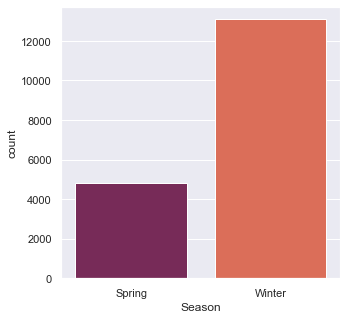

In [33]:
sns.set(rc={"figure.figsize": (5, 5)}); np.random.seed(0)
sns.countplot(x='Season',  data=df,palette='rocket')

<AxesSubplot:xlabel='Month', ylabel='count'>

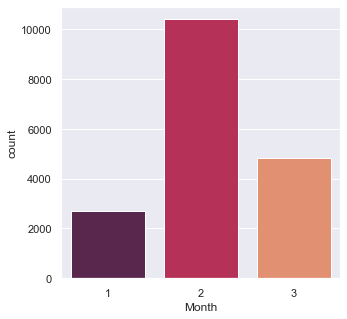

In [34]:
sns.countplot(x='Month',  data=df,palette='rocket')

In [35]:
#sns.countplot(x='Day',  data=df,palette='rocket')
pd.pivot_table( data=df ,columns='Month' ,index='Day' , values='price' )

Month,1,2,3
Day,,,
1,NaN,8435977.0,8584250.0
2,NaN,8514006.0,8258835.0
3,NaN,7727351.5,8462551.0
4,NaN,7607705.5,6957131.5
5,NaN,7644106.5,8177627.0
6,NaN,8187478.0,7525291.5
7,NaN,7833189.0,7626741.5
8,NaN,8010732.0,7685941.5
9,NaN,8208915.5,7983456.0


## Location

In [36]:
#df['location'].unique()

In [37]:
#trans_table = str.maketrans(',', '،')
#trans_table

In [38]:
df['location'][10693]#.split('،')

'Port Fouad, Port Said'

In [39]:
df['location'].unique()

array(['Sheikh Zayed، Giza', 'Rehab City، Cairo', 'Shorouk City، Cairo',
       'New Cairo - El Tagamoa, Cairo', 'Nasr City، Cairo',
       'Madinaty، Cairo', 'New Cairo - El Tagamoa، Cairo',
       '6th of October، Giza', 'Madinaty, Cairo', 'Mokattam, Cairo',
       '6th of October, Giza', 'Mansura، Dakahlia', 'Sheikh Zayed, Giza',
       'Hurghada، Red Sea', 'Sidi Beshr، Alexandria',
       'Fayoum City، Fayoum', 'Dokki، Giza', 'New Capital City، Cairo',
       'Mostakbal City، Cairo', 'North Coast، Matruh',
       'Heliopolis، Cairo', 'Borg al-Arab، Alexandria', 'Mokattam، Cairo',
       'Zohour District، Port Said', 'Rehab City, Cairo',
       'Hadayek al-Ahram، Giza', 'Obour City، Cairo',
       'Borg al-Arab, Alexandria', 'Hurghada, Red Sea',
       '10th of Ramadan، Sharqia', 'Maadi، Cairo', 'Isna، Luxor',
       'Khosous، Qalyubia', 'Obour City, Cairo',
       'Hadayek 6th of October، Giza', 'Nubariyah، Beheira',
       'Giza District، Giza', 'San Stefano، Alexandria',
       '

In [40]:
#print(df['location'][1000].split(',')[1])

In [41]:
def get_country(d):
    if pd.notna(d):
        if '،' in d:
            return d.split('،')[1].strip()
        elif ',' in d:
            return d.split(',')[1].strip()
    else:
        return np.nan
    


    
df['country'] = df['location'].apply(get_country)

In [42]:
print(df['country'].unique())
print(df['location'].unique())

['Giza' 'Cairo' 'Dakahlia' 'Red Sea' 'Alexandria' 'Fayoum' 'Matruh'
 'Port Said' 'Sharqia' 'Luxor' 'Qalyubia' 'Beheira' 'Damietta' 'Gharbia'
 'Suez' 'Ismailia' 'Asyut' 'Sohag' 'South Sinai' 'Monufia' 'Minya' 'Aswan'
 'Kafr al-Sheikh' 'Qena' 'Beni Suef']
['Sheikh Zayed، Giza' 'Rehab City، Cairo' 'Shorouk City، Cairo'
 'New Cairo - El Tagamoa, Cairo' 'Nasr City، Cairo' 'Madinaty، Cairo'
 'New Cairo - El Tagamoa، Cairo' '6th of October، Giza' 'Madinaty, Cairo'
 'Mokattam, Cairo' '6th of October, Giza' 'Mansura، Dakahlia'
 'Sheikh Zayed, Giza' 'Hurghada، Red Sea' 'Sidi Beshr، Alexandria'
 'Fayoum City، Fayoum' 'Dokki، Giza' 'New Capital City، Cairo'
 'Mostakbal City، Cairo' 'North Coast، Matruh' 'Heliopolis، Cairo'
 'Borg al-Arab، Alexandria' 'Mokattam، Cairo' 'Zohour District، Port Said'
 'Rehab City, Cairo' 'Hadayek al-Ahram، Giza' 'Obour City، Cairo'
 'Borg al-Arab, Alexandria' 'Hurghada, Red Sea' '10th of Ramadan، Sharqia'
 'Maadi، Cairo' 'Isna، Luxor' 'Khosous، Qalyubia' 'Obour City, 

In [43]:
# def get_location1(d):
#     if pd.notna(d):
#         if d.startswith('<strong') :
#             return str(d).split('\t')[4]
#         else:
#             return d
#     else:
#         return np.nan
    
# df['location'] = df['location'].apply(get_location1)

In [44]:
#df['location'] = df['location'].fillna('')

def get_location2(d):
    if pd.notna(d):
        if '،' in (d):
            return d.split('،')[0]
        elif ',' in d: 
            return d.split(',')[0]
    else:
        return np.nan
    
df['location'] = df['location'].apply(get_location2)

In [45]:
df['country'].unique()

array(['Giza', 'Cairo', 'Dakahlia', 'Red Sea', 'Alexandria', 'Fayoum',
       'Matruh', 'Port Said', 'Sharqia', 'Luxor', 'Qalyubia', 'Beheira',
       'Damietta', 'Gharbia', 'Suez', 'Ismailia', 'Asyut', 'Sohag',
       'South Sinai', 'Monufia', 'Minya', 'Aswan', 'Kafr al-Sheikh',
       'Qena', 'Beni Suef'], dtype=object)

In [46]:
df['location'].unique()

array(['Sheikh Zayed', 'Rehab City', 'Shorouk City',
       'New Cairo - El Tagamoa', 'Nasr City', 'Madinaty',
       '6th of October', 'Mokattam', 'Mansura', 'Hurghada', 'Sidi Beshr',
       'Fayoum City', 'Dokki', 'New Capital City', 'Mostakbal City',
       'North Coast', 'Heliopolis', 'Borg al-Arab', 'Zohour District',
       'Hadayek al-Ahram', 'Obour City', '10th of Ramadan', 'Maadi',
       'Isna', 'Khosous', 'Hadayek 6th of October', 'Nubariyah',
       'Giza District', 'San Stefano', 'New Damietta', 'Kafr al-Zayat',
       'Ain Sukhna', 'Ismailia City', 'Asyut City', 'Haram',
       'Helmeyat El Zaytoun', 'Agami', 'New Sohag', 'Al Ibrahimiyyah',
       'Moharam Bik', 'New Heliopolis', 'West Somid', 'Alamein',
       'Sharm al-Sheikh', 'Dar al-Salaam', 'Sayeda Zeinab', 'Sidi Gaber',
       'Ard El Lewa', 'New Mansoura', 'Mansuriyya', 'Badr City',
       'Downtown Cairo', 'Tanta', 'Sharq District', 'Markaz Sohag',
       'Sadat', 'New Minya', 'Marsa Matrouh', 'Miami', 'Gesr Al S

In [47]:
#df[df['location'].str.startswith('<strong' , na=False)]

In [48]:
df['location'].isna().sum()

0

In [49]:
print('location')
print('')
print(df['location'].value_counts())


location

New Cairo - El Tagamoa    7000
Sheikh Zayed              3633
6th of October            2146
Madinaty                  1413
Shorouk City               729
                          ... 
Hihya                        1
Kafr Shukr                   1
Bilbeis                      1
Rod al-Farag                 1
Zagazig                      1
Name: location, Length: 152, dtype: int64


<AxesSubplot:xlabel='count', ylabel='country'>

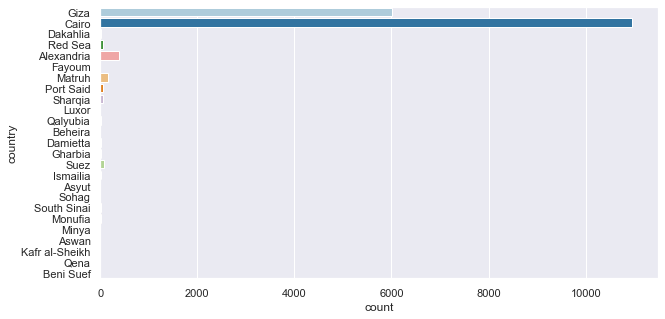

In [50]:
sns.set(rc={"figure.figsize": (10, 5)}); np.random.seed(0)
sns.countplot(y='country',data=df,palette='Paired' )

In [51]:
sns.color_palette("Paired")


[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [52]:
df

,price,location,title,link,viwers,negotiable,Bedrooms,Bathrooms,Area (m²),Type,...,Amenities,Furnished,Delivery Date,Down Payment,vlaues,Day,Month,Year,Season,country
0,7400000.0,Sheikh Zayed,استغل الفرصه وامتلك اخر فيلا في ليك ويست بتسهي...,https://www.olx.com.eg/en/ad/8-IDcHny4.html,54,0.0,['4'],['4'],['338'],"['Stand', 'Alone', 'Villa']",...,NaN,NaN,NaN,NaN,NaN,9,3,2022,Spring,Giza
1,7700000.0,Rehab City,فيلا للبيع نموذج c بمدينة الرحاب تشطيب كامل,https://www.olx.com.eg/en/ad/c-IDcGhF0.html,291,0.0,['3'],['3'],['456'],"['Stand', 'Alone', 'Villa']",...,"['Balcony', 'Pets', 'Allowed', 'Private', 'Gar...",['No'],"['Ready', 'to', 'move']",NaN,NaN,1,3,2022,Spring,Cairo
2,4900000.0,Shorouk City,تاون هاوس245م للبيع بأفضل نظم سداد استلام خلال...,https://www.olx.com.eg/en/ad/245-gcv-IDc4U6j.html,205,0.0,['4'],['2'],['245'],"['Town', 'House']",...,"['Balcony', 'Built', 'in', 'Kitchen', 'Applian...",['No'],['2022'],NaN,NaN,10,1,2022,Winter,Cairo
3,6500000.0,New Cairo - El Tagamoa,توين هاوس 255م للبيع - هايد بارك - التجمع,https://www.olx.com.eg/en/ad/255-IDcqiQS.html,67,0.0,['4'],['4'],['255'],"['Twin', 'House']",...,"['Private', 'Garden', 'Security']",['No'],"['Ready', 'to', 'move']",NaN,NaN,10,3,2022,Spring,Cairo
4,12000000.0,Sheikh Zayed,للبيع فيلا بسعر مميز علي الجولف كمبوند الربوة,https://www.olx.com.eg/en/ad/-IDcG0Qo.html,165,0.0,['4'],['3'],['800'],"['Stand', 'Alone', 'Villa']",...,"['Balcony', 'Built', 'in', 'Kitchen', 'Applian...",['No'],"['Ready', 'to', 'move']",['1'],NaN,27,2,2022,Winter,Giza
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21731,6200000.0,New Cairo - El Tagamoa,Twin house فيلا 20% مقدم تسليم فورى توين هاوس ...,https://www.olx.com.eg/en/ad/twin-house-20-4-I...,10,0.0,['4'],['4'],['300'],"['Twin', 'House']",...,"['Balcony', 'Covered', 'Parking', 'Maids', 'Ro...",['No'],"['Ready', 'to', 'move']","['1,240,000']",NaN,23,1,2022,Winter,Cairo
21732,15380000.0,New Cairo - El Tagamoa,Hyde park chill out in amazing standalone in p...,https://www.olx.com.eg/en/ad/hyde-park-chill-o...,12,0.0,['5'],['5'],['630'],"['Stand', 'Alone', 'Villa']",...,"['Private', 'Garden', 'Built', 'in', 'Kitchen'...",['No'],"['Ready', 'to', 'move']",NaN,NaN,23,1,2022,Winter,Cairo
21734,5500000.0,Sheikh Zayed,City villa for sale in west town sodic,https://www.olx.com.eg/en/ad/city-villa-for-sa...,20,0.0,['5'],['6'],['250'],"['Town', 'House']",...,NaN,NaN,NaN,NaN,NaN,23,1,2022,Winter,Giza
21735,5500000.0,Sheikh Zayed,سيتي فيلا للبيع في ويست تاون سوديك,https://www.olx.com.eg/en/ad/-IDcBgNi.html,13,0.0,['5'],['6'],['250'],"['Town', 'House']",...,NaN,NaN,NaN,NaN,NaN,23,1,2022,Winter,Giza


In [53]:
# print('location')
# print('')
# print(df['location'].value_counts())
# sns.countplot(y='location',data=df,palette='mako',)

## Title

In [54]:
df['title'].unique()

array(['استغل الفرصه وامتلك اخر فيلا في ليك ويست بتسهيلات حتي 8 سنين',
       'فيلا للبيع نموذج c بمدينة الرحاب تشطيب كامل',
       'تاون هاوس245م للبيع بأفضل نظم سداد استلام خلال سنة في چي سي ڤي GCV',
       ..., 'Hyde park chill out in amazing standalone in prime location',
       'City villa for sale in west town sodic',
       'امتلك تاون هاوس بقسط ع 8 سنين بسوديك ايست بمساحه 234 متر بسعر مميز'],
      dtype=object)

In [55]:
print(df['title'].unique().tolist())
# marks_list = df['title'].tolist()
# marks_list

['استغل الفرصه وامتلك اخر فيلا في ليك ويست بتسهيلات حتي 8 سنين', 'فيلا للبيع نموذج c بمدينة الرحاب تشطيب كامل', 'تاون هاوس245م للبيع بأفضل نظم سداد استلام خلال سنة في چي سي ڤي GCV', 'توين هاوس 255م للبيع - هايد بارك - التجمع', 'للبيع فيلا بسعر مميز علي الجولف كمبوند الربوة', 'ميدل تاون هاوس265م 4 نوم كلوب ڤيو للبيع في چي سي ڤي العبور GCV', 'فيلا مستقلة متشطبة نموذج X للبيع بسعر حصري لسرعة البيع', 'تم تنزيل السعر لسرررعة البيع فيلا توين هاوس بكمبوند الباتيو في الشروق', 'ارخص فيلا مستقله للبيع بمدينتى كامله التشطيب على افضل فيو لقطه', '#1فيلا تاون هاوس للبيع بالتقسيط 8سنوات في كمبوند فيلدج ويست الشيخ زايد', '#11تاون هاوس كورنر للبيع مقدم5%تقسيط8سنواتVILLAGE WEST VILLAالشيخ زايد', 'فيلا منفصله للبيع في بيفرلي هيلز المرحله الاولي ٦٠٠ متر مع حمام سباحه', 'Large villa with basement for sale in villette فيليت كمبوند', 'للبيع فيلا في swan lake residence التجمع الخامس فقط بمقدم 5%', 'فيلا للبيع فيو الجولف بسعر خيالي . تشطيب هاي الترا سوبر لوكس', 'فيلا للبيع بمنطقه فيلات البنفسج - علي شارع كبير 

In [56]:
#startswith('<h1')df['title'][206].split('\t')[4]
#df[df['title'].str.startswith('<h1' , na=False)]

In [57]:
# """
# df['title'] = df['title'].fillna('')

# def get_location(d):
#     if d!='':
#         if d.startswith('<h1') :
#             return str(d).split('\t')[4]
#         else:
#             return d
#     else:
#         return np.nan
    
# df['title'] = df['title'].apply(get_location)
# """

In [58]:
df['title'].isna().sum()

0

In [59]:
# df2=df[df['title'].astype(str).str.contains("بالتقسيط|تقسيط|التقسيط|installment|instalment|قسط")]
# df2

In [60]:
# def get_installement(x):
#     if type(x) == str:
#         if 'التقسيط' in x:
#             return 1
#         if 'تقسيط' in x:
#             return 1
#         if 'بالتقسيط' in x:
#             return 1
#         if 'installment' in x:
#             return 1
#         if 'instalment' in x:
#             return 1
#         if 'قسط' in x:
#             return 1
#         else:
#             return 0
# df['installment'] = df['title'].apply(get_installement)

In [61]:
# df['installment'].value_counts()

In [62]:
# sns.set(rc={"figure.figsize": (10, 5)}); np.random.seed(0)
# sns.countplot(x='installment',data=df,palette='Paired' )

In [63]:
#type(df.str.contains('بالتقسيط'))
# filter for names containing 'Singh'
#print(df[df.str.contains('بالتقسيط')])
#print(df[df['title'].str.contains('بالتقسيط', regex=False)])

In [64]:
#df['title'][10].str.contains('بالتقسيط')

In [65]:
#print(df.loc[df['title'].str.contains('بالتقسيط')])

In [66]:
#!pip install googletrans

In [67]:

# """
# # Code
# from translate import Translator
# translator= Translator(from_lang="arabic",to_lang="english")
# translation = translator.translate(x)
# print(translation)
# """

In [68]:
#!pip install translate

In [69]:
#translate2(df['title'][2])

In [70]:
# """from google_trans_new import google_translator
# from googletrans import Translator
# translator = Translator()
# translation = translator.translate("Der Himmel ist blau und ich mag Bananen", dest='en')
# print(translation)"""


## Viwers

In [71]:
df['viwers'].isna().sum()

0

In [72]:
df['viwers'].unique()

array(['54', '291', '205', '67', '165', '179', '159', '546', '62', '42',
       '40', '10', '86', '55', '129', '285', '577', '390', '183', '71',
       '269', '452', '43', '137', '60', '122', '231', '61', '216', '192',
       '75', '41', '83', '96', '6', '7', '20', '121', '14', '16', '184',
       '27', '19', '38', '22', '13', '198', '515', '167', '131', '125',
       '133', '212', '224', '148', '94', '483', '504', '193', '666',
       '365', '149', '138', '120', '274', '99', '69', '92', '66', '53',
       '57', '52', '259', '45', '12', '36', '528', '65', '44', '73', '84',
       '85', '188', '17', '26', '18', '51', '15', '35', '9', '112', '23',
       '246', '63', '87', '88', '50', '59', '30', '140', '234', '107',
       '243', '294', '77', '24', '257', '236', '162', '123', '233', '74',
       '190', '191', '56', '11', '58', '48', '70', '576', '106', '29',
       '28', '89', '1270', '68', '21', '144', '118', '350', '272', '195',
       '25', '46', '146', '32', '95', '81', '223', '226'

In [73]:
df['viwers']=df['viwers'].apply(pd.to_numeric).astype('Int32')

In [74]:
# """df['viwers'] = df['viwers'].fillna('')

# def get_viwers(d):
#     if d!='':
#         if d.startswith('[<div') :
#             return  d.split('\t')[11].split('>')[1].split('<')[0]
#         else:
#             return  d
#     else:
#         return np.nan
    
# df['viwers'] = df['viwers'].apply(get_viwers)
# """

In [75]:
df['viwers'].describe()

count    17905.000000
mean        55.464507
std         69.176042
min          2.000000
25%         16.000000
50%         34.000000
75%         65.000000
max       1270.000000
Name: viwers, dtype: float64

In [76]:
df['viwers'].value_counts()

14     454
9      448
11     438
10     435
12     417
      ... 
595      1
765      1
349      1
377      1
446      1
Name: viwers, Length: 463, dtype: Int64

C:\Users\Sarah\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='viwers'>

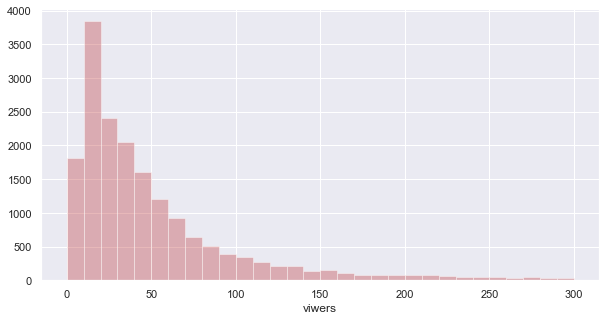

In [77]:
sns.set(rc={"figure.figsize": (10, 5)}); np.random.seed(0)
sns.set_color_codes()
sns.distplot(df['viwers'], kde=False, bins=30, color='r' , hist_kws={"range": [0,300]})

<AxesSubplot:ylabel='Density'>

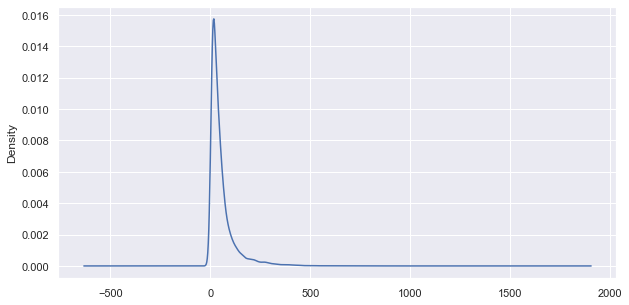

In [78]:
df['viwers'].plot(kind = 'kde', figsize = (10, 5))


C:\Users\Sarah\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sarah\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


<AxesSubplot:xlabel='price'>

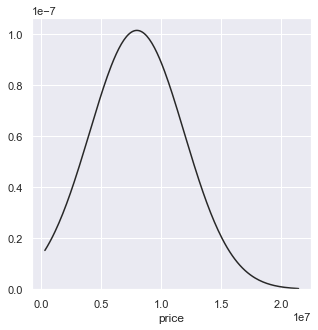

In [79]:
sns.set(rc={"figure.figsize": (5, 5)}); np.random.seed(0)
sns.set_color_codes()
sns.distplot(df['price'],fit=norm ,kde=False, bins=30, color='b' , hist_kws={"range": [0,300]})


## Negotiable

In [80]:
df['negotiable'].isna().sum()

0

In [81]:
df['negotiable'].unique()

array([0., 1.])

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17905 entries, 0 to 21736
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           17905 non-null  float32
 1   location        17905 non-null  object 
 2   title           17905 non-null  object 
 3   link            17905 non-null  object 
 4   viwers          17905 non-null  Int32  
 5   negotiable      17905 non-null  float64
 6   Bedrooms        17905 non-null  object 
 7   Bathrooms       17905 non-null  object 
 8   Area (m²)       17905 non-null  object 
 9   Type            17905 non-null  object 
 10  Payment Option  14780 non-null  object 
 11  Compound        11745 non-null  object 
 12  Delivery Term   10581 non-null  object 
 13  Amenities       12942 non-null  object 
 14  Furnished       11676 non-null  object 
 15  Delivery Date   12922 non-null  object 
 16  Down Payment    3443 non-null   object 
 17  vlaues          0 non-null     

In [83]:
df['negotiable'] = df['negotiable'].astype('Int32')

<AxesSubplot:xlabel='negotiable', ylabel='count'>

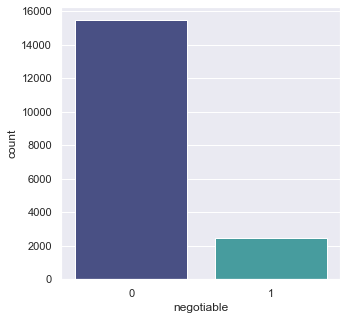

In [84]:
sns.set(rc={"figure.figsize": (5, 5)}); np.random.seed(0)
sns.countplot(data=df , x='negotiable' ,palette='mako' )

## Bedrooms

In [85]:
df['Bedrooms'].unique()

array(["['4']", "['3']", "['5']", "['6']", "['10+']", "['7']", "['2']",
       "['8']", "['9']", "['10']", "['1']"], dtype=object)

In [86]:
df['Bedrooms'].isna().sum()

0

In [87]:
#df['Bedrooms'] = df['Bedrooms'].fillna('')
def get_Bedrooms(p):
    if pd.notna(p):
        s = str(p).split()[0][2:][:-2]
        return s
        #if s.endswith('+'):
           # return int(s[:-1])
        #else :
            #return int(s)
    else:
        return np.nan

    
df['Bedrooms'] = df['Bedrooms'].apply(get_Bedrooms)


In [88]:
df['Bedrooms'].unique()

array(['4', '3', '5', '6', '10+', '7', '2', '8', '9', '10', '1'],
      dtype=object)

In [89]:
filt = df['Bedrooms'].apply(lambda x: x in ['3', '4', '5', '6', '7', '8', '9', '10'])
df = df[filt]
##check on accuracy 

In [90]:
df['Bedrooms'].unique()

array(['4', '3', '5', '6', '7', '8', '9', '10'], dtype=object)

In [91]:
df['Bedrooms']=df['Bedrooms'].apply(pd.to_numeric).astype('Int64')

C:\Users\Sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Bedrooms', ylabel='Count'>

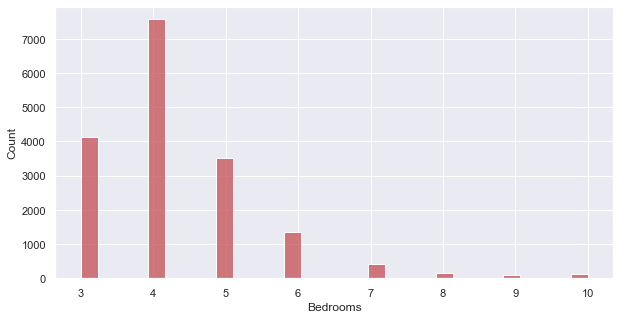

In [92]:
#sns.histplot(df['Bedrooms'].sort_values())
sns.set(rc={"figure.figsize": (10, 5)}); np.random.seed(0)
sns.set_color_codes()
sns.histplot(df['Bedrooms'], kde=False, bins=30, color='r' )

In [93]:
df

,price,location,title,link,viwers,negotiable,Bedrooms,Bathrooms,Area (m²),Type,...,Amenities,Furnished,Delivery Date,Down Payment,vlaues,Day,Month,Year,Season,country
0,7400000.0,Sheikh Zayed,استغل الفرصه وامتلك اخر فيلا في ليك ويست بتسهي...,https://www.olx.com.eg/en/ad/8-IDcHny4.html,54,0,4,['4'],['338'],"['Stand', 'Alone', 'Villa']",...,NaN,NaN,NaN,NaN,NaN,9,3,2022,Spring,Giza
1,7700000.0,Rehab City,فيلا للبيع نموذج c بمدينة الرحاب تشطيب كامل,https://www.olx.com.eg/en/ad/c-IDcGhF0.html,291,0,3,['3'],['456'],"['Stand', 'Alone', 'Villa']",...,"['Balcony', 'Pets', 'Allowed', 'Private', 'Gar...",['No'],"['Ready', 'to', 'move']",NaN,NaN,1,3,2022,Spring,Cairo
2,4900000.0,Shorouk City,تاون هاوس245م للبيع بأفضل نظم سداد استلام خلال...,https://www.olx.com.eg/en/ad/245-gcv-IDc4U6j.html,205,0,4,['2'],['245'],"['Town', 'House']",...,"['Balcony', 'Built', 'in', 'Kitchen', 'Applian...",['No'],['2022'],NaN,NaN,10,1,2022,Winter,Cairo
3,6500000.0,New Cairo - El Tagamoa,توين هاوس 255م للبيع - هايد بارك - التجمع,https://www.olx.com.eg/en/ad/255-IDcqiQS.html,67,0,4,['4'],['255'],"['Twin', 'House']",...,"['Private', 'Garden', 'Security']",['No'],"['Ready', 'to', 'move']",NaN,NaN,10,3,2022,Spring,Cairo
4,12000000.0,Sheikh Zayed,للبيع فيلا بسعر مميز علي الجولف كمبوند الربوة,https://www.olx.com.eg/en/ad/-IDcG0Qo.html,165,0,4,['3'],['800'],"['Stand', 'Alone', 'Villa']",...,"['Balcony', 'Built', 'in', 'Kitchen', 'Applian...",['No'],"['Ready', 'to', 'move']",['1'],NaN,27,2,2022,Winter,Giza
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21731,6200000.0,New Cairo - El Tagamoa,Twin house فيلا 20% مقدم تسليم فورى توين هاوس ...,https://www.olx.com.eg/en/ad/twin-house-20-4-I...,10,0,4,['4'],['300'],"['Twin', 'House']",...,"['Balcony', 'Covered', 'Parking', 'Maids', 'Ro...",['No'],"['Ready', 'to', 'move']","['1,240,000']",NaN,23,1,2022,Winter,Cairo
21732,15380000.0,New Cairo - El Tagamoa,Hyde park chill out in amazing standalone in p...,https://www.olx.com.eg/en/ad/hyde-park-chill-o...,12,0,5,['5'],['630'],"['Stand', 'Alone', 'Villa']",...,"['Private', 'Garden', 'Built', 'in', 'Kitchen'...",['No'],"['Ready', 'to', 'move']",NaN,NaN,23,1,2022,Winter,Cairo
21734,5500000.0,Sheikh Zayed,City villa for sale in west town sodic,https://www.olx.com.eg/en/ad/city-villa-for-sa...,20,0,5,['6'],['250'],"['Town', 'House']",...,NaN,NaN,NaN,NaN,NaN,23,1,2022,Winter,Giza
21735,5500000.0,Sheikh Zayed,سيتي فيلا للبيع في ويست تاون سوديك,https://www.olx.com.eg/en/ad/-IDcBgNi.html,13,0,5,['6'],['250'],"['Town', 'House']",...,NaN,NaN,NaN,NaN,NaN,23,1,2022,Winter,Giza


## Bathrooms


In [94]:
df['Bathrooms'].unique()

array(["['4']", "['3']", "['2']", "['6']", "['5']", "['7']", "['8']",
       "['1']", "['10']", "['9']", "['10+']"], dtype=object)

In [95]:
df['Bathrooms'].isna().sum()

0

In [96]:
#df['Bathrooms'] = df['Bathrooms'].fillna('')
def get_Bathrooms(p):
    if pd.notna(p):
        s = str(p).split()[0][2:][:-2]
        return s
        #if s.endswith('+'):
         #   return int(s[:-1])
        #else :
         #   return int(s)
    else:
        return np.nan
    
    

    
df['Bathrooms'] = df['Bathrooms'].apply(get_Bathrooms)

C:\Users\Sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [97]:
df['Bathrooms'].unique()

array(['4', '3', '2', '6', '5', '7', '8', '1', '10', '9', '10+'],
      dtype=object)

In [98]:
filt = df['Bathrooms'].apply(lambda x: x in [  '3', '4', '5', '6', '7', '8'])
df = df[filt]

In [99]:
df['Bathrooms'].unique()

array(['4', '3', '6', '5', '7', '8'], dtype=object)

In [100]:

df['Bathrooms']=df['Bathrooms'].apply(pd.to_numeric).astype('Int64')

C:\Users\Sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Bathrooms', ylabel='Count'>

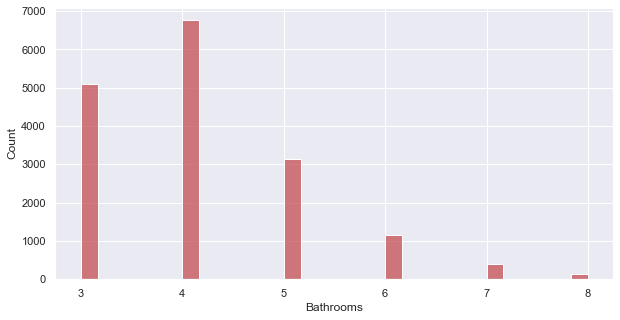

In [101]:
sns.set(rc={"figure.figsize": (10, 5)}); np.random.seed(0)
sns.set_color_codes()
sns.histplot(df['Bathrooms'], kde=False, bins=30, color='r' )

In [102]:
df


,price,location,title,link,viwers,negotiable,Bedrooms,Bathrooms,Area (m²),Type,...,Amenities,Furnished,Delivery Date,Down Payment,vlaues,Day,Month,Year,Season,country
0,7400000.0,Sheikh Zayed,استغل الفرصه وامتلك اخر فيلا في ليك ويست بتسهي...,https://www.olx.com.eg/en/ad/8-IDcHny4.html,54,0,4,4,['338'],"['Stand', 'Alone', 'Villa']",...,NaN,NaN,NaN,NaN,NaN,9,3,2022,Spring,Giza
1,7700000.0,Rehab City,فيلا للبيع نموذج c بمدينة الرحاب تشطيب كامل,https://www.olx.com.eg/en/ad/c-IDcGhF0.html,291,0,3,3,['456'],"['Stand', 'Alone', 'Villa']",...,"['Balcony', 'Pets', 'Allowed', 'Private', 'Gar...",['No'],"['Ready', 'to', 'move']",NaN,NaN,1,3,2022,Spring,Cairo
3,6500000.0,New Cairo - El Tagamoa,توين هاوس 255م للبيع - هايد بارك - التجمع,https://www.olx.com.eg/en/ad/255-IDcqiQS.html,67,0,4,4,['255'],"['Twin', 'House']",...,"['Private', 'Garden', 'Security']",['No'],"['Ready', 'to', 'move']",NaN,NaN,10,3,2022,Spring,Cairo
4,12000000.0,Sheikh Zayed,للبيع فيلا بسعر مميز علي الجولف كمبوند الربوة,https://www.olx.com.eg/en/ad/-IDcG0Qo.html,165,0,4,3,['800'],"['Stand', 'Alone', 'Villa']",...,"['Balcony', 'Built', 'in', 'Kitchen', 'Applian...",['No'],"['Ready', 'to', 'move']",['1'],NaN,27,2,2022,Winter,Giza
6,11000000.0,Rehab City,فيلا مستقلة متشطبة نموذج X للبيع بسعر حصري لسر...,https://www.olx.com.eg/en/ad/x-IDcG9Yg.html,159,1,5,3,['530'],"['Stand', 'Alone', 'Villa']",...,"['Balcony', 'Maids', 'Room', 'Pets', 'Allowed'...",['No'],"['Ready', 'to', 'move']",NaN,NaN,28,2,2022,Winter,Cairo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21731,6200000.0,New Cairo - El Tagamoa,Twin house فيلا 20% مقدم تسليم فورى توين هاوس ...,https://www.olx.com.eg/en/ad/twin-house-20-4-I...,10,0,4,4,['300'],"['Twin', 'House']",...,"['Balcony', 'Covered', 'Parking', 'Maids', 'Ro...",['No'],"['Ready', 'to', 'move']","['1,240,000']",NaN,23,1,2022,Winter,Cairo
21732,15380000.0,New Cairo - El Tagamoa,Hyde park chill out in amazing standalone in p...,https://www.olx.com.eg/en/ad/hyde-park-chill-o...,12,0,5,5,['630'],"['Stand', 'Alone', 'Villa']",...,"['Private', 'Garden', 'Built', 'in', 'Kitchen'...",['No'],"['Ready', 'to', 'move']",NaN,NaN,23,1,2022,Winter,Cairo
21734,5500000.0,Sheikh Zayed,City villa for sale in west town sodic,https://www.olx.com.eg/en/ad/city-villa-for-sa...,20,0,5,6,['250'],"['Town', 'House']",...,NaN,NaN,NaN,NaN,NaN,23,1,2022,Winter,Giza
21735,5500000.0,Sheikh Zayed,سيتي فيلا للبيع في ويست تاون سوديك,https://www.olx.com.eg/en/ad/-IDcBgNi.html,13,0,5,6,['250'],"['Town', 'House']",...,NaN,NaN,NaN,NaN,NaN,23,1,2022,Winter,Giza


## Area

In [103]:
df.rename(columns = {'Area (m²)':'Area', }, inplace = True) 

C:\Users\Sarah\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [104]:
df['Area'].unique()

array(["['338']", "['456']", "['255']", "['800']", "['530']", "['600']",
       "['220']", "['223']", "['640']", "['311']", "['780']", "['287']",
       "['680']", "['465']", "['482']", "['360']", "['3,000']", "['222']",
       "['305']", "['307']", "['280']", "['200']", "['275']", "['238']",
       "['321']", "['335']", "['207']", "['298']", "['375']", "['473']",
       "['300']", "['480']", "['750']", "['381']", "['639']", "['580']",
       "['312']", "['400']", "['250']", "['325']", "['920']", "['333']",
       "['260']", "['500']", "['330']", "['306']", "['340']", "['485']",
       "['379']", "['732']", "['670']", "['320']", "['277']", "['288']",
       "['350']", "['254']", "['399']", "['248']", "['201']", "['390']",
       "['230']", "['225']", "['425']", "['382']", "['195']", "['620']",
       "['502']", "['297']", "['210']", "['472']", "['370']", "['295']",
       "['393']", "['266']", "['389']", "['271']", "['180']", "['460']",
       "['650']", "['850']", "['256']", "['224']"

In [105]:
df['Area'].isna().sum()

0

In [106]:
df['Area'].sort_values()

14370        ['0']
7184     ['1,000']
9921     ['1,000']
6506     ['1,000']
21419    ['1,000']
           ...    
11473      ['990']
13479      ['991']
18801      ['993']
5022       ['996']
1205       ['996']
Name: Area, Length: 16693, dtype: object

In [107]:
s=df['Area'][4].split()[0][2:][:-2].split(',')
str1 = ''.join(s)
print(float(str1))

800.0


In [108]:
def get_Area(p):
    if pd.notna(p):
        s = str(p).split()[0][2:][:-2].split(',') #split "" & ,   
        str1 = ''.join(s) #get list into str then convert to float
        return float(str1)
    else:
        return np.nan


    
df['Area'] = df['Area'].apply(get_Area)

C:\Users\Sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [109]:
df['Area'].isna().sum()

0

<AxesSubplot:xlabel='Area'>

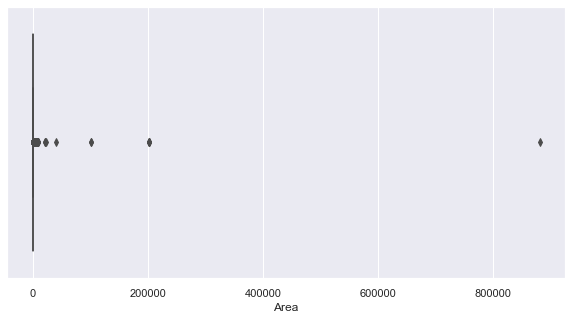

In [110]:
sns.boxplot(x='Area', data=df)

In [111]:
#sns.distplot(df['Area'], kde=False, bins=50, color='r')

<AxesSubplot:ylabel='Density'>

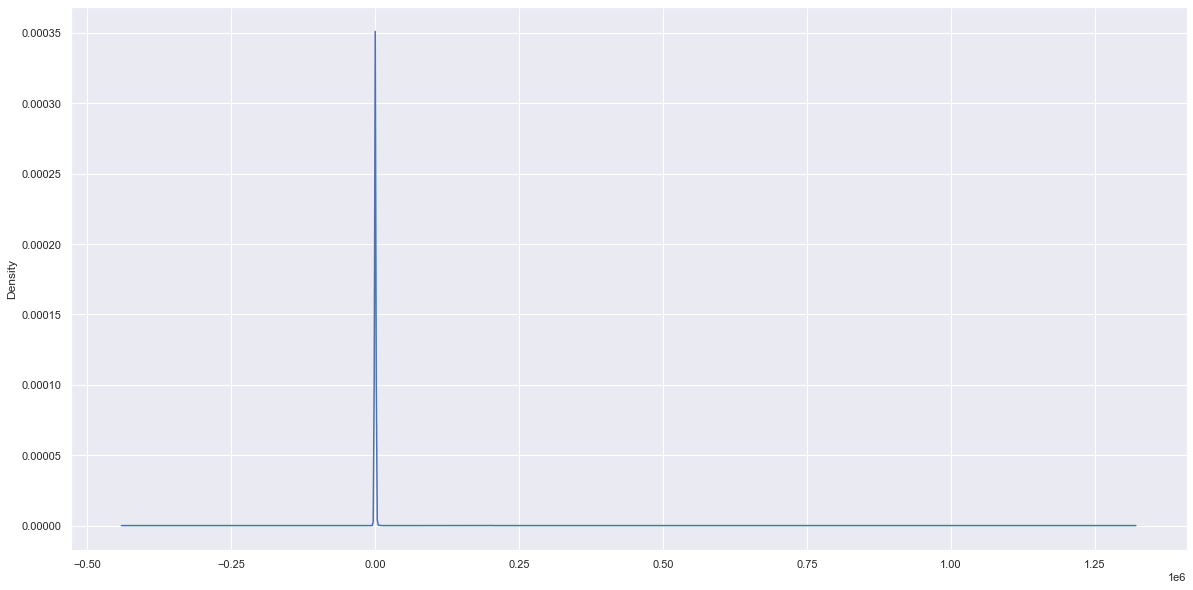

In [112]:
df['Area'].plot(kind = 'kde', figsize = (20, 10))

In [113]:
df['Area'].describe()

count     16693.000000
mean        576.814584
std        7746.698330
min           0.000000
25%         270.000000
50%         356.000000
75%         514.000000
max      880700.000000
Name: Area, dtype: float64

In [114]:
df[df['Area']<1]

,price,location,title,link,viwers,negotiable,Bedrooms,Bathrooms,Area,Type,...,Amenities,Furnished,Delivery Date,Down Payment,vlaues,Day,Month,Year,Season,country
14370,10000000.0,North Coast,فيلا للبيع على البحر مباشرة,https://www.olx.com.eg/en/ad/-IDcDxT6.html,76,0,6,5,0.0,"['Stand', 'Alone', 'Villa']",...,"['Built', 'in', 'Kitchen', 'Appliances', 'Priv...",['Yes'],"['Ready', 'to', 'move']",NaN,NaN,10,2,2022,Winter,Matruh


In [115]:
min_area = 200
max_area = 5000
q1 = df['Area'].quantile(0.25)
q3 = df['Area'].quantile(0.75)
iqr = q3 - q1
lower_whisker = q1 - 1.5 * iqr
if lower_whisker < min_area:
    lower_whisker = min_area
upper_whisker = q3 + 1.5 * iqr

lower_whisker, upper_whisker



(200, 880.0)

In [116]:

#if upper_whisker < max_area:
    #upper_whisker = max_area

In [117]:
filt = (df['Area'] < lower_whisker) | (df['Area'] > upper_whisker)
filt.sum()

1437

In [118]:
indices = filt[filt].index
df.drop(indices, inplace = True)

C:\Users\Sarah\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<AxesSubplot:ylabel='Density'>

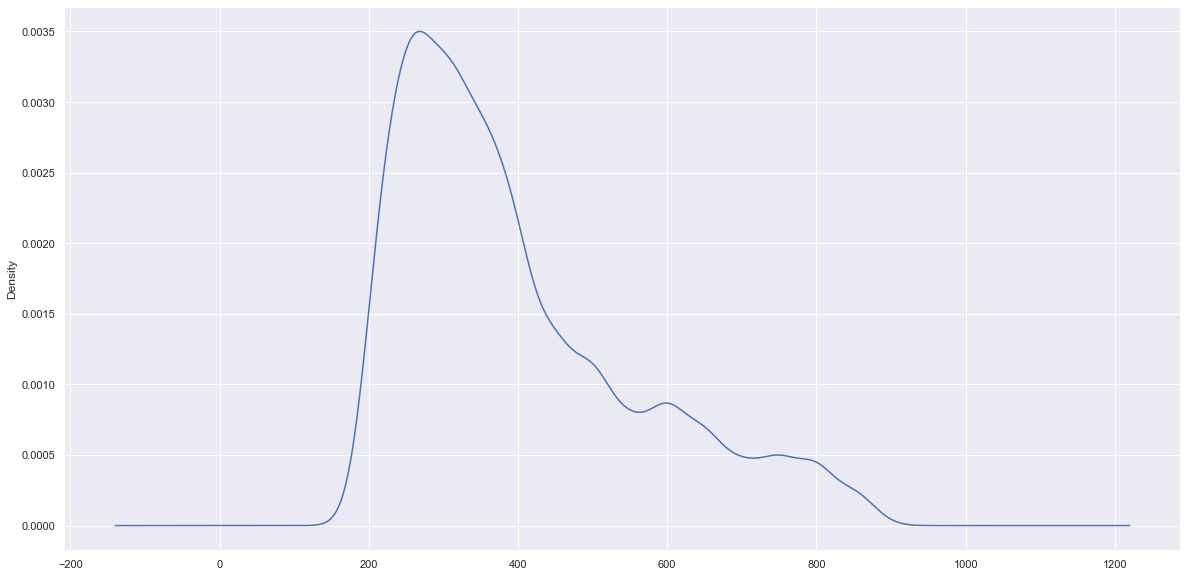

In [119]:
df['Area'].plot(kind = 'kde', figsize = (20, 10))

C:\Users\Sarah\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Area'>

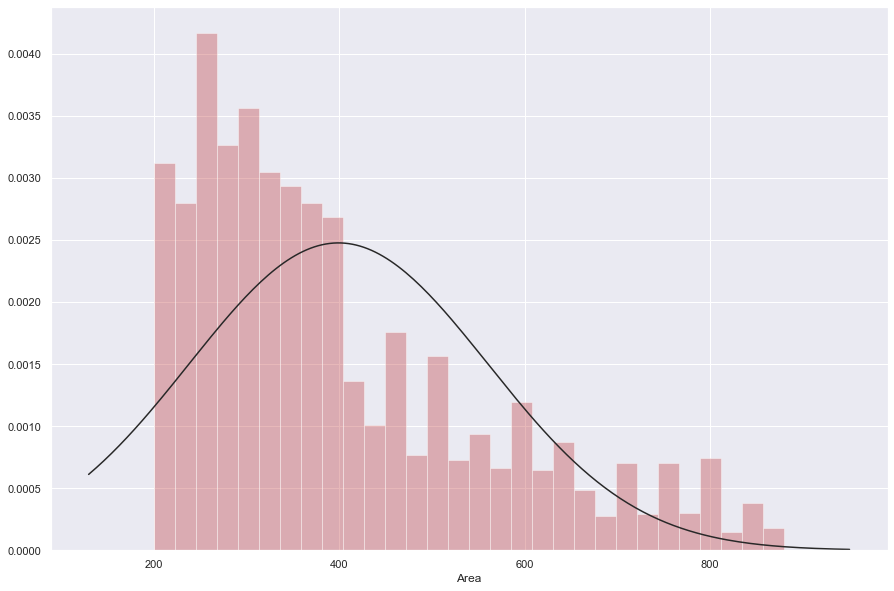

In [120]:
sns.set(rc={"figure.figsize": (15, 10)}); np.random.seed(0)
sns.set_color_codes()
sns.distplot(df['Area'],fit=norm ,kde=False, bins=30, color='r')

In [121]:
df[df['Bedrooms']==3]

,price,location,title,link,viwers,negotiable,Bedrooms,Bathrooms,Area,Type,...,Amenities,Furnished,Delivery Date,Down Payment,vlaues,Day,Month,Year,Season,country
1,7700000.0,Rehab City,فيلا للبيع نموذج c بمدينة الرحاب تشطيب كامل,https://www.olx.com.eg/en/ad/c-IDcGhF0.html,291,0,3,3,456.0,"['Stand', 'Alone', 'Villa']",...,"['Balcony', 'Pets', 'Allowed', 'Private', 'Gar...",['No'],"['Ready', 'to', 'move']",NaN,NaN,1,3,2022,Spring,Cairo
8,7600000.0,Madinaty,ارخص فيلا مستقله للبيع بمدينتى كامله التشطيب ع...,https://www.olx.com.eg/en/ad/-IDcHO0x.html,62,0,3,4,600.0,"['Stand', 'Alone', 'Villa']",...,"['Balcony', 'Covered', 'Parking', 'Maids', 'Ro...",['No'],"['Ready', 'to', 'move']",NaN,NaN,12,3,2022,Spring,Cairo
20,2250000.0,Madinaty,فيلا توين نموذج E3 بفيلات الفورسيزون بأقل مقدم...,https://www.olx.com.eg/en/ad/e3-IDcGTZA.html,390,0,3,3,311.0,"['Twin', 'House']",...,NaN,NaN,['2025'],"['2,250,000']",NaN,5,3,2022,Spring,Cairo
21,9250000.0,New Cairo - El Tagamoa,فيلا مستقلة 465 م في كمبوند زيزينيا جاردنز بسع...,https://www.olx.com.eg/en/ad/465-zizinia-garde...,54,0,3,3,465.0,"['Stand', 'Alone', 'Villa']",...,NaN,NaN,"['Ready', 'to', 'move']",NaN,NaN,12,3,2022,Spring,Cairo
28,5200000.0,New Cairo - El Tagamoa,أقل سعر توين هاوس بحري في ليان صبور التجمع الخامس,https://www.olx.com.eg/en/ad/-IDcHpuX.html,137,0,3,3,305.0,"['Twin', 'House']",...,"['Balcony', 'Pets', 'Allowed', 'Private', 'Gar...",['No'],"['Ready', 'to', 'move']","['5,200,000']",NaN,9,3,2022,Spring,Cairo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21714,11500000.0,Sheikh Zayed,Villa sale AlRabwa Zayed Fully finished\فيلا ب...,https://www.olx.com.eg/en/ad/villa-sale-alrabw...,9,0,3,3,730.0,"['Stand', 'Alone', 'Villa']",...,NaN,NaN,NaN,NaN,NaN,23,1,2022,Winter,Giza
21717,5800000.0,New Cairo - El Tagamoa,للبيع تاون هاوس (كورنر) في كومباوند ماونتن فيو...,https://www.olx.com.eg/en/ad/-IDcBh3i.html,24,0,3,4,281.0,"['Town', 'House']",...,"['Balcony', 'Covered', 'Parking', 'Maids', 'Ro...",NaN,NaN,NaN,NaN,23,1,2022,Winter,Cairo
21718,5800000.0,New Cairo - El Tagamoa,Town House Prime Location Mountain View Hyde Park,https://www.olx.com.eg/en/ad/town-house-prime-...,15,0,3,4,281.0,"['Town', 'House']",...,"['Balcony', 'Covered', 'Parking', 'Maids', 'Ro...",NaN,NaN,NaN,NaN,23,1,2022,Winter,Cairo
21727,6530000.0,Madinaty,فيلا رباعية للبيع بمدينتي بتسهيلات حتي 2025 بم...,https://www.olx.com.eg/en/ad/2025-246-vg5-IDcB...,7,0,3,3,246.0,"['Twin', 'House']",...,NaN,NaN,NaN,NaN,NaN,23,1,2022,Winter,Cairo


In [122]:
df.drop(df.index[109] , inplace=True)

C:\Users\Sarah\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<AxesSubplot:xlabel='Area'>

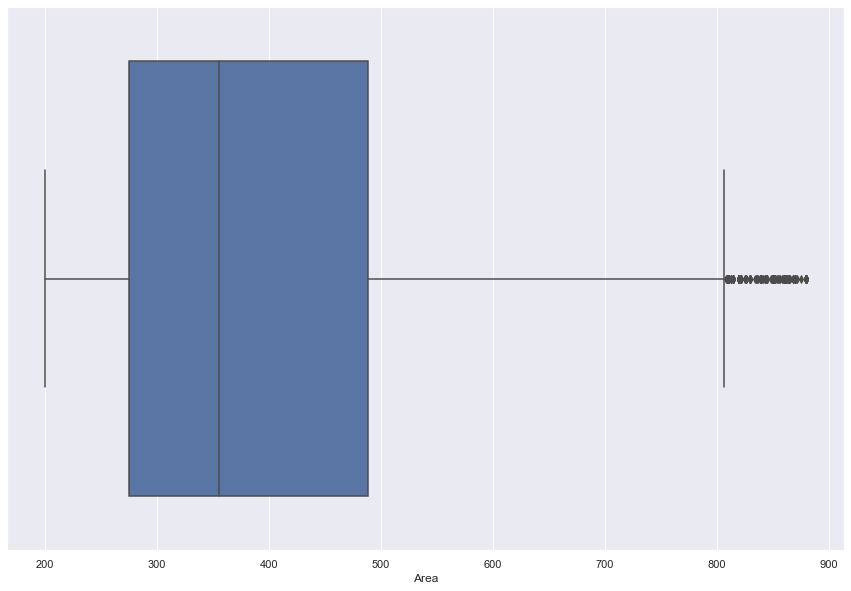

In [123]:
sns.boxplot(x='Area', data=df)

## Type

In [124]:
df['Type'].unique()

array(["['Stand', 'Alone', 'Villa']", "['Twin', 'House']",
       "['Town', 'House']"], dtype=object)

In [125]:
import ast
#The ast module gives us literal_eval which can directly convert the string into a list

In [126]:
def get_type(s):
    try:
        res = ast.literal_eval(s)
        return ' '.join(str(e) for e in res)
    except ValueError:
         return np.nan


df['Type']=df['Type'].apply(get_type)

C:\Users\Sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [127]:
df['Type'].unique()

array(['Stand Alone Villa', 'Twin House', 'Town House'], dtype=object)

<AxesSubplot:xlabel='Type', ylabel='count'>

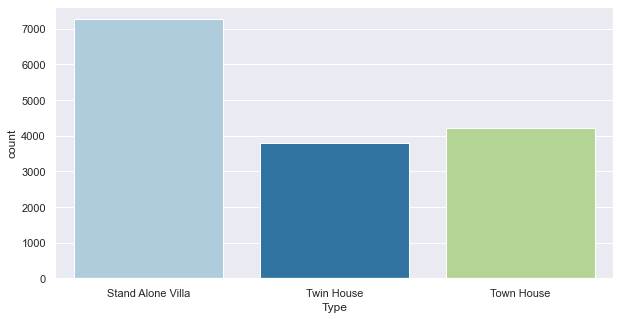

In [128]:
sns.set(rc={"figure.figsize": (10, 5)}); np.random.seed(0)
sns.countplot(x='Type',data=df,palette='Paired' )

## Payment Option ,  Down Payment

In [129]:
df['Down Payment'].unique()

array([nan, "['1']", "['312,500']", "['14,000,000']", "['775']",
       "['2,250,000']", "['1,760,000']", "['5,200,000']", "['3,400,000']",
       "['6,500,000']", "['869,000']", "['6,100,000']", "['2,550,000']",
       "['1,800,000']", "['460,000']", "['3,105,000']", "['685,000']",
       "['221,293']", "['546,200']", "['4,500,000']", "['8,860,000']",
       "['277,500']", "['400,000']", "['350,000']", "['12,000,000']",
       "['8,700,000']", "['3,750,000']", "['420,000']", "['530,000']",
       "['677,000']", "['650,000']", "['895,000']", "['2,500,000']",
       "['373,929']", "['766,183']", "['708,885']", "['705,741']",
       "['410,000']", "['12,800,000']", "['178,000']", "['5,000,000']",
       "['20']", "['360,000']", "['3,000,000']", "['7,900,000']",
       "['4,300,000']", "['5,500,000']", "['2,400,000']", "['2,200,000']",
       "['2,100,000']", "['544,700']", "['466,000']", "['450,000']",
       "['1,250,000']", "['540']", "['540,000']", "['3,120,000']",
       "['3,790,000

In [130]:
df['Down Payment'].isna().sum()

12273

In [131]:
df['Down Payment'] = df['Down Payment'].fillna('')  #convert type of nan values to str

def get_Down_Payment(x):
    if x!='':
        s = str(x).split()[0][2:][:-2].split(',')
        str1 = ''.join(s)
        return float(str1)
    else:
        return np.nan


df['Down Payment']=df['Down Payment'].apply(get_Down_Payment)

C:\Users\Sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15255 entries, 0 to 21736
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           15255 non-null  float32
 1   location        15255 non-null  object 
 2   title           15255 non-null  object 
 3   link            15255 non-null  object 
 4   viwers          15255 non-null  Int32  
 5   negotiable      15255 non-null  Int32  
 6   Bedrooms        15255 non-null  Int64  
 7   Bathrooms       15255 non-null  Int64  
 8   Area            15255 non-null  float64
 9   Type            15255 non-null  object 
 10  Payment Option  12722 non-null  object 
 11  Compound        10544 non-null  object 
 12  Delivery Term   9221 non-null   object 
 13  Amenities       11111 non-null  object 
 14  Furnished       9940 non-null   object 
 15  Delivery Date   11209 non-null  object 
 16  Down Payment    2982 non-null   float64
 17  vlaues          0 non-null     

In [133]:
df['Down Payment'].isna().sum()

12273

In [134]:
df['Down Payment'].describe()

count    2.982000e+03
mean     4.860221e+06
std      4.072769e+07
min      0.000000e+00
25%      4.444020e+05
50%      1.200000e+06
75%      4.768750e+06
max      1.276664e+09
Name: Down Payment, dtype: float64

In [135]:
df['Payment Option'].isna().sum()

2533

In [136]:
import ast

In [137]:
def get_Payment_Option(s):
    try:
        res = ast.literal_eval(s)
        return ' '.join(str(e) for e in res)
    except ValueError:
         return np.nan


df['Payment Option']=df['Payment Option'].apply(get_Payment_Option)

C:\Users\Sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


<AxesSubplot:xlabel='Payment Option', ylabel='count'>

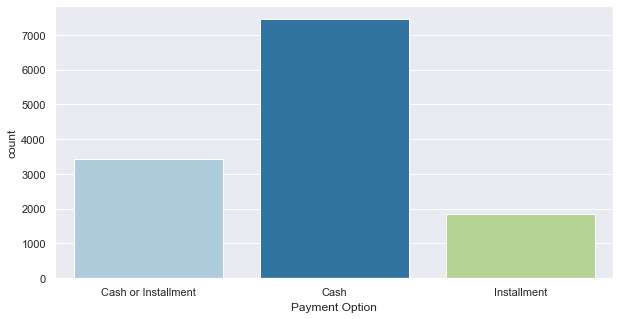

In [138]:
sns.set(rc={"figure.figsize": (10, 5)}); np.random.seed(0)
sns.countplot(x='Payment Option',data=df,palette='Paired')

In [139]:
df['Payment Option'].unique()

array(['Cash or Installment', 'Cash', 'Installment', nan], dtype=object)

In [140]:
def func_on_paymentOption(x):
    is_cash = int('cash' in x.lower()) if pd.notna(x) else np.nan
    is_installment = int('installment' in x.lower()) if pd.notna(x) else np.nan
    return pd.Series([is_cash, is_installment])

temp_df = df['Payment Option'].apply(func_on_paymentOption)

In [141]:
temp_df.columns = ['Cash', 'Installment']
temp_df

,Cash,Installment
0,1.0,1.0
1,1.0,0.0
3,1.0,0.0
4,1.0,0.0
6,1.0,0.0
...,...,...
21731,0.0,1.0
21732,1.0,0.0
21734,NaN,NaN
21735,NaN,NaN


In [142]:
temp_df.isna().sum()

Cash           2533
Installment    2533
dtype: int64

In [143]:
df = pd.concat([df, temp_df], axis = 1)

In [144]:
df[['Cash','Installment']].isna().sum()

Cash           2533
Installment    2533
dtype: int64

In [145]:
# ("بالتقسيط|تقسيط|التقسيط|installment|instalment|قسط")

In [146]:
#df[df['title'].astype(str).str.contains("cash|كاش") ]


# df3=df[(df['title'].str.contains("cash|كاش")) & (df['title'].str.contains("بالتقسيط|تقسيط|التقسيط|installment|instalment|قسط") == False )]

# x=df3[df3['Cash'].isna()]
# x

In [147]:
# for y in df['title']:
#     if (y.str.contains("cash|كاش")) & (y.str.contains("بالتقسيط|تقسيط|التقسيط|installment|instalment|قسط") == False ):
#         print(y)

In [148]:
df["percentage"] = (df["Down Payment"]/df["price"])*100

In [149]:
df["percentage"].value_counts()

100.000000    686
10.000000     498
5.000000      290
15.000000      77
20.000000      66
             ... 
4.999990        1
26.785714       1
45.000000       1
4.357143        1
4.164821        1
Name: percentage, Length: 979, dtype: int64

In [150]:
df["percentage"].isna().sum()

12273

In [151]:
# def edit_percentage(x):
#     if x == 100:
#         x=0
#         return x
#     else:
#         return x
        
# #df['colC'] = df[df['colA'] == 'a']['colB'] 
# df["percentage"] = df["percentage"].apply(edit_percentage)        

In [152]:
df["percentage"].value_counts()

100.000000    686
10.000000     498
5.000000      290
15.000000      77
20.000000      66
             ... 
4.999990        1
26.785714       1
45.000000       1
4.357143        1
4.164821        1
Name: percentage, Length: 979, dtype: int64

In [153]:
df["percentage"].isna().sum()

12273

In [154]:
#df['percentage'] = df['percentage'].fillna('')

def fun_on_Down(x):
    if x['percentage']==100:
        x['Installment'] = 0.0
        x['Cash'] = 1.0
    return x


In [155]:
df = df.apply(fun_on_Down, axis = 1)

In [156]:
def func_on_tittle(x):
    
    installment_keys = ['instalment', 'installment'  , 'بالتقسيط', 'تقسيط ' , 'التقسيط']
    if pd.isna(x['Installment']):
        for key in installment_keys:
            if key in x['title']:
                x['Installment'] = 1.0
                break
    
    cash_keys = ['cash', 'كاش']            
    if pd.isna(x['Cash']):
        for key1 in installment_keys:
            for key2 in cash_keys:
                if (key2 in x['title']) & (key1 not in x['title']):
                    x['Cash'] = 1.0
                    break
    
       
            
    return x
    

In [157]:
#df['Installment']= df.apply(func_on_tittle)
df = df.apply(func_on_tittle, axis = 1)

In [158]:
df['Down Payment'].isna().sum()

12273

In [159]:
df[['Cash','Installment']].isna().sum()

Cash           2499
Installment    2392
dtype: int64

In [160]:
df['Payment Option'].fillna(df['Payment Option'].mode()[0], inplace=True)
df['Cash'].fillna(df['Cash'].mode()[0], inplace=True)
df['Installment'].fillna(df['Installment'].mode()[0], inplace=True)
# # checInstallmentk accuracy


In [161]:
df.isna().sum()

price                 0
location              0
title                 0
link                  0
viwers                0
negotiable            0
Bedrooms              0
Bathrooms             0
Area                  0
Type                  0
Payment Option        0
Compound           4711
Delivery Term      6034
Amenities          4144
Furnished          5315
Delivery Date      4046
Down Payment      12273
vlaues            15255
Day                   0
Month                 0
Year                  0
Season                0
country               0
Cash                  0
Installment           0
percentage        12273
dtype: int64

<AxesSubplot:xlabel='Payment Option', ylabel='count'>

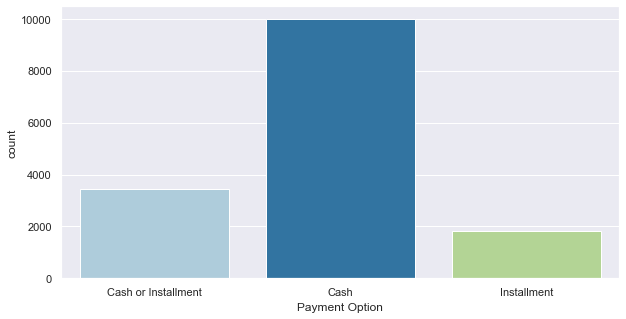

In [162]:
sns.set(rc={"figure.figsize": (10, 5)}); np.random.seed(0)
sns.countplot(x='Payment Option',data=df,palette='Paired')

<AxesSubplot:xlabel='Installment', ylabel='count'>

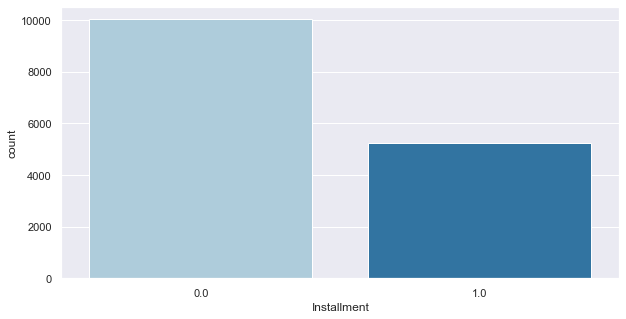

In [163]:
sns.countplot(x='Installment',data=df,palette='Paired')

In [164]:
payment_Option=pd.pivot_table(index='Installment',columns='Cash',values='price',data=df,aggfunc='count')

<AxesSubplot:xlabel='Cash', ylabel='Installment'>

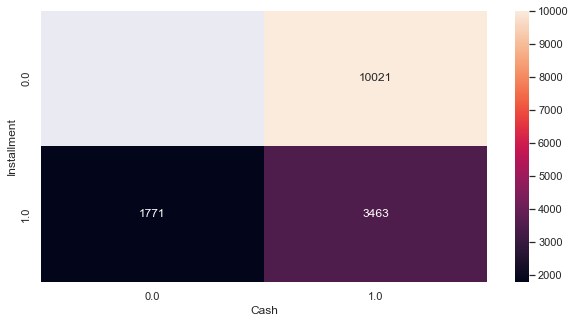

In [165]:
sns.heatmap(payment_Option,annot=True , fmt='0.0f')

In [166]:

#from sklearn.impute import KNNImputer
#imputer = KNNImputer()
#df['col']=imputer.fit_transform(df[['col']])

In [167]:
df[pd.notna(df['Down Payment'])]

,price,location,title,link,viwers,negotiable,Bedrooms,Bathrooms,Area,Type,...,Down Payment,vlaues,Day,Month,Year,Season,country,Cash,Installment,percentage
4,12000000.0,Sheikh Zayed,للبيع فيلا بسعر مميز علي الجولف كمبوند الربوة,https://www.olx.com.eg/en/ad/-IDcG0Qo.html,165,0,4,3,800.0,Stand Alone Villa,...,1.0,NaN,27,2,2022,Winter,Giza,1.0,0.0,0.000008
10,6250000.0,Sheikh Zayed,#1فيلا تاون هاوس للبيع بالتقسيط 8سنوات في كمبو...,https://www.olx.com.eg/en/ad/1-8-IDcHx4j.html,42,0,4,4,220.0,Town House,...,312500.0,NaN,10,3,2022,Spring,Giza,1.0,1.0,5.000000
15,14000000.0,New Cairo - El Tagamoa,فيلا للبيع فيو الجولف بسعر خيالي . تشطيب هاي ا...,https://www.olx.com.eg/en/ad/-IDcHluv.html,55,0,4,3,780.0,Stand Alone Villa,...,14000000.0,NaN,9,3,2022,Spring,Cairo,1.0,0.0,100.000000
17,7750000.0,6th of October,فيلا منفصلة للبيع مساحةً 287 متر في كمبوند sun...,https://www.olx.com.eg/en/ad/287-sun-capital-I...,285,0,4,4,287.0,Stand Alone Villa,...,775.0,NaN,12,3,2022,Spring,Giza,1.0,1.0,0.010000
20,2250000.0,Madinaty,فيلا توين نموذج E3 بفيلات الفورسيزون بأقل مقدم...,https://www.olx.com.eg/en/ad/e3-IDcGTZA.html,390,0,3,3,311.0,Twin House,...,2250000.0,NaN,5,3,2022,Spring,Cairo,1.0,0.0,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21709,4215000.0,Madinaty,"ايس فيلا ٢٦٠م استلام فوري بمقدم 526,875 و خصم ...",https://www.olx.com.eg/en/ad/526-875-674-400-I...,11,0,4,4,260.0,Town House,...,526875.0,NaN,23,1,2022,Winter,Cairo,1.0,1.0,12.500000
21712,6771000.0,Sheikh Zayed,فيلا مستقلة 430 م للبيع أمام بيڤرلي هيلز مباشر...,https://www.olx.com.eg/en/ad/430-IDcouzJ.html,4,0,4,5,430.0,Stand Alone Villa,...,282000.0,NaN,23,1,2022,Winter,Giza,1.0,1.0,4.164821
21730,6200000.0,Obour City,تملك فيلا 20% مقدم تسليم فورى توين هاوس كمبوند...,https://www.olx.com.eg/en/ad/20-4-IDcBgPC.html,25,0,4,4,300.0,Twin House,...,1240000.0,NaN,23,1,2022,Winter,Cairo,0.0,1.0,20.000000
21731,6200000.0,New Cairo - El Tagamoa,Twin house فيلا 20% مقدم تسليم فورى توين هاوس ...,https://www.olx.com.eg/en/ad/twin-house-20-4-I...,10,0,4,4,300.0,Twin House,...,1240000.0,NaN,23,1,2022,Winter,Cairo,0.0,1.0,20.000000


In [168]:
df["percentage"].value_counts()

100.000000    686
10.000000     498
5.000000      290
15.000000      77
20.000000      66
             ... 
4.999990        1
26.785714       1
45.000000       1
4.357143        1
4.164821        1
Name: percentage, Length: 979, dtype: int64

In [169]:
df[(df['percentage']==100) &( df['Cash']==1)]

,price,location,title,link,viwers,negotiable,Bedrooms,Bathrooms,Area,Type,...,Down Payment,vlaues,Day,Month,Year,Season,country,Cash,Installment,percentage
15,14000000.0,New Cairo - El Tagamoa,فيلا للبيع فيو الجولف بسعر خيالي . تشطيب هاي ا...,https://www.olx.com.eg/en/ad/-IDcHluv.html,55,0,4,3,780.0,Stand Alone Villa,...,14000000.0,NaN,9,3,2022,Spring,Cairo,1.0,0.0,100.0
20,2250000.0,Madinaty,فيلا توين نموذج E3 بفيلات الفورسيزون بأقل مقدم...,https://www.olx.com.eg/en/ad/e3-IDcGTZA.html,390,0,3,3,311.0,Twin House,...,2250000.0,NaN,5,3,2022,Spring,Cairo,1.0,0.0,100.0
28,5200000.0,New Cairo - El Tagamoa,أقل سعر توين هاوس بحري في ليان صبور التجمع الخامس,https://www.olx.com.eg/en/ad/-IDcHpuX.html,137,0,3,3,305.0,Twin House,...,5200000.0,NaN,9,3,2022,Spring,Cairo,1.0,0.0,100.0
31,5200000.0,Rehab City,حصري عندنا و بس تاون هاوس للبيع في الرحاب بسعر...,https://www.olx.com.eg/en/ad/-IDcHeDv.html,231,1,3,3,200.0,Town House,...,5200000.0,NaN,8,3,2022,Spring,Cairo,1.0,0.0,100.0
38,6500000.0,Madinaty,توين هاوس للبيع في مدينتي بحرى صريح / بدون تشط...,https://www.olx.com.eg/en/ad/-IDcHiYD.html,192,0,3,4,360.0,Twin House,...,6500000.0,NaN,8,3,2022,Spring,Cairo,1.0,0.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21537,8000000.0,Madinaty,للبيع بمدينتي فيلا نموذج F بسعر مميز جداااا,https://www.olx.com.eg/en/ad/f-IDcBjzL.html,7,0,6,6,804.0,Stand Alone Villa,...,8000000.0,NaN,23,1,2022,Winter,Cairo,1.0,0.0,100.0
21539,8500000.0,New Cairo - El Tagamoa,أرخص تاون هاوس في مفيدا بسعر لن يتكرر,https://www.olx.com.eg/en/ad/-IDcBjy1.html,12,0,3,4,331.0,Town House,...,8500000.0,NaN,23,1,2022,Winter,Cairo,1.0,0.0,100.0
21559,3700000.0,Sheikh Zayed,للبيع تاون هاوس كورنر بكمبوند ايتابا بتسهيلات ...,https://www.olx.com.eg/en/ad/5-IDcBiXh.html,13,0,4,4,303.0,Town House,...,3700000.0,NaN,23,1,2022,Winter,Giza,1.0,0.0,100.0
21583,10500000.0,Rehab City,فيلا مستقله للبيع فى الرحاب هيلز نموذج P,https://www.olx.com.eg/en/ad/p-IDcBixQ.html,17,1,5,5,745.0,Stand Alone Villa,...,10500000.0,NaN,23,1,2022,Winter,Cairo,1.0,0.0,100.0


In [170]:
df[(df['percentage']==100) &( df['Installment']==1)]

,price,location,title,link,viwers,negotiable,Bedrooms,Bathrooms,Area,Type,...,Down Payment,vlaues,Day,Month,Year,Season,country,Cash,Installment,percentage


In [171]:
df[(df['percentage']==100) &( df['Cash']==0)]

,price,location,title,link,viwers,negotiable,Bedrooms,Bathrooms,Area,Type,...,Down Payment,vlaues,Day,Month,Year,Season,country,Cash,Installment,percentage


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15255 entries, 0 to 21736
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           15255 non-null  float64
 1   location        15255 non-null  object 
 2   title           15255 non-null  object 
 3   link            15255 non-null  object 
 4   viwers          15255 non-null  int64  
 5   negotiable      15255 non-null  int64  
 6   Bedrooms        15255 non-null  int64  
 7   Bathrooms       15255 non-null  int64  
 8   Area            15255 non-null  float64
 9   Type            15255 non-null  object 
 10  Payment Option  15255 non-null  object 
 11  Compound        10544 non-null  object 
 12  Delivery Term   9221 non-null   object 
 13  Amenities       11111 non-null  object 
 14  Furnished       9940 non-null   object 
 15  Delivery Date   11209 non-null  object 
 16  Down Payment    2982 non-null   float64
 17  vlaues          0 non-null     

In [173]:
def down_payment(x):
    if pd.isna(x['Down Payment']):
        if x['Installment']==1:
            x['Down Payment']=x['price']*0.1
        if (x['Cash']==1) & (x['Installment']==0):
            x['Down Payment']=x['price']
            
            
            
        
    return x
df = df.apply(down_payment, axis = 1)
#x.price.mul(0.1)

In [174]:
# df['Down Payment'][21735])

In [175]:
# marks_list = df['Installment'].tolist()
# marks_list

In [176]:
# for i in len(df['Down Payment']):
#     print(df['Down Payment'][i])
# marks_list = df['Down Payment'].tolist()
# marks_list

In [177]:
df['Down Payment'] = df['Down Payment'].apply(pd.to_numeric).astype('float')
#pd.to_numeric(df['Down Payment'],downcast='float')

In [178]:
df.isna().sum()

price                 0
location              0
title                 0
link                  0
viwers                0
negotiable            0
Bedrooms              0
Bathrooms             0
Area                  0
Type                  0
Payment Option        0
Compound           4711
Delivery Term      6034
Amenities          4144
Furnished          5315
Delivery Date      4046
Down Payment          0
vlaues            15255
Day                   0
Month                 0
Year                  0
Season                0
country               0
Cash                  0
Installment           0
percentage        12273
dtype: int64

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15255 entries, 0 to 21736
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           15255 non-null  float64
 1   location        15255 non-null  object 
 2   title           15255 non-null  object 
 3   link            15255 non-null  object 
 4   viwers          15255 non-null  int64  
 5   negotiable      15255 non-null  int64  
 6   Bedrooms        15255 non-null  int64  
 7   Bathrooms       15255 non-null  int64  
 8   Area            15255 non-null  float64
 9   Type            15255 non-null  object 
 10  Payment Option  15255 non-null  object 
 11  Compound        10544 non-null  object 
 12  Delivery Term   9221 non-null   object 
 13  Amenities       11111 non-null  object 
 14  Furnished       9940 non-null   object 
 15  Delivery Date   11209 non-null  object 
 16  Down Payment    15255 non-null  float64
 17  vlaues          0 non-null     

In [180]:
# sns.distplot(df['Down Payment'], kde=False, color='r')

In [181]:
# sns.distplot(df['Down Payment'], bins=50, color='r')

<AxesSubplot:xlabel='Payment Option', ylabel='count'>

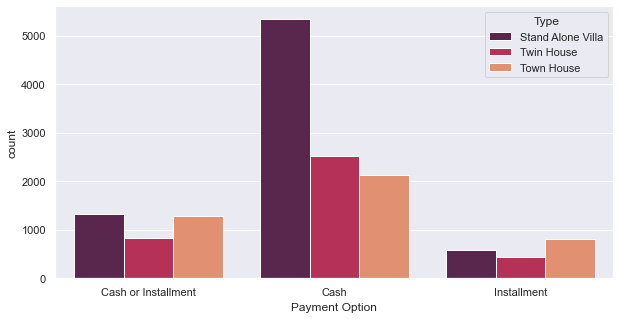

In [182]:
sns.countplot(x='Payment Option',  data=df,palette='rocket' , hue='Type')

## Compound

In [183]:
df['Compound'].unique()

array(["['Lake', 'West']", nan, "['Hyde', 'Park', 'New', 'Cairo']",
       "['Al', 'Rabwa']", "['Rehab', 'City']", "['Madinaty']",
       "['Village', 'West']", "['Beverly', 'Hills']", "['Villette']",
       "['Swan', 'Lake']", "['Sun', 'Capital']", "['Zizinia', 'Gardens']",
       "['EL', 'Patio', '5']", "['Layan']", "['Taj', 'City']",
       "['Al', 'Burouj']", "['Uptown', 'Cairo']", "['EL', 'Patio', '6']",
       "['The', 'Pearl']", "['El', 'Karma', '4']", "['El', 'Patio']",
       "['Mountain', 'View', 'Chillout', 'Park']", "['Royal', 'City']",
       "['Mena', 'Garden', 'City']", "['Al', 'Yasmine']",
       "['Royal', 'Meadows']", "['Sodic', 'Westown']",
       "['El', 'Karma', '2']", "['Allegria']", "['Sama']",
       "['New', 'Giza']", "['Shorouk', 'Gardens']",
       "['La', 'Verde', 'Casette']", "['Midtown', 'Sky']", "['Vinci']",
       "['IL', 'Bosco']", "['Blue', 'Vert']", "['Midtown', 'Solo']",
       "['Upville']", "['Jedar']", "['Stella', 'Compounds']", "['Etapa']",
     

In [184]:
def get_Compound(s):
    try:
        res = ast.literal_eval(s)
        return ' '.join(str(e) for e in res)
    except ValueError:
         return np.nan


df['Compound']=df['Compound'].apply(get_Compound)

In [185]:
df['Compound'].unique()

array(['Lake West', nan, 'Hyde Park New Cairo', 'Al Rabwa', 'Rehab City',
       'Madinaty', 'Village West', 'Beverly Hills', 'Villette',
       'Swan Lake', 'Sun Capital', 'Zizinia Gardens', 'EL Patio 5',
       'Layan', 'Taj City', 'Al Burouj', 'Uptown Cairo', 'EL Patio 6',
       'The Pearl', 'El Karma 4', 'El Patio',
       'Mountain View Chillout Park', 'Royal City', 'Mena Garden City',
       'Al Yasmine', 'Royal Meadows', 'Sodic Westown', 'El Karma 2',
       'Allegria', 'Sama', 'New Giza', 'Shorouk Gardens',
       'La Verde Casette', 'Midtown Sky', 'Vinci', 'IL Bosco',
       'Blue Vert', 'Midtown Solo', 'Upville', 'Jedar',
       'Stella Compounds', 'Etapa', 'Mountain View iCity', 'Azzar',
       'O West', 'Etoile de Ville', 'Palm Hills Katameya',
       'Palm Hills Katameya Extension', 'Dyar', 'Moon Hillls', 'La Vida',
       'The Square', 'Grand Residence', 'Katameya Breeze', 'Al Diyar',
       'Joulz', 'Badya Palm Hills', 'Palm hills golf extension',
       'Cairo Festival

In [186]:
df[df['Compound'].isna()]

,price,location,title,link,viwers,negotiable,Bedrooms,Bathrooms,Area,Type,...,Down Payment,vlaues,Day,Month,Year,Season,country,Cash,Installment,percentage
1,7700000.0,Rehab City,فيلا للبيع نموذج c بمدينة الرحاب تشطيب كامل,https://www.olx.com.eg/en/ad/c-IDcGhF0.html,291,0,3,3,456.0,Stand Alone Villa,...,7700000.0,NaN,1,3,2022,Spring,Cairo,1.0,0.0,NaN
11,7500000.0,Sheikh Zayed,#11تاون هاوس كورنر للبيع مقدم5%تقسيط8سنواتVILL...,https://www.olx.com.eg/en/ad/11-5-8village-wes...,40,0,4,3,223.0,Town House,...,750000.0,NaN,10,3,2022,Spring,Giza,0.0,1.0,NaN
20,2250000.0,Madinaty,فيلا توين نموذج E3 بفيلات الفورسيزون بأقل مقدم...,https://www.olx.com.eg/en/ad/e3-IDcGTZA.html,390,0,3,3,311.0,Twin House,...,2250000.0,NaN,5,3,2022,Spring,Cairo,1.0,0.0,100.000000
27,6250000.0,Sheikh Zayed,تاون هاوس 220 متر للبيع كمبوند فيلدج ويست درة ...,https://www.olx.com.eg/en/ad/220-IDcHrta.html,43,0,4,4,220.0,Town House,...,312500.0,NaN,9,3,2022,Spring,Giza,1.0,1.0,5.000000
34,10400000.0,Shorouk City,فيلا منفصلة للبيع ب 15% و قسط علي 6 سنين استلا...,https://www.olx.com.eg/en/ad/15-6-IDcHBln.html,42,0,4,4,321.0,Stand Alone Villa,...,1040000.0,NaN,10,3,2022,Spring,Cairo,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21701,2350000.0,New Capital City,تاون استلام فوري في كمبوند ازار 1,https://www.olx.com.eg/en/ad/1-IDcBhfl.html,20,0,4,5,237.0,Town House,...,2350000.0,NaN,23,1,2022,Winter,Cairo,1.0,0.0,NaN
21702,5650000.0,Rehab City,فيلا رباعي بالرحاب للبيع متميزه,https://www.olx.com.eg/en/ad/-IDcBhdE.html,11,0,3,3,260.0,Town House,...,5650000.0,NaN,23,1,2022,Winter,Cairo,1.0,0.0,NaN
21712,6771000.0,Sheikh Zayed,فيلا مستقلة 430 م للبيع أمام بيڤرلي هيلز مباشر...,https://www.olx.com.eg/en/ad/430-IDcouzJ.html,4,0,4,5,430.0,Stand Alone Villa,...,282000.0,NaN,23,1,2022,Winter,Giza,1.0,1.0,4.164821
21723,14000000.0,Madinaty,فيلا مستقلة 868م للبيع بمدينتي vg1 نصف تشطيب د...,https://www.olx.com.eg/en/ad/868-vg1-IDcBgUu.html,5,1,4,4,868.0,Stand Alone Villa,...,14000000.0,NaN,23,1,2022,Winter,Cairo,1.0,0.0,NaN


In [187]:
df['title'][21701]

'تاون استلام فوري في كمبوند ازار 1'

In [188]:
#Override
df['Compound'] = df["Compound"].replace("Not in Compound" ,np.nan)

In [189]:
df[df['Compound'] == 'Not in Compound'] 

,price,location,title,link,viwers,negotiable,Bedrooms,Bathrooms,Area,Type,...,Down Payment,vlaues,Day,Month,Year,Season,country,Cash,Installment,percentage


In [190]:
df[df['Compound']=='Azzar']

,price,location,title,link,viwers,negotiable,Bedrooms,Bathrooms,Area,Type,...,Down Payment,vlaues,Day,Month,Year,Season,country,Cash,Installment,percentage
142,15000000.0,New Cairo - El Tagamoa,فيلا مستقله للبيع 360م في كمبوند ازار بالتقسيط...,https://www.olx.com.eg/en/ad/360-10-0-IDcv0Ot....,17,0,5,6,271.0,Stand Alone Villa,...,1500000.0,NaN,12,3,2022,Spring,Cairo,0.0,1.0,NaN
963,14000000.0,New Cairo - El Tagamoa,فيلا للبيع فى أزار azzar2 استلام فورى بالتقسيط...,https://www.olx.com.eg/en/ad/azzar2-8-IDbGBzi....,26,0,4,4,750.0,Stand Alone Villa,...,1400000.0,NaN,10,3,2022,Spring,Cairo,1.0,1.0,NaN
1093,10000000.0,Dar al-Salaam,Twin house azar ready to move,https://www.olx.com.eg/en/ad/twin-house-azar-r...,29,0,4,3,305.0,Twin House,...,4700000.0,NaN,10,3,2022,Spring,Cairo,0.0,1.0,47.0
1591,15000000.0,New Cairo - El Tagamoa,أستلم فورا فيلا386م في الجولدن سكويربالتقسيط ع...,https://www.olx.com.eg/en/ad/386-IDcHq4q.html,67,0,5,5,286.0,Stand Alone Villa,...,1500000.0,NaN,9,3,2022,Spring,Cairo,0.0,1.0,NaN
1625,6800000.0,New Cairo - El Tagamoa,توين هاوس 225م بكمبوند ازار ف قلب التجمع بفيو ...,https://www.olx.com.eg/en/ad/225-8-IDcHpCR.html,41,1,4,3,225.0,Twin House,...,680000.0,NaN,9,3,2022,Spring,Cairo,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20883,6400000.0,New Cairo - El Tagamoa,تاون هاوس في كمبوند ازار بالتقسيط علي 8 سنوات,https://www.olx.com.eg/en/ad/8-IDbROYC.html,10,0,4,5,225.0,Town House,...,640000.0,NaN,25,1,2022,Winter,Cairo,0.0,1.0,10.0
21123,6500000.0,New Cairo - El Tagamoa,تاون هاوس للبيع فى ازار التجمع 5%مقدم اقساط تص...,https://www.olx.com.eg/en/ad/5-10-IDcpevc.html,16,0,4,4,206.0,Town House,...,650000.0,NaN,24,1,2022,Winter,Cairo,1.0,1.0,NaN
21403,7500000.0,New Cairo - El Tagamoa,بتصميمات مودرن أمتلك فيلا في الجولدن سكوير علي...,https://www.olx.com.eg/en/ad/-IDcBnA7.html,7,0,3,3,225.0,Town House,...,750000.0,NaN,24,1,2022,Winter,Cairo,0.0,1.0,NaN
21698,14000000.0,New Cairo - El Tagamoa,فيلا للبيع بكمبوند AZZAR 1 استلام فوري,https://www.olx.com.eg/en/ad/azzar-1-IDcBhh2.html,10,0,5,6,290.0,Twin House,...,1400000.0,NaN,23,1,2022,Winter,Cairo,1.0,1.0,NaN


In [191]:
df['title'].unique().tolist()

['استغل الفرصه وامتلك اخر فيلا في ليك ويست بتسهيلات حتي 8 سنين',
 'فيلا للبيع نموذج c بمدينة الرحاب تشطيب كامل',
 'توين هاوس 255م للبيع - هايد بارك - التجمع',
 'للبيع فيلا بسعر مميز علي الجولف كمبوند الربوة',
 'فيلا مستقلة متشطبة نموذج X للبيع بسعر حصري لسرعة البيع',
 'ارخص فيلا مستقله للبيع بمدينتى كامله التشطيب على افضل فيو لقطه',
 '#1فيلا تاون هاوس للبيع بالتقسيط 8سنوات في كمبوند فيلدج ويست الشيخ زايد',
 '#11تاون هاوس كورنر للبيع مقدم5%تقسيط8سنواتVILLAGE WEST VILLAالشيخ زايد',
 'فيلا منفصله للبيع في بيفرلي هيلز المرحله الاولي ٦٠٠ متر مع حمام سباحه',
 'Large villa with basement for sale in villette فيليت كمبوند',
 'للبيع فيلا في swan lake residence التجمع الخامس فقط بمقدم 5%',
 'فيلا للبيع فيو الجولف بسعر خيالي . تشطيب هاي الترا سوبر لوكس',
 'فيلا منفصلة للبيع مساحةً 287 متر في كمبوند sun capital',
 'فيلا للبيع في مدينتي تشطيب سوبر لوكس بحمام سباحة',
 'فيلا توين نموذج E3 بفيلات الفورسيزون بأقل مقدم وايد جاردن',
 'فيلا مستقلة 465 م في كمبوند زيزينيا جاردنز بسعر لقطة zizinia garden',
 

In [192]:
df['Compound'].unique()

array(['Lake West', nan, 'Hyde Park New Cairo', 'Al Rabwa', 'Rehab City',
       'Madinaty', 'Village West', 'Beverly Hills', 'Villette',
       'Swan Lake', 'Sun Capital', 'Zizinia Gardens', 'EL Patio 5',
       'Layan', 'Taj City', 'Al Burouj', 'Uptown Cairo', 'EL Patio 6',
       'The Pearl', 'El Karma 4', 'El Patio',
       'Mountain View Chillout Park', 'Royal City', 'Mena Garden City',
       'Al Yasmine', 'Royal Meadows', 'Sodic Westown', 'El Karma 2',
       'Allegria', 'Sama', 'New Giza', 'Shorouk Gardens',
       'La Verde Casette', 'Midtown Sky', 'Vinci', 'IL Bosco',
       'Blue Vert', 'Midtown Solo', 'Upville', 'Jedar',
       'Stella Compounds', 'Etapa', 'Mountain View iCity', 'Azzar',
       'O West', 'Etoile de Ville', 'Palm Hills Katameya',
       'Palm Hills Katameya Extension', 'Dyar', 'Moon Hillls', 'La Vida',
       'The Square', 'Grand Residence', 'Katameya Breeze', 'Al Diyar',
       'Joulz', 'Badya Palm Hills', 'Palm hills golf extension',
       'Cairo Festival

In [193]:
arabic_keys = [ 'ليك ويست' , 'هايد بارك', 'الربوة' , 'الرحاب' , 'مدينتى', 'فيلدج ويست' , 'بيفرلى هيلز' , 'فيليت'
               ,'سوان ليك' ,'صن كابيتال' , 'زيزينيا جاردنز' , 'الباتيو 5ايست' , 'ليان' , 'تاج سيتي' , 'البروج' , 'اب تاون كايرو'
               , 'باتيو ٦' , 'اللؤلؤة' , 'الكارما 4' , 'باتيو', 'ماونتن ڤيو تشيل اوت' , 'رويال سيتى' 
               , 'مينا جاردن سيتى' , 'الياسمين' , 'رويال ميدوز' , 'سوديك ويست تاون' , 'الكارما 2' , 'اليجريا'
               , 'سما' , 'نيو جيزة' , 'الشروق' , 'لافيردى كاسيت' , 'ميدتاون سكاي' , 'فنشي' , 'البوسكو' 
               , 'بلو فير' , 'ميدتاون سولو' , 'اب فيل' , 'جيدار' , 'كومباوند ستيلا' , 'ايتابا' , 'ماونتن فيو اى سيتى'
               , 'ازار' , 'اويست' , 'اتوال دوفيل' , 'بالم هيلز قطامية' , 'هيلز قطاميه اكستينشن' , 'ديار' 
               , 'مون هيلز', 'لافيدا' , 'ذا سكوير' , 'جراند ريزيدنس' , 'قطاميه بريز' , 'الديار' , 'جولز' , 'باديه بالم هيلز' 
               , 'بالم هيلز جولف اكستنشن', 'كايروفستفال' , 'فيلينو' , 'الكارما' , 'ميفيدا' , 'هاب تاون' , 'ريتش مونت' , 'دريم لاند'
               ,'لافيدا' , 'الباتيو اورو', 'بالم هيلز جولف فيوز' , 'قطامية ريريدنس' , 'سراى'
               , 'لى روا' , 'تاونى' , 'ريحانه' , 'ميفيدا' , 'لافيستا' , 'قطامية جاردنز' , 'سبرينجز الشروق'
               ,'الباتيو برايم' , 'مارينا سيتي' , 'ذا كراون' ,'باتيو كازا' , 'ريوس' , 'جرين بلازا' , 'ألما' , 'جوبيل' , 'زايد 2000'
               ,'كونكورد جاردنز' ,'باراديس', 'كليوباترا' , 'جاردينيا' , 'كيان', 'جويا' , 'النسايم' , 'اتريو' , 'بالم هيلز' , 'سيلفا'
               , 'الياسمين' , 'ماونتن فيو ٢'  , 'اوريكا', 'أسوار' , 'تريو جاردنز' , 'جراند هايتس' , 'ماونتن فيو اكتوبر بارك' ,'بيل', 'كيفا' , 'بالم هيلز' , 'بيتا جرينز', 'سوديك' , 'بلوم فيلدز' , 'بالم هيلز' , 'زايد ديونز' , 'بيراميدز ووك'
               , 'صن رايز' , 'مونتي نابول' , 'كليوباترا اسكوير' , 'لينا سبرينجز' , 'بيلاجيو' , 'التجمع الخامس' , 'مكسيم'
               , 'جولدن هايتس' , 'زيد ايست','ليك فيو' , 'ريفير ووك', 'كازا فيردى' , 'مون فالى' 
               , 'لاروزا' , 'ميدوز بارك' , 'جيرا' ,'ريحانه' 
               , 'ببالم فالى', 'بيل ايير - بيفرلي','ستون هيلز'
               , 'العربية' , 'المقصد','جرين 4 ','الكرمة ريزيدنس','كمبوند 2020','النخيل','بامبو بالم هيلز','لافاونتن الشربتلى'
               ,'جرينز','الهضبة',' بورتو اكتوبر','ذا أستيتس','ماونتن فيو '
               ,'ذا مارك','ريم ريزيدنس','الاندلس','ديفينا جاردنز','ايفوري هيلز'
               ,'كريك تاون','ديستريكت 5','لاك فيل','ستون بارك','ماونتن فيو هايد بارك','لاتيرا','فيلدج جاردن قطامية'
               ,'كايرو جيت','ريحانة','الجزيره','صن سيتى','روك فيل','قطاميه ديونز' ,' ذا ووتر مارك','برنسيس','اميرالد بارك'
               ,'بيراميدز هايتس','حياة ريزيدنس','فلور دي فيل','ستيلا','زاهية',' سكاي كوندوز'
               ,'ال بوسكو','زهرة التجمع','زايد ريجنسي','جولف السليمانية','ماونتن فيو اكزيكتيف','سكاى كابيتال','وودفيل','الأصالة','حياه ريزيدنس','ماي فاير','جاردينيا سبرينجس',' كابيتال جاردنز','فاونتن بارك','قطاميه هيلز','كونكورديا'
               ,'ميد تاون','الباتيو٤','90 افينيو','لانوفا فيستا ','كابيتال هايتس 2','زايد جرينز'
               ,'ويست جيت','ماجوريل','الباتيو 3','بيراميدز هيلز','لافينير','الباتيو 2',
               'سيلينا','بادية','بارك فيو ','بروميناد','ابو الهول ','الحياة','فلاورز بارك','مون جاردينز','ليك سايد','فيلار',
               ' الدبلماسيين','لافيردي','حي الاشجار','لاند مارك ','ستيلا بارك','جرين سكوير'
               ,'كونتيننتال ','تاج سلطان','يارو','ايفر جرين','غرب الجولف'
               ,'ماونتن فيو كمبوند جيزه بلاتوه' , 'سيزونز' , 'ابراج زيد' , 'أب هيل ريزيدنس' , 'مونتن فيو 3' , 'القرنفل هايتس', 'بالخمايل' , 'جوا' , 'مينا رزيدنس' , 'المدينه' , 'حياه' , 'مون لاند' ,'ذا بروكس', 'الباتيو 7' , 'قطاميه بالمز'
             , 'الجزيره' , 'أبها' , 'لو جاردن' , 'فيلدج' ,'جراندا','ريفيرا هايتس', 'سيليا' , 'جولدن هايتس' , 'بورتو كايرو' 
             , 'ذا بروكس' , 'رويال لاجون' , 'جولف سيتى العبور' , 'البا ' , 'اوديسيا' , 'بالم هيلز الاسكندرية' 
             , 'ويست 6' , 'الجولف سيتى العبور' , 'اوبرا سيتي' , 'جرين لاند' , 'بالريف الاوروبى' , 'ايزولا' , 'طيبة'
             , 'بارك لين' , 'دار مصر' , 'ستاو' , 'شارع التسعين' , 'كريك بارك' , 'الكرمة 3' ,'مون فالي','جراندا' ,'ريفيرا هايتس' ,'سيليا', 'لايك فرونت' , 'هليوبلس' 
             , 'مسكيم' , ' ريزيدنس 8' , 'اطلالة' , 'أشجار سيتي' , ' رودس' , 'جرانا' , 'كومكس جاردنز'
             , 'هليوبوليس' , 'كينجز رينج'

              ]
               
#arabic_keys
             

In [194]:
# df['title'][19481]

# df['title'][df['Compound']=='Kings range']

In [195]:
english_values = df['Compound'].dropna().unique().tolist()

keys = arabic_keys + english_values

values = english_values + english_values

d = dict(zip(keys, values))
d

{'ليك ويست': 'Lake West',
 'هايد بارك': 'Hyde Park New Cairo',
 'الربوة': 'Al Rabwa',
 'الرحاب': 'Rehab City',
 'مدينتى': 'Madinaty',
 'فيلدج ويست': 'Village West',
 'بيفرلى هيلز': 'Beverly Hills',
 'فيليت': 'Villette',
 'سوان ليك': 'Swan Lake',
 'صن كابيتال': 'Sun Capital',
 'زيزينيا جاردنز': 'Zizinia Gardens',
 'الباتيو 5ايست': 'EL Patio 5',
 'ليان': 'Layan',
 'تاج سيتي': 'Taj City',
 'البروج': 'Al Burouj',
 'اب تاون كايرو': 'Uptown Cairo',
 'باتيو ٦': 'EL Patio 6',
 'اللؤلؤة': 'The Pearl',
 'الكارما 4': 'El Karma 4',
 'باتيو': 'El Patio',
 'ماونتن ڤيو تشيل اوت': 'Mountain View Chillout Park',
 'رويال سيتى': 'Royal City',
 'مينا جاردن سيتى': 'Mena Garden City',
 'الياسمين': 'Jasmine City',
 'رويال ميدوز': 'Royal Meadows',
 'سوديك ويست تاون': 'Sodic Westown',
 'الكارما 2': 'El Karma 2',
 'اليجريا': 'Allegria',
 'سما': 'Sama',
 'نيو جيزة': 'New Giza',
 'الشروق': 'Shorouk Gardens',
 'لافيردى كاسيت': 'La Verde Casette',
 'ميدتاون سكاي': 'Midtown Sky',
 'فنشي': 'Vinci',
 'البوسكو': 'IL Bo

In [196]:
d.update({'إيوان' : 'Atrio' ,'سودك ايست' : 'Sodic East',
            'سوديك الشروق' : 'Sodic East',
            'كزا فيردي' : 'Casa Verde',
            'ايوان' : 'Jeera',
            'ذابروكس' : 'The Brooks',
            'أوديسيا' : 'Odyssia',
            'حدائق المهندسين' : 'Hadayek El Mohandessin'})

In [197]:
print(d['اطلالة'])

Etlalah


In [198]:
def func(x):
    if pd.isna(x['Compound']):
        for key in d:
            if key in x['title']:
                x['Compound'] = d[key]
                break
    
    return x

df = df.apply(func, axis = 1)

In [199]:
df['Compound'].fillna('not compound', inplace=True)

In [200]:
df.isna().sum()

price                 0
location              0
title                 0
link                  0
viwers                0
negotiable            0
Bedrooms              0
Bathrooms             0
Area                  0
Type                  0
Payment Option        0
Compound              0
Delivery Term      6034
Amenities          4144
Furnished          5315
Delivery Date      4046
Down Payment          0
vlaues            15255
Day                   0
Month                 0
Year                  0
Season                0
country               0
Cash                  0
Installment           0
percentage        12273
dtype: int64

In [201]:
#sns.countplot(y='Compound',  data=df,palette='rocket' , hue='Type')

In [202]:
df['Compound'].value_counts()

not compound    2632
Madinaty        1056
Mivida           633
Layan            534
Rehab City       493
                ... 
Le Jardin          1
The Village        1
Porto Cairo        1
GCR                1
Kings range        1
Name: Compound, Length: 279, dtype: int64

In [203]:
# def compound_name(x):
#         if 'كمبوند ' in x:
#             return 1
#         else:
#             return 0
# df['is_compound'] = df['title'].apply(compound_name)

# df['is_compound'].value_counts()

# compound_name(df['title'][20])

# df['Compound'].isnull() == False

# df[(df['is_compound']==1) & (df['Compound'].isnull() == True) ]

# df['title'][21545]

In [204]:
################

## Delivery Term

In [205]:
df['Delivery Term'].unique()

array(["['Core', '&', 'Shell']", "['Finished']", "['Semi', 'Finished']",
       "['Not', 'Finished']", nan], dtype=object)

In [206]:
def get_Delivery_Term(s):
    try:
        res = ast.literal_eval(s)
        return ' '.join(str(e) for e in res)
    except ValueError:
         return np.nan


df['Delivery Term']=df['Delivery Term'].apply(get_Delivery_Term)

In [207]:
df['Delivery Term'].unique()

array(['Core & Shell', 'Finished', 'Semi Finished', 'Not Finished', nan],
      dtype=object)

<AxesSubplot:xlabel='Delivery Term', ylabel='count'>

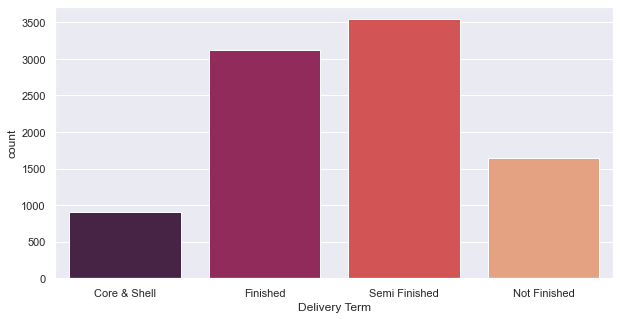

In [208]:
sns.countplot(x='Delivery Term',  data=df,palette='rocket' )

In [209]:
df['Delivery Term'].isna().sum()

6034

In [210]:
#df['Delivery Term'].fillna(df['Delivery Term'].mode()[0], inplace=True)

In [211]:
df['Delivery Term'].replace('Finished',1, inplace=True)
df['Delivery Term'].replace('Not Finished',2 ,inplace = True)
df['Delivery Term'].replace('Semi Finished',3 ,inplace = True)
df['Delivery Term'].replace('Core & Shell',4 ,inplace = True)
df['Delivery Term'].unique()

array([ 4.,  1.,  3.,  2., nan])

In [212]:
imputer1 = KNNImputer(n_neighbors=4)
df[['Delivery Term']] = imputer1.fit_transform(df[['Delivery Term']])


<AxesSubplot:xlabel='Delivery Term', ylabel='count'>

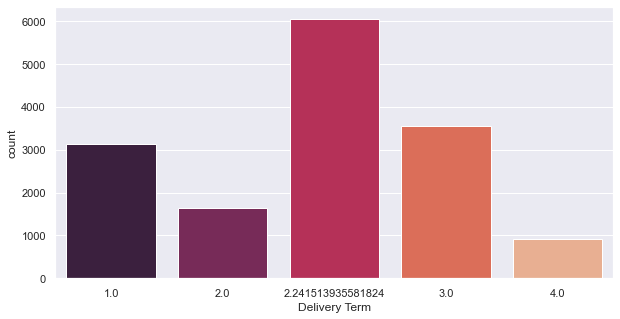

In [213]:
sns.countplot(x='Delivery Term',  data=df,palette='rocket' )

In [214]:
df['Delivery Term'].isna().sum()

0

## Finished

In [215]:
df.rename(columns = {'Furnished':'finished', }, inplace = True)

In [216]:
df['finished'].unique()

array([nan, "['No']", "['Yes']"], dtype=object)

In [217]:
def get_finished(s):
    try:
        res = ast.literal_eval(s)
        return ' '.join(str(e) for e in res)
    except ValueError:
         return np.nan


df['finished']=df['finished'].apply(get_finished)

In [218]:
df['finished'].unique()

array([nan, 'No', 'Yes'], dtype=object)

In [219]:
df['finished'].isna().sum()

5315

<AxesSubplot:xlabel='finished', ylabel='count'>

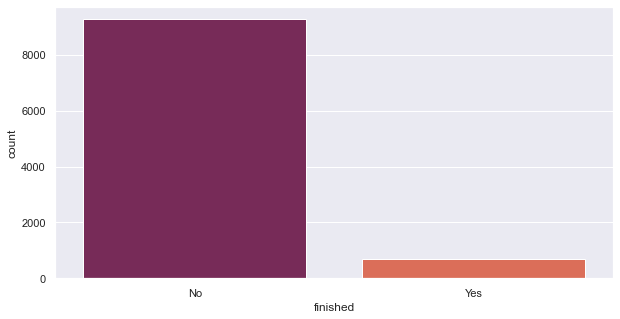

In [220]:
sns.countplot(x='finished',  data=df,palette='rocket')
#fy 7agat 3'rebah

In [221]:
# def fill_nan(x):
#     if pd.isna(x['finished']):
#         if (x['Delivery Term']=='Core & Shell')|(x['Delivery Term']=='Not Finished')|(x['Delivery Term']=='Semi Finished'):
#             x['finished'].fillna('no' , inplace=True)
#         elif (x['Delivery Term']=='Finished'):
#             x['finished'].fillna('yes' , inplace=True)
# df=df.apply(fill_nan , axis=1)        

In [222]:
imputer2 = SimpleImputer(strategy='most_frequent')
df[['finished']] = imputer2.fit_transform(df[['finished']])

In [223]:
df['finished'].isna().sum()

0

## Delivery Date

In [224]:
df['Delivery Date'].unique()

array([nan, "['Ready', 'to', 'move']", "['2025']", "['2026']", "['soon']",
       "['2024']", "['2023']", "['within', '6', 'months']", "['2022']",
       "['2027']"], dtype=object)

In [225]:
def get_Delivery_Date(s):
    try:
        res = ast.literal_eval(s)
        return ' '.join(str(e) for e in res)
    except ValueError:
         return np.nan


df['Delivery Date']=df['Delivery Date'].apply(get_Delivery_Date)

In [226]:
df['Delivery Date'].unique()

array([nan, 'Ready to move', '2025', '2026', 'soon', '2024', '2023',
       'within 6 months', '2022', '2027'], dtype=object)

In [227]:
##Describe gives statistical information about numerical columns in the dataset
df.describe()

,price,viwers,negotiable,Bedrooms,Bathrooms,Area,Delivery Term,Down Payment,vlaues,Day,Month,Year,Cash,Installment,percentage
count,1.525500e+04,15255.000000,15255.000000,15255.000000,15255.000000,15255.000000,15255.000000,1.525500e+04,0.0,15255.000000,15255.000000,15255.0,15255.000000,15255.000000,2982.000000
mean,7.910659e+06,52.243920,0.129335,4.249951,4.079843,399.111796,2.241514,6.146099e+06,NaN,14.501475,2.120944,2022.0,0.883907,0.343101,96.475090
std,3.694969e+06,65.636782,0.335581,1.069498,0.990209,161.137255,0.799942,1.851104e+07,NaN,9.014308,0.639888,0.0,0.320347,0.474760,1566.098305
min,2.000000e+06,2.000000,0.000000,3.000000,3.000000,200.000000,1.000000,0.000000e+00,NaN,1.000000,1.000000,2022.0,0.000000,0.000000,0.000000
25%,5.150000e+06,15.000000,0.000000,4.000000,3.000000,275.000000,2.000000,8.582742e+05,NaN,7.000000,2.000000,2022.0,1.000000,0.000000,9.948448
50%,7.200000e+06,32.000000,0.000000,4.000000,4.000000,355.000000,2.241514,5.500000e+06,NaN,13.000000,2.000000,2022.0,1.000000,0.000000,15.000000
75%,1.000000e+07,61.000000,0.000000,5.000000,5.000000,488.000000,3.000000,9.000000e+06,NaN,23.000000,3.000000,2022.0,1.000000,1.000000,94.666590
max,1.976000e+07,1270.000000,1.000000,10.000000,8.000000,880.000000,4.000000,1.276664e+09,NaN,31.000000,3.000000,2022.0,1.000000,1.000000,63810.851752


In [228]:
df['Delivery Date'].isna().sum()

4046

<AxesSubplot:xlabel='count', ylabel='Delivery Date'>

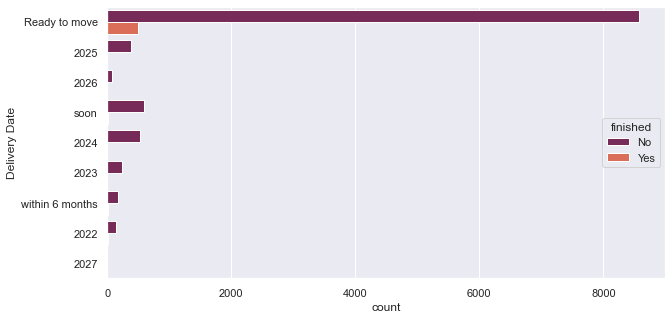

In [229]:
sns.countplot(y='Delivery Date',  data=df,palette='rocket',hue='finished')

In [230]:
df['Delivery Date'].fillna(df['Delivery Date'].mode()[0], inplace=True)

<AxesSubplot:xlabel='count', ylabel='Delivery Date'>

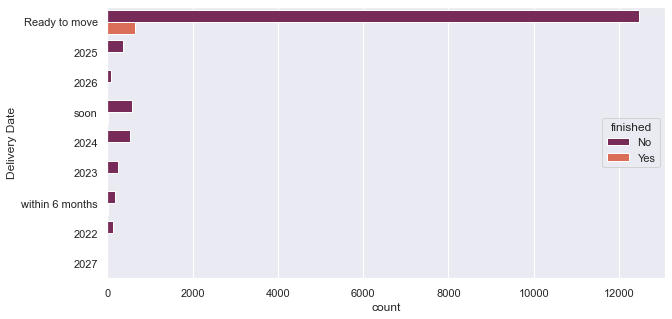

In [231]:
sns.countplot(y='Delivery Date',  data=df,palette='rocket',hue='finished')

In [232]:
df['Delivery Date'].isna().sum()

0

## Amenities

In [233]:
df['Amenities'].unique ()

array([nan,
       "['Balcony', 'Pets', 'Allowed', 'Private', 'Garden', 'Security', 'Electricity', 'Meter', 'Water', 'Meter', 'Natural', 'Gas', 'Landline']",
       "['Private', 'Garden', 'Security']", ...,
       "['Balcony', 'Built', 'in', 'Kitchen', 'Appliances', 'Central', 'A/C', '&', 'heating', 'Maids', 'Room', 'Pets', 'Allowed', 'Private', 'Garden', 'Security', 'Pool', 'Electricity', 'Meter', 'Water', 'Meter']",
       "['Balcony', 'Central', 'A/C', '&', 'heating', 'Maids', 'Room', 'Pets', 'Allowed', 'Private', 'Garden', 'Security', 'Pool', 'Electricity', 'Meter', 'Natural', 'Gas']",
       "['Balcony', 'Built', 'in', 'Kitchen', 'Appliances', 'Central', 'A/C', '&', 'heating', 'Electricity', 'Meter', 'Water', 'Meter', 'Natural', 'Gas', 'Landline']"],
      dtype=object)

In [234]:
def get_Amenities(s):
    try:
        res = ast.literal_eval(s)
        return ' '.join(str(e) for e in res)
    except ValueError:
         return np.nan


df['Amenities']=df['Amenities'].apply(get_Amenities)

In [235]:
df['Amenities'][1]

'Balcony Pets Allowed Private Garden Security Electricity Meter Water Meter Natural Gas Landline'

In [236]:
import math

Max=0
for i in df['Amenities']:
    if type(i)==str :  
    #if not math.isnan(float(i)):
        if len(i.split(' ')) >= Max:
            Max = len(i.split(' '))
            #print(i)
            #print('_________')

Max                  
    

27

In [237]:
df['Amenities'][10]

'Balcony Covered Parking Maids Room Pets Allowed Private Garden Security Pool Electricity Meter Water Meter Natural Gas Landline'

In [238]:
type(df['Amenities'][10])

str

In [239]:
import math
#math.isnan(df['Amenities'][16])

In [240]:
st = 'Balcony Built in Kitchen Appliances Central A/C & heating Covered Parking Maids Room Pets Allowed Private Garden Security Pool Electricity Meter Water Meter Natural Gas Landline Elevator'
st.split(' ')

['Balcony',
 'Built',
 'in',
 'Kitchen',
 'Appliances',
 'Central',
 'A/C',
 '&',
 'heating',
 'Covered',
 'Parking',
 'Maids',
 'Room',
 'Pets',
 'Allowed',
 'Private',
 'Garden',
 'Security',
 'Pool',
 'Electricity',
 'Meter',
 'Water',
 'Meter',
 'Natural',
 'Gas',
 'Landline',
 'Elevator']

In [241]:
"""
Balcony
Pets_Allowed
Private_Garden
Security 
Electricity_Meter
Water_Meter
Natural_Gas 
Landline
Built_in_Kitchen
Appliances #اجهزه
Maids_Room 
Covered_Parking #غرف خادم   
Central_A/C_&_heating
Pool 
Elevator

"""

'\nBalcony\nPets_Allowed\nPrivate_Garden\nSecurity \nElectricity_Meter\nWater_Meter\nNatural_Gas \nLandline\nBuilt_in_Kitchen\nAppliances #اجهزه\nMaids_Room \nCovered_Parking #غرف خادم   \nCentral_A/C_&_heating\nPool \nElevator\n\n'

In [242]:
def get_Balcony(x):
    if type(x) == str:
        if 'Balcony' in x:
            return 1
        else:
            return 0
  
df['Balcony'] = df['Amenities'].apply(get_Balcony)


In [243]:
df['Balcony'] = df['Balcony'].astype('Int32')


In [244]:
def get_Pets_Allowed(x):
    if type(x) == str:
        if 'Pets' in x:
            return 1
        else:
            return 0
  
df['Pets_Allowed'] = df['Amenities'].apply(get_Balcony)

In [245]:
df['Pets_Allowed'] = df['Pets_Allowed'].astype('Int32')

In [246]:
def get_Private_Garden(x):
    if type(x) == str:
        if 'Private' in x:
            return 1
        else:
            return 0
  
df['Private_Garden'] = df['Amenities'].apply(get_Private_Garden)

In [247]:
df['Private_Garden'] = df['Private_Garden'].astype('Int32')

In [248]:
def get_Security(x):
    if type(x) == str:
        if 'Security' in x:
            return 1
        else:
            return 0
  
df['Security'] = df['Amenities'].apply(get_Security)

In [249]:
df['Security'] = df['Security'].astype('Int32')

In [250]:
def get_Electricity_Meter(x):
    if type(x) == str:
        if 'Electricity' in x:
            return 1
        else:
            return 0
  
df['Electricity_Meter'] = df['Amenities'].apply(get_Electricity_Meter)

In [251]:
df['Electricity_Meter'] = df['Electricity_Meter'].astype('Int32')

In [252]:
def get_Water_Meter(x):
    if type(x) == str:
        if 'Water' in x:
            return 1
        else:
            return 0
  
df['Water_Meter'] = df['Amenities'].apply(get_Water_Meter)

In [253]:
df['Water_Meter'] = df['Water_Meter'].astype('Int32')

In [254]:
def get_Natural_Gas(x):
    if type(x) == str:
        if 'Natural' in x:
            return 1
        else:
            return 0
  
df['Natural_Gas'] = df['Amenities'].apply(get_Natural_Gas)

In [255]:
df['Natural_Gas'] = df['Natural_Gas'].astype('Int32')

In [256]:
def get_Landline(x):
    if type(x) == str:
        if 'Landline' in x:
            return 1
        else:
            return 0
  
df['Landline'] = df['Amenities'].apply(get_Landline)

In [257]:
df['Landline'] = df['Landline'].astype('Int32')

In [258]:
def get_Built_in_Kitchen(x):
    if type(x) == str:
        if 'Built' in x:
            return 1
        else:
            return 0
  
df['Built_in_Kitchen'] = df['Amenities'].apply(get_Built_in_Kitchen)

In [259]:
df['Built_in_Kitchen'] = df['Built_in_Kitchen'].astype('Int32')

In [260]:
def get_Appliances(x):
    if type(x) == str:
        if 'Appliances' in x:
            return 1
        else:
            return 0
  
df['Appliances'] = df['Amenities'].apply(get_Appliances)

In [261]:
df['Appliances'] = df['Appliances'].astype('Int32')

In [262]:
def get_Maids_Room  (x):
    if type(x) == str:
        if 'Maids' in x:
            return 1
        else:
            return 0
  
df['Maids_Room'] = df['Amenities'].apply(get_Maids_Room)

In [263]:
df['Maids_Room'] = df['Maids_Room'].astype('Int32')

In [264]:
def get_Covered_Parking  (x):
    if type(x) == str:
        if 'Covered' in x:
            return 1
        else:
            return 0
  
df['Covered_Parking'] = df['Amenities'].apply(get_Covered_Parking)

In [265]:
df['Covered_Parking'] = df['Covered_Parking'].astype('Int32')

In [266]:
def get_Central_conditioner_heating(x):
    if type(x) == str:
        if 'Central' in x:
            return 1
        else:
            return 0
  
df['Central_conditioner_heating'] = df['Amenities'].apply(get_Central_conditioner_heating)

In [267]:
df['Central_conditioner_heating'] = df['Central_conditioner_heating'].astype('Int32')

In [268]:
def get_Pool(x):
    if type(x) == str:
        if 'Pool' in x:
            return 1
        else:
            return 0
  
df['Pool'] = df['Amenities'].apply(get_Pool)

In [269]:
df['Pool'] = df['Pool'].astype('Int32')

In [270]:
def get_Elevator(x):
    if type(x) == str:
        if 'Elevator' in x:
            return 1
        else:
            return 0
  
df['Elevator'] = df['Amenities'].apply(get_Elevator)

In [271]:
df['Elevator'] = df['Elevator'].astype('Int32')

In [272]:
df.isna().sum()

price                              0
location                           0
title                              0
link                               0
viwers                             0
negotiable                         0
Bedrooms                           0
Bathrooms                          0
Area                               0
Type                               0
Payment Option                     0
Compound                           0
Delivery Term                      0
Amenities                       4144
finished                           0
Delivery Date                      0
Down Payment                       0
vlaues                         15255
Day                                0
Month                              0
Year                               0
Season                             0
country                            0
Cash                               0
Installment                        0
percentage                     12273
Balcony                         4144
P

In [273]:
df['Balcony'].fillna(df['Balcony'].mode()[0], inplace=True)
df['Pets_Allowed'].fillna(df['Pets_Allowed'].mode()[0], inplace=True)
df['Private_Garden'].fillna(df['Private_Garden'].mode()[0], inplace=True)
df['Security'].fillna(df['Security'].mode()[0], inplace=True)
df['Electricity_Meter'].fillna(df['Electricity_Meter'].mode()[0], inplace=True)
df['Water_Meter'].fillna(df['Water_Meter'].mode()[0], inplace=True)
df['Natural_Gas'].fillna(df['Natural_Gas'].mode()[0], inplace=True)
df['Landline'].fillna(df['Landline'].mode()[0], inplace=True)
df['Built_in_Kitchen'].fillna(df['Built_in_Kitchen'].mode()[0], inplace=True)
df['Appliances'].fillna(df['Appliances'].mode()[0], inplace=True)
df['Maids_Room'].fillna(df['Maids_Room'].mode()[0], inplace=True)
df['Covered_Parking'].fillna(df['Covered_Parking'].mode()[0], inplace=True)
df['Central_conditioner_heating'].fillna(df['Central_conditioner_heating'].mode()[0], inplace=True)
df['Pool'].fillna(df['Pool'].mode()[0], inplace=True)
df['Elevator'].fillna(df['Elevator'].mode()[0], inplace=True)

In [274]:
df.isna().sum()

price                              0
location                           0
title                              0
link                               0
viwers                             0
negotiable                         0
Bedrooms                           0
Bathrooms                          0
Area                               0
Type                               0
Payment Option                     0
Compound                           0
Delivery Term                      0
Amenities                       4144
finished                           0
Delivery Date                      0
Down Payment                       0
vlaues                         15255
Day                                0
Month                              0
Year                               0
Season                             0
country                            0
Cash                               0
Installment                        0
percentage                     12273
Balcony                            0
P

In [275]:
df.drop('vlaues' , inplace=True , axis=1)
df.drop('Amenities'  ,axis=1 , inplace=True)
df.drop('Payment Option'  ,axis=1 , inplace=True)

In [276]:
df.drop('percentage'  ,axis=1 , inplace=True)

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15255 entries, 0 to 21736
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        15255 non-null  float64
 1   location                     15255 non-null  object 
 2   title                        15255 non-null  object 
 3   link                         15255 non-null  object 
 4   viwers                       15255 non-null  int64  
 5   negotiable                   15255 non-null  int64  
 6   Bedrooms                     15255 non-null  int64  
 7   Bathrooms                    15255 non-null  int64  
 8   Area                         15255 non-null  float64
 9   Type                         15255 non-null  object 
 10  Compound                     15255 non-null  object 
 11  Delivery Term                15255 non-null  float64
 12  finished                     15255 non-null  object 
 13  Delivery Date   

In [278]:
df.isna().sum()

price                          0
location                       0
title                          0
link                           0
viwers                         0
negotiable                     0
Bedrooms                       0
Bathrooms                      0
Area                           0
Type                           0
Compound                       0
Delivery Term                  0
finished                       0
Delivery Date                  0
Down Payment                   0
Day                            0
Month                          0
Year                           0
Season                         0
country                        0
Cash                           0
Installment                    0
Balcony                        0
Pets_Allowed                   0
Private_Garden                 0
Security                       0
Electricity_Meter              0
Water_Meter                    0
Natural_Gas                    0
Landline                       0
Built_in_K

In [279]:

#from sklearn.impute import KNNImputer
#imputer = KNNImputer()
#df['col']=imputer.fit_transform(df[['col']])

In [280]:
#drop col (if aktr mn nos el data)
#or drop row
#or impute
# float feature --> mean or median(if outliers)
# int feature --> median
# catg feature --> mode

#we can filling data with sklearn or pandas , (sklearn is better)
# imputer can be knn or simpleImputer(mean,median,mode)

#from sklearn.impute import SimpleImputer
#imputer2 = SimpleImputer(strategy='most_frequent')
#df['col']=imputer2.fit_transform(df[['col']])



#from sklearn.impute import KNNImputer
#imputer = KNNImputer()
#df['col']=imputer.fit_transform(df[['col']])

### Save New Date in CSV

In [281]:
#df.to_csv('villas_after_editing.csv', index=False , encoding='utf-8')

In [282]:
df.shape

(15255, 37)

In [283]:
country_list = df['country'].unique().tolist()
country_list

['Giza',
 'Cairo',
 'Dakahlia',
 'Alexandria',
 'Fayoum',
 'Matruh',
 'Port Said',
 'Red Sea',
 'Luxor',
 'Gharbia',
 'Suez',
 'Ismailia',
 'Sohag',
 'Sharqia',
 'South Sinai',
 'Monufia',
 'Minya',
 'Qalyubia',
 'Damietta',
 'Kafr al-Sheikh',
 'Asyut',
 'Beni Suef',
 'Beheira']

In [284]:
location_list = df['location'].unique().tolist()
location_list

['Sheikh Zayed',
 'Rehab City',
 'New Cairo - El Tagamoa',
 'Madinaty',
 '6th of October',
 'Shorouk City',
 'Mokattam',
 'Mansura',
 'Sidi Beshr',
 'Fayoum City',
 'New Capital City',
 'Mostakbal City',
 'North Coast',
 'Heliopolis',
 'Borg al-Arab',
 'Zohour District',
 'Hadayek al-Ahram',
 'Hurghada',
 'Isna',
 'Hadayek 6th of October',
 'Kafr al-Zayat',
 'Ain Sukhna',
 'Ismailia City',
 'Giza District',
 'Haram',
 'New Sohag',
 '10th of Ramadan',
 'Obour City',
 'Dokki',
 'Maadi',
 'New Heliopolis',
 'Alamein',
 'Sharm al-Sheikh',
 'Dar al-Salaam',
 'Sayeda Zeinab',
 'Ard El Lewa',
 'New Mansoura',
 'Badr City',
 'Downtown Cairo',
 'Tanta',
 'Sharq District',
 'Moharam Bik',
 'Sadat',
 'West Somid',
 'Nasr City',
 'Agami',
 'Gesr Al Suez',
 '15 May City',
 'Mohandessin',
 'Marg',
 'Kafr Abdo',
 'Ain Shams',
 'Al Ibrahimiyyah',
 'Tersa',
 'Kerdasa',
 'Sheraton',
 'Abu Talat',
 'Minya City',
 'Ras Sedr',
 'Banha',
 'Helwan',
 'New Damietta',
 'Shohadaa',
 'Maamoura',
 'Katameya',
 'S

In [285]:
Compound_list = df['Compound'].unique().tolist()
Compound_list

['Lake West',
 'Rehab City',
 'Hyde Park New Cairo',
 'Al Rabwa',
 'Madinaty',
 'Village West',
 'not compound',
 'Beverly Hills',
 'Villette',
 'Swan Lake',
 'Sun Capital',
 'Zizinia Gardens',
 'EL Patio 5',
 'Layan',
 'Taj City',
 'Al Burouj',
 'Uptown Cairo',
 'EL Patio 6',
 'The Pearl',
 'El Karma 4',
 'El Patio',
 'Shorouk Gardens',
 'Mountain View Chillout Park',
 'Royal City',
 'Mena Garden City',
 'Belle Vie',
 'Jewar',
 'Al Yasmine',
 'Royal Meadows',
 'Sodic Westown',
 'El Karma 2',
 'Allegria',
 'Sama',
 'New Giza',
 'La Verde Casette',
 'Midtown Sky',
 'Vinci',
 'IL Bosco',
 'Blue Vert',
 'Bloomfields',
 'Midtown Solo',
 'Upville',
 'Green 4',
 'Jedar',
 'Stella Compounds',
 'Etapa',
 'Fifth Square',
 'Mountain View iCity',
 'Azzar',
 'O West',
 'Etoile de Ville',
 'Palm Hills Katameya',
 'Palm Hills Katameya Extension',
 'Dyar',
 'Moon Hillls',
 'La Vida',
 'The Square',
 'Grand Residence',
 'Katameya Breeze',
 'Al Diyar',
 'Lavida',
 'Joulz',
 'Badya Palm Hills',
 'Palm h

In [286]:
print(len(Compound_list))
print(len(location_list))
print(len(country_list))

279
120
23


In [287]:
df2=df

## Data Analysis 

- Distribution villa's area and price
- What is the average price ?
- What are the 5 most common features of villa's?
- What is the villa name and compound of the highest price which has all Amenities?
- what most years advertisments ?
- what compound  most viewed (sort by most viewed)?
- which year ,month and season that has most viewers?
- how many owners have ability of negotiable?
- What is the best for viewer negotiable or not negotiable?
- what location of villas' that have biggest area?
- how many villa's in compound ... ?
- which date has finished villa's and Ready to move?
- what is the maximum price in villas and what is the name of compound?


In [288]:
df.columns

Index(['price', 'location', 'title', 'link', 'viwers', 'negotiable',
       'Bedrooms', 'Bathrooms', 'Area', 'Type', 'Compound', 'Delivery Term',
       'finished', 'Delivery Date', 'Down Payment', 'Day', 'Month', 'Year',
       'Season', 'country', 'Cash', 'Installment', 'Balcony', 'Pets_Allowed',
       'Private_Garden', 'Security', 'Electricity_Meter', 'Water_Meter',
       'Natural_Gas', 'Landline', 'Built_in_Kitchen', 'Appliances',
       'Maids_Room', 'Covered_Parking', 'Central_conditioner_heating', 'Pool',
       'Elevator'],
      dtype='object')

<h1 style="font-family:cursive; font-size:1.5em;color:brown;"> Distribution villa's area,bedroom, bathroom and price </h1>

In [289]:
df[['Area','price']].corr()
# weak correction 

,Area,price
Area,1.000000,0.498363
price,0.498363,1.000000


In [290]:
df[['Bedrooms','price']].corr()
#weak correlation 

,Bedrooms,price
Bedrooms,1.000000,0.183116
price,0.183116,1.000000


In [291]:
df[['Bathrooms','price']].corr()
#weak correlation 

,Bathrooms,price
Bathrooms,1.00000,0.31035
price,0.31035,1.00000


<h1 style="font-family:cursive; font-size:1.5em;color:brown;"> - What is the average price ? </h1>

In [292]:
df['price'].describe ()
# max is 19760000(nineteen million seven hundred sixty thousand) and min is 2000000(two million)

count    1.525500e+04
mean     7.910659e+06
std      3.694969e+06
min      2.000000e+06
25%      5.150000e+06
50%      7.200000e+06
75%      1.000000e+07
max      1.976000e+07
Name: price, dtype: float64

<h1 style="font-family:cursive; font-size:1.5em;color:brown;"> What are the 5 most common features of villa's? </h1>

In [293]:
df.columns

Index(['price', 'location', 'title', 'link', 'viwers', 'negotiable',
       'Bedrooms', 'Bathrooms', 'Area', 'Type', 'Compound', 'Delivery Term',
       'finished', 'Delivery Date', 'Down Payment', 'Day', 'Month', 'Year',
       'Season', 'country', 'Cash', 'Installment', 'Balcony', 'Pets_Allowed',
       'Private_Garden', 'Security', 'Electricity_Meter', 'Water_Meter',
       'Natural_Gas', 'Landline', 'Built_in_Kitchen', 'Appliances',
       'Maids_Room', 'Covered_Parking', 'Central_conditioner_heating', 'Pool',
       'Elevator'],
      dtype='object')

In [294]:
features = ['Balcony', 'Pets_Allowed',
       'Private_Garden', 'Security', 'Electricity_Meter', 'Water_Meter',
       'Natural_Gas', 'Landline', 'Built_in_Kitchen', 'Appliances',
       'Maids_Room', 'Covered_Parking', 'Central_conditioner_heating', 'Pool',
       'Elevator']

most_common_features={}
maxx=1
for i in features:
    most_common_features[i] = df[i].value_counts()[1]
    
        

In [295]:
import operator

# sorted features descending

sorted_d = dict( sorted(most_common_features.items(), key=operator.itemgetter(1),reverse=True))
sorted_d

{'Security': 14360,
 'Balcony': 13651,
 'Pets_Allowed': 13651,
 'Private_Garden': 13437,
 'Maids_Room': 11847,
 'Water_Meter': 11634,
 'Covered_Parking': 11544,
 'Electricity_Meter': 11476,
 'Natural_Gas': 10753,
 'Landline': 9814,
 'Pool': 4422,
 'Central_conditioner_heating': 3709,
 'Built_in_Kitchen': 2965,
 'Appliances': 2965,
 'Elevator': 2437}

<h1 style="font-family:cursive; font-size:1.5em;color:brown;"> How many villa's that have all Amenities? </h1>

In [296]:
df.columns

Index(['price', 'location', 'title', 'link', 'viwers', 'negotiable',
       'Bedrooms', 'Bathrooms', 'Area', 'Type', 'Compound', 'Delivery Term',
       'finished', 'Delivery Date', 'Down Payment', 'Day', 'Month', 'Year',
       'Season', 'country', 'Cash', 'Installment', 'Balcony', 'Pets_Allowed',
       'Private_Garden', 'Security', 'Electricity_Meter', 'Water_Meter',
       'Natural_Gas', 'Landline', 'Built_in_Kitchen', 'Appliances',
       'Maids_Room', 'Covered_Parking', 'Central_conditioner_heating', 'Pool',
       'Elevator'],
      dtype='object')

In [297]:
#df.loc[df[['Security','Built_in_Kitchen'] ]==1.0 ]
df2 = df.loc[(df['Security'] == 1.0)& (df['Balcony'] == 1.0)&(df['Pets_Allowed'] == 1.0)&(df['Private_Garden'] == 1.0)& (df['Electricity_Meter'] == 1.0)& (df['Water_Meter'] == 1.0)& (df['Natural_Gas'] == 1.0)& (df['Landline'] == 1.0)& (df['Built_in_Kitchen'] == 1.0) &(df['Appliances'] == 1.0)&(df['Maids_Room'] == 1.0)&(df['Covered_Parking'] == 1.0)&(df['Central_conditioner_heating'] == 1.0)&(df['Pool'] == 1.0)&(df['Elevator'] == 1.0)]
df2

#1125 villas has all Aminities

,price,location,title,link,viwers,negotiable,Bedrooms,Bathrooms,Area,Type,...,Water_Meter,Natural_Gas,Landline,Built_in_Kitchen,Appliances,Maids_Room,Covered_Parking,Central_conditioner_heating,Pool,Elevator
32,4400000.0,Shorouk City,بقسط 14 سنة تاون هاوس بمقدم 5% في كمبوند البرو...,https://www.olx.com.eg/en/ad/14-5-275-IDcHyWN....,61,0,3,3,275.0,Town House,...,1,1,1,1,1,1,1,1,1,1
45,6000000.0,Sheikh Zayed,استلم فورا وقسط علي ٥ سنوات في لافيستا زايد با...,https://www.olx.com.eg/en/ad/-IDcmrEf.html,61,0,4,4,300.0,Town House,...,1,1,1,1,1,1,1,1,1,1
54,4000000.0,6th of October,فيلا 639 للبيع استلام فورى بجيبيل بالشيخ زايد,https://www.olx.com.eg/en/ad/639-IDcHbwJ.html,184,0,6,5,639.0,Stand Alone Villa,...,1,1,1,1,1,1,1,1,1,1
65,10000000.0,Sheikh Zayed,فيلا للبيع بحمام سباحه كمبوند الياسمين بجوار و...,https://www.olx.com.eg/en/ad/-IDczetd.html,515,1,4,4,780.0,Stand Alone Villa,...,1,1,1,1,1,1,1,1,1,1
71,4600000.0,Sheikh Zayed,تاون هاوس بالتقسيط ١٠ سنوات امام بالم هيلز ونا...,https://www.olx.com.eg/en/ad/-IDcmI0i.html,212,0,3,3,260.0,Town House,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21629,7400000.0,New Capital City,فيلا للبيع في البوسكو اول كمبوند في العاصمة مب...,https://www.olx.com.eg/en/ad/20-IDcBi8f.html,9,1,6,5,400.0,Stand Alone Villa,...,1,1,1,1,1,1,1,1,1,1
21669,18000000.0,Rehab City,فيلا بالهيلز للبيع 750 م بالرحاب,https://www.olx.com.eg/en/ad/750-IDcBhKB.html,19,0,4,4,800.0,Stand Alone Villa,...,1,1,1,1,1,1,1,1,1,1
21672,4500000.0,New Capital City,تاون هاوس في البوسكو للبيع اول كمبوند في العاص...,https://www.olx.com.eg/en/ad/20-IDcBhD0.html,26,1,4,4,253.0,Town House,...,1,1,1,1,1,1,1,1,1,1
21683,4800000.0,New Capital City,توين هاوس للبيع في البوسكو الاعاصمة الادارية ا...,https://www.olx.com.eg/en/ad/-IDcBhvJ.html,13,1,4,4,251.0,Twin House,...,1,1,1,1,1,1,1,1,1,1


<h1 style="font-family:cursive; font-size:1.5em;color:brown;"> Which Compound has the max num of villas?

In [298]:
df2['Compound'].value_counts()
# villas that are not in compound is the greater 

not compound                   164
Madinaty                        52
Al Burouj                       43
The MarQ                        34
Mountain View Chillout Park     31
                              ... 
El Shorouk Springs               1
Porto October                    1
2020 Compound                    1
Al Solaimaneyah Golf City        1
De Joya                          1
Name: Compound, Length: 144, dtype: int64

<h1 style="font-family:cursive; font-size:1.5em;color:brown;">What is the villa name and compound of the highest price which has all Amenities? </h1>

In [299]:
df2['price'].max()

19219000.0

In [300]:
df2[df2['price']==19219000.0]
# villa in Katameya hills compound

,price,location,title,link,viwers,negotiable,Bedrooms,Bathrooms,Area,Type,...,Water_Meter,Natural_Gas,Landline,Built_in_Kitchen,Appliances,Maids_Room,Covered_Parking,Central_conditioner_heating,Pool,Elevator
15237,19219000.0,New Cairo - El Tagamoa,Villa for sale at Katameya hills compound ..في...,https://www.olx.com.eg/en/ad/villa-for-sale-at...,17,1,4,6,736.0,Stand Alone Villa,...,1,1,1,1,1,1,1,1,1,1


<h1 style="font-family:cursive; font-size:1.5em;color:brown;"> what most month has advertisments ? </h1>

In [301]:
df.groupby('Month').mean()[['price']]
# 2 most month has advertisement 

,price
Month,
1,7.898299e+06
2,7.983557e+06
3,7.763458e+06


<h1 style="font-family:cursive; font-size:1.5em;color:brown;"> what compound name of most viewed ? </h1>

In [302]:
df.columns

Index(['price', 'location', 'title', 'link', 'viwers', 'negotiable',
       'Bedrooms', 'Bathrooms', 'Area', 'Type', 'Compound', 'Delivery Term',
       'finished', 'Delivery Date', 'Down Payment', 'Day', 'Month', 'Year',
       'Season', 'country', 'Cash', 'Installment', 'Balcony', 'Pets_Allowed',
       'Private_Garden', 'Security', 'Electricity_Meter', 'Water_Meter',
       'Natural_Gas', 'Landline', 'Built_in_Kitchen', 'Appliances',
       'Maids_Room', 'Covered_Parking', 'Central_conditioner_heating', 'Pool',
       'Elevator'],
      dtype='object')

In [303]:
df['viwers'].max()

1270

In [304]:
df[df['viwers']==1270]

,price,location,title,link,viwers,negotiable,Bedrooms,Bathrooms,Area,Type,...,Water_Meter,Natural_Gas,Landline,Built_in_Kitchen,Appliances,Maids_Room,Covered_Parking,Central_conditioner_heating,Pool,Elevator
227,2500000.0,Shorouk City,للبيع فيلا stand alone 340 استلام فوري,https://www.olx.com.eg/en/ad/stand-alone-340-I...,1270,0,5,3,340.0,Stand Alone Villa,...,1,1,1,1,1,1,1,1,1,1


In [305]:
df[df['viwers']==1270]['Compound']
#not compound

227    not compound
Name: Compound, dtype: object

<h1 style="font-family:cursive; font-size:1.5em;color:brown;">which  month that has most viewers? </h1>

In [306]:

pd.pivot_table( data=df ,columns='Year' ,index='Month' , values='viwers' )

Year,2022
Month,
1,18.275519
2,48.661507
3,78.707722


In [307]:
df.groupby('Month').mean()[['viwers']]
#the viwer in march is the max value

,viwers
Month,
1,18.275519
2,48.661507
3,78.707722


In [308]:
df.groupby('Season').mean()[['viwers']]
#the viwer in spring is the max value

,viwers
Season,
Spring,78.707722
Winter,42.331321


In [309]:
#type(df['negotiable'][0])
#df['negotiable'] = df['negotiable'].astype('int64')

<h1 style="font-family:cursive; font-size:1.5em;color:brown;"> How many owners have ability of negotiable? </h1>

In [310]:
#Negotiable = df['negotiable'].astype('category')

In [311]:
df.groupby('negotiable').count()['price']
#the number of villa's that not negotiable is larger ('غير قابل للتفاوض')

negotiable
0    13282
1     1973
Name: price, dtype: int64

<h1 style="font-family:cursive; font-size:1.5em;color:brown;"> What is the best for viewer negotiable or not negotiable? </h1>

In [312]:
df.groupby('negotiable').describe()['viwers']
#the number of viwers  that not negotiable is larger

,count,mean,std,min,25%,50%,75%,max
negotiable,,,,,,,,
0,13282.0,50.098780,63.656759,2.0,15.0,31.0,59.0,1270.0
1,1973.0,66.684744,76.124038,3.0,19.0,39.0,83.0,654.0


In [313]:
df.columns

Index(['price', 'location', 'title', 'link', 'viwers', 'negotiable',
       'Bedrooms', 'Bathrooms', 'Area', 'Type', 'Compound', 'Delivery Term',
       'finished', 'Delivery Date', 'Down Payment', 'Day', 'Month', 'Year',
       'Season', 'country', 'Cash', 'Installment', 'Balcony', 'Pets_Allowed',
       'Private_Garden', 'Security', 'Electricity_Meter', 'Water_Meter',
       'Natural_Gas', 'Landline', 'Built_in_Kitchen', 'Appliances',
       'Maids_Room', 'Covered_Parking', 'Central_conditioner_heating', 'Pool',
       'Elevator'],
      dtype='object')

<h1 style="font-family:cursive; font-size:1.5em;color:brown;">what location of villas' that have biggest area?</h1>

In [314]:
df['Area'].max()

880.0

In [315]:
df['location'][df['Area']==880.0]
#New Cairo - El Tagamoa has most of villas

4010             6th of October
6196                 Obour City
9550     New Cairo - El Tagamoa
9819     New Cairo - El Tagamoa
11098    New Cairo - El Tagamoa
11133    New Cairo - El Tagamoa
12461                  Madinaty
12633    New Cairo - El Tagamoa
13277    New Cairo - El Tagamoa
14900    New Cairo - El Tagamoa
16236              Sheikh Zayed
18195                Rehab City
18311    New Cairo - El Tagamoa
18722    New Cairo - El Tagamoa
18750    New Cairo - El Tagamoa
19561              Sheikh Zayed
20051    New Cairo - El Tagamoa
20229              Sheikh Zayed
Name: location, dtype: object

In [316]:
df.columns

Index(['price', 'location', 'title', 'link', 'viwers', 'negotiable',
       'Bedrooms', 'Bathrooms', 'Area', 'Type', 'Compound', 'Delivery Term',
       'finished', 'Delivery Date', 'Down Payment', 'Day', 'Month', 'Year',
       'Season', 'country', 'Cash', 'Installment', 'Balcony', 'Pets_Allowed',
       'Private_Garden', 'Security', 'Electricity_Meter', 'Water_Meter',
       'Natural_Gas', 'Landline', 'Built_in_Kitchen', 'Appliances',
       'Maids_Room', 'Covered_Parking', 'Central_conditioner_heating', 'Pool',
       'Elevator'],
      dtype='object')

 <h1 style="font-family:cursive; font-size:1.5em;color:brown;">how many villa's in compound Hyde Park New Cairo ? </h1>

In [317]:
df[df['Compound']=='Hyde Park New Cairo']
#There are 479 villas in this compound

,price,location,title,link,viwers,negotiable,Bedrooms,Bathrooms,Area,Type,...,Water_Meter,Natural_Gas,Landline,Built_in_Kitchen,Appliances,Maids_Room,Covered_Parking,Central_conditioner_heating,Pool,Elevator
3,6500000.0,New Cairo - El Tagamoa,توين هاوس 255م للبيع - هايد بارك - التجمع,https://www.olx.com.eg/en/ad/255-IDcqiQS.html,67,0,4,4,255.0,Twin House,...,0,0,0,0,0,0,0,0,0,0
41,6500000.0,New Cairo - El Tagamoa,تاون هاوس 298 متر للبيع في هايد بارك كورنر نص ...,https://www.olx.com.eg/en/ad/298-IDcDeSB.html,41,0,4,4,298.0,Town House,...,0,0,0,0,0,1,1,0,0,0
74,4600000.0,Sheikh Zayed,فيلا بافضل سعر باكتوبر بكومباوند تاوني هايد با...,https://www.olx.com.eg/en/ad/-IDcvg3D.html,148,0,4,4,207.0,Town House,...,1,1,1,0,0,1,1,0,0,0
249,13500000.0,New Cairo - El Tagamoa,Villa in hydepark new cairo,https://www.olx.com.eg/en/ad/villa-in-hydepark...,29,0,5,7,475.0,Stand Alone Villa,...,1,1,1,1,1,1,1,1,1,0
342,2400000.0,New Cairo - El Tagamoa,Stand alone villa 520 متر بجاردن 260 متر في ها...,https://www.olx.com.eg/en/ad/stand-alone-villa...,34,0,5,4,520.0,Stand Alone Villa,...,1,1,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21627,15000000.0,New Cairo - El Tagamoa,فيلا بكمبوند هايد بارك 550 متر على البارك مباش...,https://www.olx.com.eg/en/ad/550-IDcBi9v.html,13,0,6,7,550.0,Stand Alone Villa,...,1,1,1,0,0,1,1,0,0,0
21648,12000000.0,New Cairo - El Tagamoa,Standalone Villa For Sale In Hyde Park Compound,https://www.olx.com.eg/en/ad/standalone-villa-...,11,0,4,5,414.0,Stand Alone Villa,...,1,1,1,0,0,1,0,0,1,0
21676,6900000.0,New Cairo - El Tagamoa,للبيع توين هاوس بالهايد بارك موقع ومميز باقل سعر,https://www.olx.com.eg/en/ad/-IDcBhxs.html,11,0,4,4,380.0,Twin House,...,1,1,1,0,0,1,1,0,0,0
21721,15380000.0,New Cairo - El Tagamoa,Chill out in amazing standalone villa in Hyde ...,https://www.olx.com.eg/en/ad/chill-out-in-amaz...,13,0,5,5,630.0,Stand Alone Villa,...,1,1,0,1,1,1,1,1,0,0


In [318]:
#pd.pivot_table( df , index='Compound', columns='title' ,values='price' ,aggfunc=np.sum)

In [319]:
loc_oflagest_area=df[['location','Area']]

In [320]:
loc_oflagest_area

,location,Area
0,Sheikh Zayed,338.0
1,Rehab City,456.0
3,New Cairo - El Tagamoa,255.0
4,Sheikh Zayed,800.0
6,Rehab City,530.0
...,...,...
21731,New Cairo - El Tagamoa,300.0
21732,New Cairo - El Tagamoa,630.0
21734,Sheikh Zayed,250.0
21735,Sheikh Zayed,250.0


<h1 style="font-family:cursive; font-size:1.5em;color:brown;"> How many villa's have finished and Ready to move? </h1>

In [321]:
df.columns

Index(['price', 'location', 'title', 'link', 'viwers', 'negotiable',
       'Bedrooms', 'Bathrooms', 'Area', 'Type', 'Compound', 'Delivery Term',
       'finished', 'Delivery Date', 'Down Payment', 'Day', 'Month', 'Year',
       'Season', 'country', 'Cash', 'Installment', 'Balcony', 'Pets_Allowed',
       'Private_Garden', 'Security', 'Electricity_Meter', 'Water_Meter',
       'Natural_Gas', 'Landline', 'Built_in_Kitchen', 'Appliances',
       'Maids_Room', 'Covered_Parking', 'Central_conditioner_heating', 'Pool',
       'Elevator'],
      dtype='object')

In [322]:
df[(df['finished']=='Yes') & (df['Delivery Date']=='Ready to move')]
#646 villas

,price,location,title,link,viwers,negotiable,Bedrooms,Bathrooms,Area,Type,...,Water_Meter,Natural_Gas,Landline,Built_in_Kitchen,Appliances,Maids_Room,Covered_Parking,Central_conditioner_heating,Pool,Elevator
18,13000000.0,Madinaty,فيلا للبيع في مدينتي تشطيب سوبر لوكس بحمام سباحة,https://www.olx.com.eg/en/ad/-IDcFTyF.html,577,1,4,6,680.0,Stand Alone Villa,...,1,1,1,1,1,1,1,1,1,0
48,10000000.0,6th of October,فيلا بالشروق,https://www.olx.com.eg/en/ad/-IDbpc0q.html,7,1,5,5,800.0,Stand Alone Villa,...,1,1,1,0,0,1,1,0,0,0
60,9000000.0,Fayoum City,ڤيلا للبيع علي طريق الفيوم,https://www.olx.com.eg/en/ad/-IDcHSmb.html,22,1,6,3,250.0,Stand Alone Villa,...,1,0,0,1,1,1,1,0,0,0
64,7500000.0,Sheikh Zayed,توين هاوس بيفرلي هيلز مميز جدا ٥٠٠م و مباني 32...,https://www.olx.com.eg/en/ad/325-7-500-000-IDc...,198,1,4,4,325.0,Twin House,...,1,1,1,0,0,1,1,0,0,0
73,7500000.0,Sheikh Zayed,توين هاوس ٥٠٠ م بجاردن ١٧٥ م للبيع متشطبة بروي...,https://www.olx.com.eg/en/ad/-IDcwKbg.html,224,0,4,4,500.0,Twin House,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21563,12750000.0,Sheikh Zayed,توين هاوس مودرن للبيع ببيفرلي الشيخ زايد للبيع,https://www.olx.com.eg/en/ad/-IDcBiOU.html,11,0,4,3,775.0,Twin House,...,1,1,1,1,1,1,1,1,1,1
21685,16000000.0,New Cairo - El Tagamoa,للبيع فيلا مفروشه بحمام سباحه خاص - الرحاب هيل...,https://www.olx.com.eg/en/ad/-IDcBhwi.html,16,0,5,5,550.0,Stand Alone Villa,...,1,0,0,1,1,1,0,1,1,0
21694,15500000.0,New Cairo - El Tagamoa,فيلا 616 م للبيع في جنوب الاكاديميه التجمع الخ...,https://www.olx.com.eg/en/ad/616-IDcBhmx.html,18,0,5,6,616.0,Stand Alone Villa,...,1,1,0,0,0,1,1,1,0,0
21703,17990000.0,Rehab City,فيلا P للبيع الرحاب هيلز تشطيبات خاصة حمام سبا...,https://www.olx.com.eg/en/ad/p-460-750-IDcBhdD...,13,0,6,5,460.0,Stand Alone Villa,...,1,1,1,0,0,1,1,1,1,0


<h1 style="font-family:cursive; font-size:1.5em;color:brown;"> - what is the maximum price in villas and what is the name of compound?</h1>

In [323]:
df['price'].max()


19760002.0

In [324]:
df['Compound'][df['price']==19760002.0]

18743    Eastown
Name: Compound, dtype: object

In [325]:
df.columns

Index(['price', 'location', 'title', 'link', 'viwers', 'negotiable',
       'Bedrooms', 'Bathrooms', 'Area', 'Type', 'Compound', 'Delivery Term',
       'finished', 'Delivery Date', 'Down Payment', 'Day', 'Month', 'Year',
       'Season', 'country', 'Cash', 'Installment', 'Balcony', 'Pets_Allowed',
       'Private_Garden', 'Security', 'Electricity_Meter', 'Water_Meter',
       'Natural_Gas', 'Landline', 'Built_in_Kitchen', 'Appliances',
       'Maids_Room', 'Covered_Parking', 'Central_conditioner_heating', 'Pool',
       'Elevator'],
      dtype='object')

In [326]:
# df_new = df.iloc[:,[0,3,12]]
# df_new
# df_new[df_new['price']==19760002.0]
# #the villa with max pric the name of compound is missing

<h1 style="font-family:cursive; font-size:1.5em;color:brown;"> - what is the minimum price in villas and what is the name of compound? </h1>

In [327]:
df['price'].min()

2000000.0

In [328]:
df['Compound'][df['price']==2000000.0].unique().tolist()


['The MarQ',
 'not compound',
 'Badya Palm Hills',
 'VGK',
 'Madinaty',
 'Al Solaimaneyah Golf City',
 'Hayat Heights',
 'Stella Compounds',
 'The Crown',
 'Al Rabwa',
 'Swan Lake',
 'Divina Gardens',
 'Eastown',
 'Stella New Cairo',
 'Diplomats',
 'Kattameya Gardens']

<h1 style="font-family:cursive; font-size:1.5em;color:brown;">HOW many vilas that has minimum price and not in compound? </h1>

In [329]:
#df2 = df.loc[df['price'] == 50000.0 & df['Compound'].isna()]
df[(df['Compound']=='not compound')&(df['price']==2000000.0)]
#35  villas

,price,location,title,link,viwers,negotiable,Bedrooms,Bathrooms,Area,Type,...,Water_Meter,Natural_Gas,Landline,Built_in_Kitchen,Appliances,Maids_Room,Covered_Parking,Central_conditioner_heating,Pool,Elevator
680,2000000.0,Hurghada,فيلا للبيع مبارك سبعه,https://www.olx.com.eg/en/ad/-IDcHBS0.html,363,0,6,4,700.0,Stand Alone Villa,...,1,0,0,1,1,1,1,1,0,0
1180,2000000.0,North Coast,فيلا فاخرة بقرية كازبيانكا بالساحل الشمالي للبيع,https://www.olx.com.eg/en/ad/-IDcHxj7.html,92,1,6,3,310.0,Stand Alone Villa,...,1,0,1,1,1,1,1,1,1,0
1323,2000000.0,New Cairo - El Tagamoa,فيلا بحدائق الاهرام للبيع,https://www.olx.com.eg/en/ad/-IDcHwoS.html,50,0,4,3,250.0,Stand Alone Villa,...,1,1,1,0,0,1,1,0,0,0
2822,2000000.0,Madinaty,فيلا بالتقسيط بمدينتي للبيع فيو وايد جاردن تسل...,https://www.olx.com.eg/en/ad/-IDcH8fM.html,106,0,4,3,210.0,Town House,...,1,1,1,0,0,1,1,1,1,0
3650,2000000.0,6th of October,فيلا كمبوند استار سيتي,https://www.olx.com.eg/en/ad/-IDcGWt2.html,100,0,9,8,600.0,Stand Alone Villa,...,1,0,0,1,1,1,1,1,1,0
3764,2000000.0,New Cairo - El Tagamoa,جاهز للاستلام TWIN HOUSE بالتقسيط,https://www.olx.com.eg/en/ad/twin-house-IDcGRu...,83,0,4,3,265.0,Twin House,...,0,0,0,0,0,1,1,0,1,0
5059,2000000.0,Hadayek al-Ahram,فيلا بحدائق الإهرام 550 متر من المالك,https://www.olx.com.eg/en/ad/550-IDctXQe.html,886,0,4,3,550.0,Stand Alone Villa,...,1,1,1,1,1,1,0,0,0,0
5361,2000000.0,Badr City,من المالك توين هاوس+حديقة كاش-تمويل عقارى بالم...,https://www.olx.com.eg/en/ad/-IDcuyJ8.html,440,0,4,5,353.0,Twin House,...,1,0,1,0,0,0,0,0,0,0
5741,2000000.0,New Cairo - El Tagamoa,فيلا منفصلة 254م متشطب بالمطبخ و التكييفات بال...,https://www.olx.com.eg/en/ad/254-9-IDcGgGQ.html,65,1,5,4,254.0,Stand Alone Villa,...,1,1,1,1,1,1,1,1,1,1
7098,2000000.0,New Cairo - El Tagamoa,فيلا استلام فوري متشطبة في كمبوند المراسم بالت...,https://www.olx.com.eg/en/ad/-IDcFSFU.html,164,0,4,4,270.0,Twin House,...,1,1,1,0,0,1,1,0,0,0


#### Numeric features - Bivariate

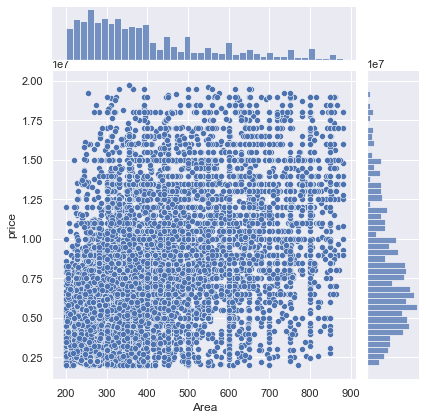

In [330]:
sns.jointplot(x='Area', y='price', data=df, kind='scatter')

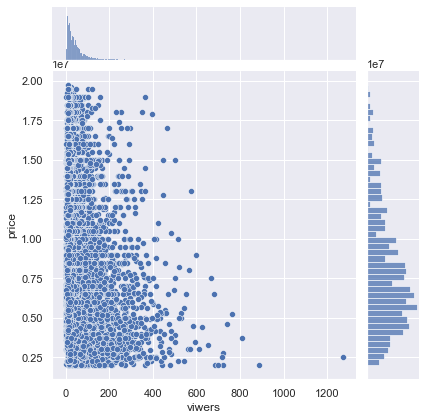

In [331]:
sns.jointplot(x='viwers', y='price', data=df, kind='scatter')
# villas that has low viwes less than 500 have low price

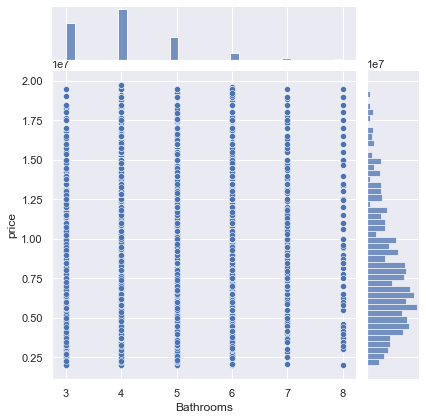

In [332]:
sns.jointplot(x='Bathrooms', y='price', data=df, kind='scatter')
#bathroom that has 10 has hgh and low 

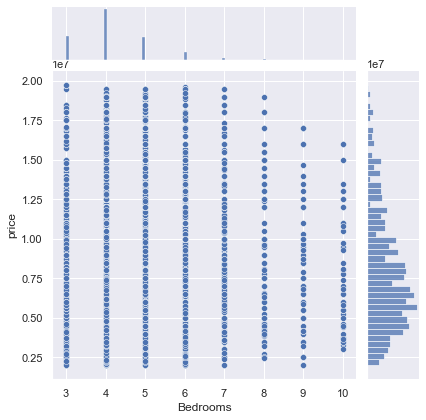

In [333]:
sns.jointplot(x='Bedrooms', y='price', data=df, kind='scatter')

In [334]:
#sns.pairplot(df)

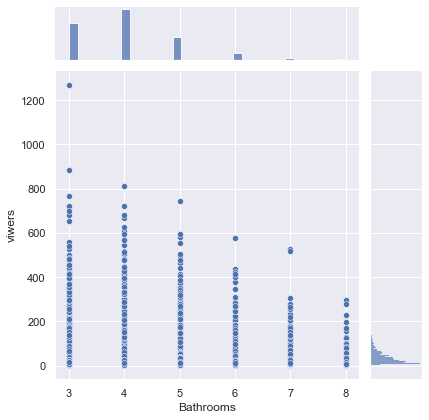

In [335]:
sns.jointplot(x='Bathrooms', y='viwers', data=df, kind='scatter')

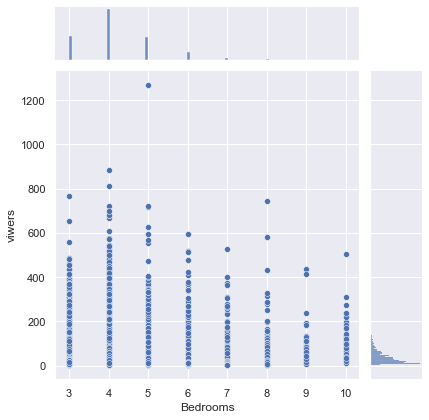

In [336]:
sns.jointplot(x='Bedrooms', y='viwers', data=df, kind='scatter')
#the average of bedrooms that have more viwers from 4->6

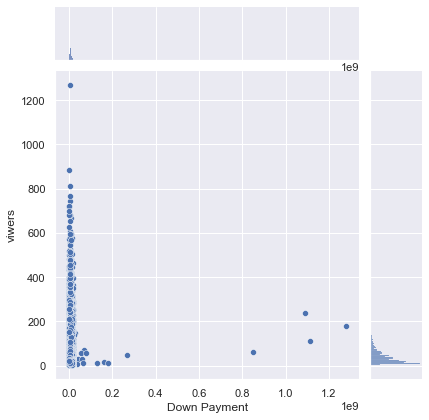

In [337]:
sns.jointplot(x='Down Payment', y='viwers', data=df, kind='scatter')
# the villas that have no dowm payment(cash) have more viwers

<AxesSubplot:xlabel='Type', ylabel='count'>

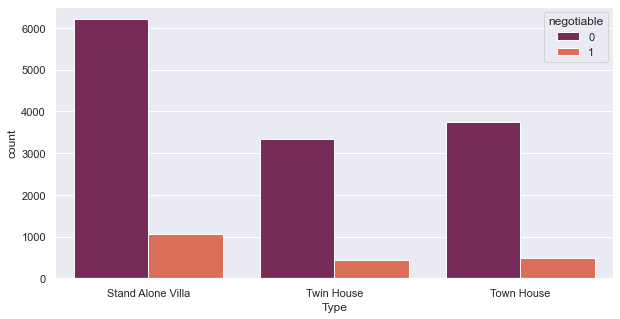

In [338]:
sns.countplot(x='Type',  data=df,palette='rocket' , hue='negotiable')

<AxesSubplot:xlabel='Type', ylabel='count'>

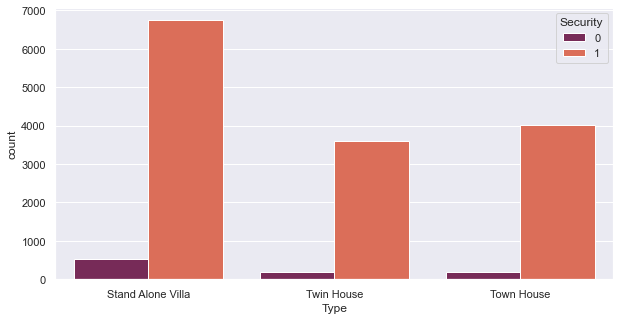

In [339]:
sns.countplot(x='Type',  data=df,palette='rocket' , hue='Security')

<AxesSubplot:xlabel='Type', ylabel='count'>

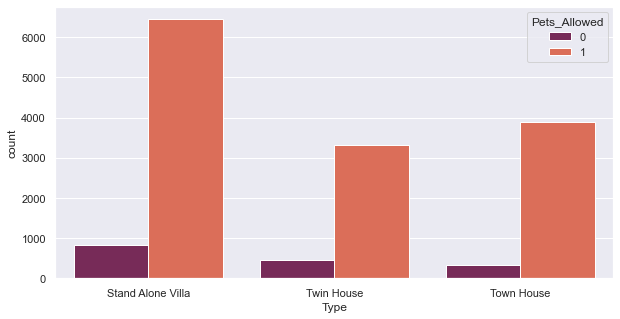

In [340]:
sns.countplot(x='Type',  data=df,palette='rocket' , hue='Pets_Allowed')

<AxesSubplot:xlabel='Type', ylabel='count'>

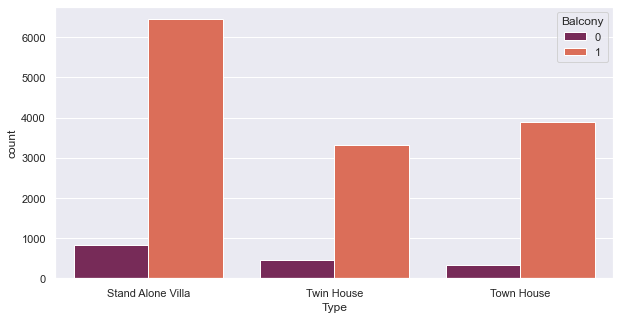

In [341]:
sns.countplot(x='Type',  data=df,palette='rocket' , hue='Balcony')

<AxesSubplot:xlabel='Type', ylabel='count'>

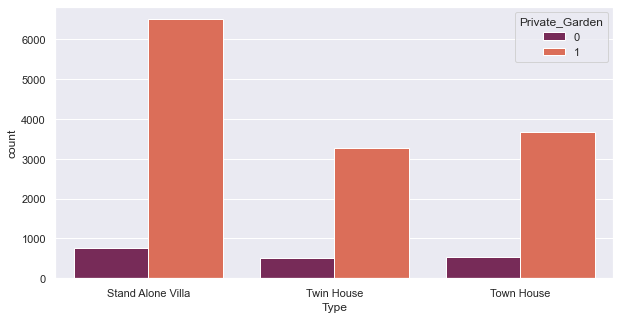

In [342]:
sns.countplot(x='Type',  data=df,palette='rocket' , hue='Private_Garden')

<AxesSubplot:xlabel='Type', ylabel='count'>

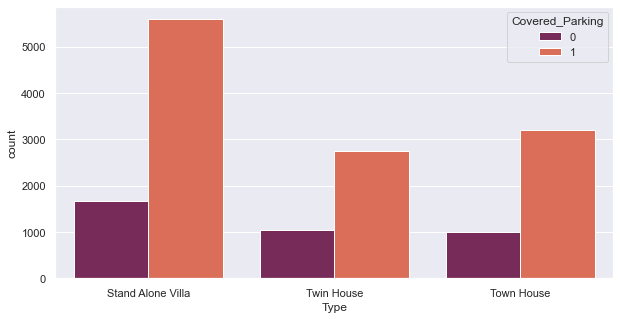

In [343]:
sns.countplot(x='Type',  data=df,palette='rocket' , hue='Covered_Parking')

<AxesSubplot:xlabel='Type', ylabel='count'>

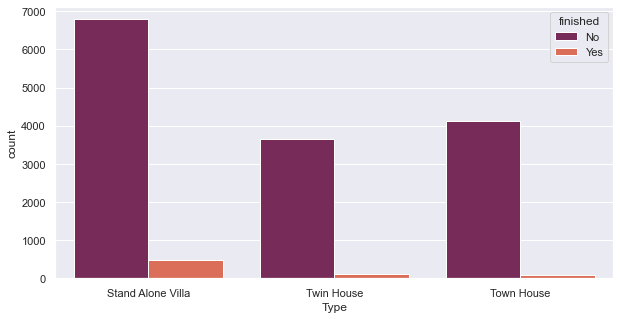

In [344]:
sns.countplot(x='Type',  data=df,palette='rocket' , hue='finished')

<AxesSubplot:xlabel='Type', ylabel='count'>

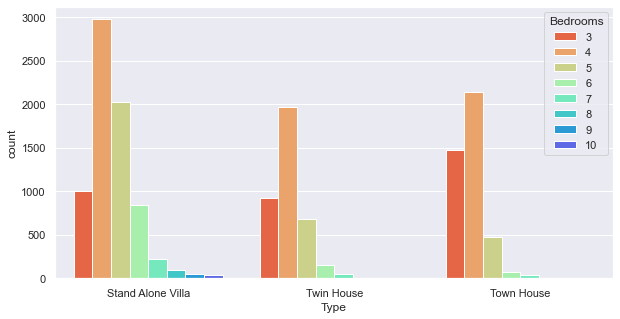

In [345]:
sns.countplot(x='Type',  data=df,palette='rainbow_r' , hue='Bedrooms')
#4 is the hihteset

In [346]:
df['Type'].unique()

array(['Stand Alone Villa', 'Twin House', 'Town House'], dtype=object)

#### Categorical features - Bivariate

<AxesSubplot:xlabel='finished', ylabel='price'>

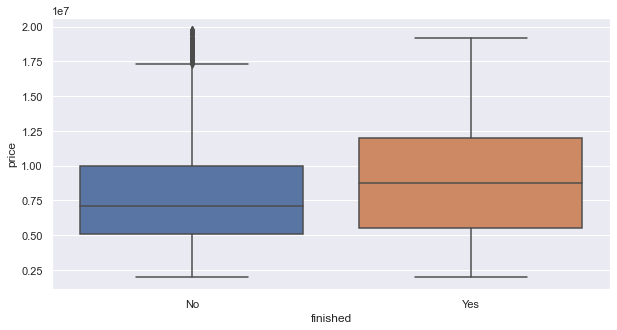

In [347]:
sns.boxplot(y="price", x="finished", data=df)

<AxesSubplot:xlabel='Type', ylabel='price'>

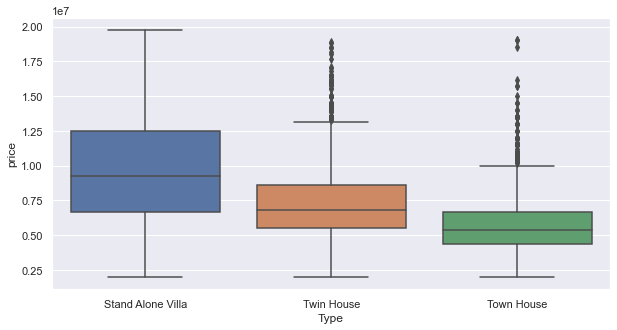

In [348]:
sns.boxplot(y="price", x="Type", data=df)

<AxesSubplot:xlabel='Bathrooms', ylabel='Type'>

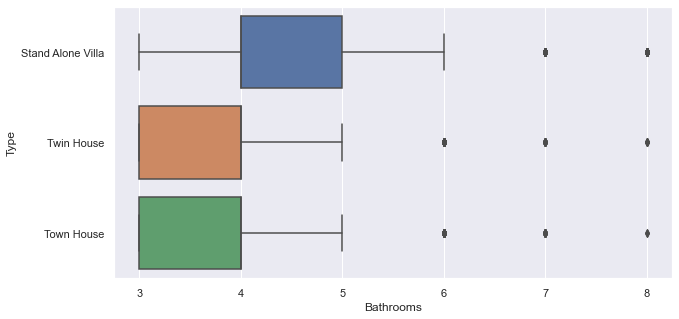

In [349]:
sns.boxplot(x='Bathrooms' , y='Type', data=df)

<AxesSubplot:xlabel='viwers', ylabel='Type'>

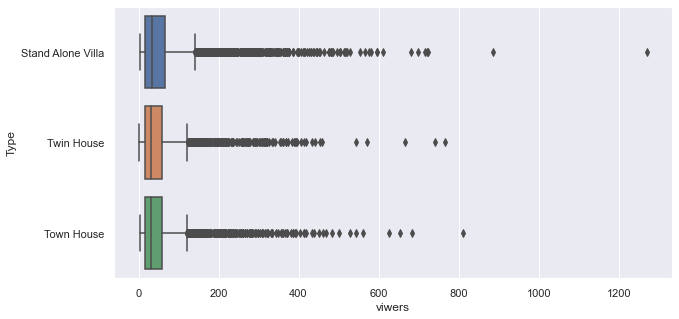

In [350]:
sns.boxplot(x='viwers' , y='Type', data=df)

<AxesSubplot:xlabel='Down Payment', ylabel='Type'>

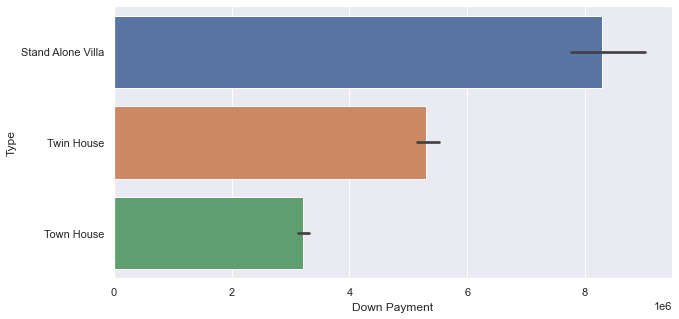

In [351]:
sns.barplot(x='Down Payment' , y='Type', data=df) 

#### Matrix plot ( heatmap)

In [352]:
new_df = pd.pivot_table(values='price' ,index='Month' , columns='Year' , data=df ) 

In [353]:
new_df

Year,2022
Month,
1,7.898299e+06
2,7.983557e+06
3,7.763458e+06


In [354]:
#x=pd.pivot_table(index='location',values='meterprice',columns='compound',data=df,aggfunc=np.mean)


<AxesSubplot:xlabel='Year', ylabel='Month'>

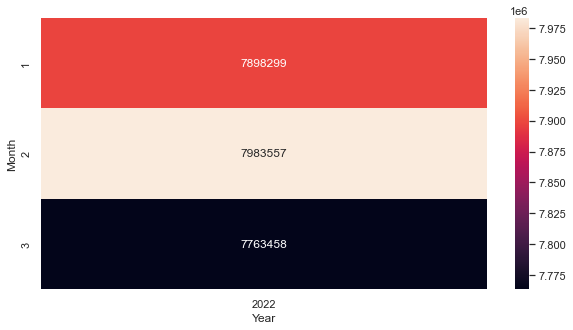

In [355]:
sns.heatmap(new_df , annot=True , fmt='.0f' ,)


<h1 style="font-family:Times New Roman; font-size:2.0em;color:black;"> Data Preprocessing </h1>
<h1 style="font-family:Times New Roman; font-size:1.5em;color:black;"> Feature Transformation:</h1>

- work with categorical data

- Detect and handle outliers

- Split data into train and test

- feaure scaling

<h2 style="font-family:Times New Roman; font-size:2.4m;color:black;"><em>Work with categorical data</em> </h2>

In [356]:
df.columns

Index(['price', 'location', 'title', 'link', 'viwers', 'negotiable',
       'Bedrooms', 'Bathrooms', 'Area', 'Type', 'Compound', 'Delivery Term',
       'finished', 'Delivery Date', 'Down Payment', 'Day', 'Month', 'Year',
       'Season', 'country', 'Cash', 'Installment', 'Balcony', 'Pets_Allowed',
       'Private_Garden', 'Security', 'Electricity_Meter', 'Water_Meter',
       'Natural_Gas', 'Landline', 'Built_in_Kitchen', 'Appliances',
       'Maids_Room', 'Covered_Parking', 'Central_conditioner_heating', 'Pool',
       'Elevator'],
      dtype='object')

In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15255 entries, 0 to 21736
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        15255 non-null  float64
 1   location                     15255 non-null  object 
 2   title                        15255 non-null  object 
 3   link                         15255 non-null  object 
 4   viwers                       15255 non-null  int64  
 5   negotiable                   15255 non-null  int64  
 6   Bedrooms                     15255 non-null  int64  
 7   Bathrooms                    15255 non-null  int64  
 8   Area                         15255 non-null  float64
 9   Type                         15255 non-null  object 
 10  Compound                     15255 non-null  object 
 11  Delivery Term                15255 non-null  float64
 12  finished                     15255 non-null  object 
 13  Delivery Date   

In [358]:
df =df[['price', 'location', 'negotiable',
       'Bedrooms', 'Bathrooms', 'Area', 'Type', 
       'Compound', 'Delivery Term', 'finished', 'Delivery Date',
       'Down Payment', 'Month','country', 'Cash', 'Installment', 'Balcony', 'Pets_Allowed',
       'Private_Garden', 'Security', 'Electricity_Meter', 'Water_Meter',
       'Natural_Gas', 'Landline', 'Built_in_Kitchen', 'Appliances',
       'Maids_Room', 'Covered_Parking', 'Central_conditioner_heating', 'Pool',
       'Elevator']]

In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15255 entries, 0 to 21736
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        15255 non-null  float64
 1   location                     15255 non-null  object 
 2   negotiable                   15255 non-null  int64  
 3   Bedrooms                     15255 non-null  int64  
 4   Bathrooms                    15255 non-null  int64  
 5   Area                         15255 non-null  float64
 6   Type                         15255 non-null  object 
 7   Compound                     15255 non-null  object 
 8   Delivery Term                15255 non-null  float64
 9   finished                     15255 non-null  object 
 10  Delivery Date                15255 non-null  object 
 11  Down Payment                 15255 non-null  float64
 12  Month                        15255 non-null  int64  
 13  country         

In [360]:
df.columns

Index(['price', 'location', 'negotiable', 'Bedrooms', 'Bathrooms', 'Area',
       'Type', 'Compound', 'Delivery Term', 'finished', 'Delivery Date',
       'Down Payment', 'Month', 'country', 'Cash', 'Installment', 'Balcony',
       'Pets_Allowed', 'Private_Garden', 'Security', 'Electricity_Meter',
       'Water_Meter', 'Natural_Gas', 'Landline', 'Built_in_Kitchen',
       'Appliances', 'Maids_Room', 'Covered_Parking',
       'Central_conditioner_heating', 'Pool', 'Elevator'],
      dtype='object')

<h2 style="font-family:Times New Roman; font-size:2.4m;color:black;"><em> Ordinal Data:- (Type ,  finished , Delivery Date ,Season) </em> </h2>


In [361]:
Type_dict = {'Stand Alone Villa':1, 
        'Town House':2,
        'Twin House':3}

# apply using map
df['Type'] = df['Type'].map(Type_dict)



In [362]:
# Payment_Option_dict = {'Cash or Installment':1, 
#         'Cash':2,
#         'Installment':3}
# df['Payment Option'] = df['Payment Option'].map(Payment_Option_dict)

In [363]:
DeliveryDate_dict = {'Ready to move':1, 
        'soon':2, 
        'within 6 months':3, 
        '2022':4, 
        '2023':5, 
        '2024':6,
         '2025':7,
        '2026':8,
        '2027':9}

# apply using map
df['Delivery Date'] = df['Delivery Date'].map(DeliveryDate_dict)

In [364]:
df['finished'].unique()

array(['No', 'Yes'], dtype=object)

In [365]:
finished_dict = {'Yes':1, 'No':0}

# apply using map
df['finished'] = df['finished'].map(finished_dict)

In [366]:
df['Delivery Term'].unique()

array([4.        , 1.        , 3.        , 2.        , 2.24151394])

In [367]:
# Delivery_Term_dict = {'Core & Shell':1, 'Finished':2, 'Semi Finished':3, 'Not Finished':4,}

# # apply using map
# df['Delivery Term'] = df['Delivery Term'].map(Delivery_Term_dict)

In [368]:
# df['Season'].unique()

In [369]:
# Season_dict = {'Spring':1, 
#         'Winter':2}

# # apply using map
# df['Season'] = df['Season'].map(Season_dict)

In [370]:
df.columns

Index(['price', 'location', 'negotiable', 'Bedrooms', 'Bathrooms', 'Area',
       'Type', 'Compound', 'Delivery Term', 'finished', 'Delivery Date',
       'Down Payment', 'Month', 'country', 'Cash', 'Installment', 'Balcony',
       'Pets_Allowed', 'Private_Garden', 'Security', 'Electricity_Meter',
       'Water_Meter', 'Natural_Gas', 'Landline', 'Built_in_Kitchen',
       'Appliances', 'Maids_Room', 'Covered_Parking',
       'Central_conditioner_heating', 'Pool', 'Elevator'],
      dtype='object')

<h2 style="font-family:Times New Roman; font-size:2.4m;color:black;"><em> Nominal Data:- (location, Compound ,country) </em> </h2>


In [371]:
len(df['location'].unique())

120

In [372]:
len(df['Compound'].unique())

279

In [373]:
df=pd.get_dummies(df, columns=['location' ,'Compound','country'],drop_first=True)

In [374]:
df

,price,negotiable,Bedrooms,Bathrooms,Area,Type,Delivery Term,finished,Delivery Date,Down Payment,...,country_Matruh,country_Minya,country_Monufia,country_Port Said,country_Qalyubia,country_Red Sea,country_Sharqia,country_Sohag,country_South Sinai,country_Suez
0,7400000.0,0,4,4,338.0,1,4.000000,0,1,740000.0,...,0,0,0,0,0,0,0,0,0,0
1,7700000.0,0,3,3,456.0,1,1.000000,0,1,7700000.0,...,0,0,0,0,0,0,0,0,0,0
3,6500000.0,0,4,4,255.0,3,3.000000,0,1,6500000.0,...,0,0,0,0,0,0,0,0,0,0
4,12000000.0,0,4,3,800.0,1,1.000000,0,1,1.0,...,0,0,0,0,0,0,0,0,0,0
6,11000000.0,1,5,3,530.0,1,1.000000,0,1,11000000.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21731,6200000.0,0,4,4,300.0,3,3.000000,0,1,1240000.0,...,0,0,0,0,0,0,0,0,0,0
21732,15380000.0,0,5,5,630.0,1,4.000000,0,1,15380000.0,...,0,0,0,0,0,0,0,0,0,0
21734,5500000.0,0,5,6,250.0,2,2.241514,0,1,5500000.0,...,0,0,0,0,0,0,0,0,0,0
21735,5500000.0,0,5,6,250.0,2,2.241514,0,1,5500000.0,...,0,0,0,0,0,0,0,0,0,0


In [375]:
df.columns

Index(['price', 'negotiable', 'Bedrooms', 'Bathrooms', 'Area', 'Type',
       'Delivery Term', 'finished', 'Delivery Date', 'Down Payment',
       ...
       'country_Matruh', 'country_Minya', 'country_Monufia',
       'country_Port Said', 'country_Qalyubia', 'country_Red Sea',
       'country_Sharqia', 'country_Sohag', 'country_South Sinai',
       'country_Suez'],
      dtype='object', length=447)

In [376]:
df['Cash'].dtypes

dtype('float64')

In [377]:
type(df['price'])

pandas.core.series.Series

In [378]:
x=df.shape[1]
x

447

<h2 style="font-family:Times New Roman; font-size:2.4m;color:black;"><em> Detect and handle outliers </em> </h2>

In [379]:
from datasist.structdata import detect_outliers
from scipy import stats

In [380]:
outliers_indices = detect_outliers(df, 0, ['price','Area','Down Payment'])
len(outliers_indices)

558

In [381]:
# outliers = df.iloc[outliers_indices]

In [382]:
clean = df.drop(outliers_indices , axis=0)


In [383]:
columns=list(df.columns)
columns

['price',
 'negotiable',
 'Bedrooms',
 'Bathrooms',
 'Area',
 'Type',
 'Delivery Term',
 'finished',
 'Delivery Date',
 'Down Payment',
 'Month',
 'Cash',
 'Installment',
 'Balcony',
 'Pets_Allowed',
 'Private_Garden',
 'Security',
 'Electricity_Meter',
 'Water_Meter',
 'Natural_Gas',
 'Landline',
 'Built_in_Kitchen',
 'Appliances',
 'Maids_Room',
 'Covered_Parking',
 'Central_conditioner_heating',
 'Pool',
 'Elevator',
 'location_15 May City',
 'location_6th of October',
 'location_Abu Talat',
 'location_Agami',
 'location_Agouza',
 'location_Ain Shams',
 'location_Ain Sukhna',
 'location_Al Hadrah',
 'location_Al Ibrahimiyyah',
 'location_Al Manial',
 'location_Alamein',
 'location_Almazah',
 'location_Amreya',
 'location_Ard El Lewa',
 'location_Ashmon',
 'location_Asyut City',
 'location_Attarin',
 'location_Badr City',
 'location_Bagour',
 'location_Banha',
 'location_Basyoun',
 'location_Beni Suef City',
 'location_Bilbeis',
 'location_Borg al-Arab',
 'location_Boulaq Dakrour',
 

<h2 style="font-family:Times New Roman; font-size:2.4m;color:black;"><em>Data Split to Train and Test Sets </em> </h2>

<img src='https://developers.google.com/machine-learning/crash-course/images/PartitionTwoSets.svg'>

In [384]:
"""
from datasist.structdata import detect_outliers
idx = ['area','price','meterprice','down_payment']
for col in idx:
    outliers_indices = detect_outliers(df, 0, [col])
    col_median = df[col].median()
    df[col].iloc[outliers_indices] = col_median
"""

"\nfrom datasist.structdata import detect_outliers\nidx = ['area','price','meterprice','down_payment']\nfor col in idx:\n    outliers_indices = detect_outliers(df, 0, [col])\n    col_median = df[col].median()\n    df[col].iloc[outliers_indices] = col_median\n"

<h2 style="font-family:Times New Roman; font-size:2.4m;color:black;"><em>Split data into train and test </em> </h2>


In [385]:
df.shape


(15255, 447)

In [386]:
x = df.drop('price', axis=1)
y = df['price']

In [387]:
x

,negotiable,Bedrooms,Bathrooms,Area,Type,Delivery Term,finished,Delivery Date,Down Payment,Month,...,country_Matruh,country_Minya,country_Monufia,country_Port Said,country_Qalyubia,country_Red Sea,country_Sharqia,country_Sohag,country_South Sinai,country_Suez
0,0,4,4,338.0,1,4.000000,0,1,740000.0,3,...,0,0,0,0,0,0,0,0,0,0
1,0,3,3,456.0,1,1.000000,0,1,7700000.0,3,...,0,0,0,0,0,0,0,0,0,0
3,0,4,4,255.0,3,3.000000,0,1,6500000.0,3,...,0,0,0,0,0,0,0,0,0,0
4,0,4,3,800.0,1,1.000000,0,1,1.0,2,...,0,0,0,0,0,0,0,0,0,0
6,1,5,3,530.0,1,1.000000,0,1,11000000.0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21731,0,4,4,300.0,3,3.000000,0,1,1240000.0,1,...,0,0,0,0,0,0,0,0,0,0
21732,0,5,5,630.0,1,4.000000,0,1,15380000.0,1,...,0,0,0,0,0,0,0,0,0,0
21734,0,5,6,250.0,2,2.241514,0,1,5500000.0,1,...,0,0,0,0,0,0,0,0,0,0
21735,0,5,6,250.0,2,2.241514,0,1,5500000.0,1,...,0,0,0,0,0,0,0,0,0,0


In [388]:
from sklearn.model_selection import train_test_split

In [389]:
X_train, X_test, y_train, y_test = train_test_split(x, y,  test_size=0.2 )#random_state=1)

In [390]:
X_train

,negotiable,Bedrooms,Bathrooms,Area,Type,Delivery Term,finished,Delivery Date,Down Payment,Month,...,country_Matruh,country_Minya,country_Monufia,country_Port Said,country_Qalyubia,country_Red Sea,country_Sharqia,country_Sohag,country_South Sinai,country_Suez
18791,0,4,4,458.0,1,4.000000,0,1,18000000.0,1,...,0,0,0,0,0,0,0,0,0,0
4887,0,4,3,240.0,2,3.000000,0,6,480000.0,3,...,0,0,0,0,0,0,0,0,0,0
1044,0,4,3,220.0,2,4.000000,0,6,300000.0,3,...,0,0,0,0,0,0,0,0,0,0
12727,0,5,5,420.0,3,3.000000,0,8,6450000.0,2,...,0,0,0,0,0,0,0,0,0,0
4753,0,5,4,319.0,2,2.241514,0,1,4500000.0,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18730,1,4,5,280.0,3,1.000000,0,1,9500000.0,1,...,0,0,0,0,0,0,0,0,0,0
4598,0,6,6,383.0,1,2.241514,0,6,916000.0,3,...,0,0,0,0,0,0,0,0,0,0
13996,0,8,5,600.0,1,2.000000,0,1,3900000.0,2,...,0,0,0,0,0,0,0,0,0,0
15371,0,3,3,200.0,1,2.241514,0,1,4500000.0,2,...,0,0,0,0,0,0,0,0,0,0


In [391]:
X_train.shape

(12204, 446)

In [392]:
X_test.shape

(3051, 446)

In [393]:
y_train.shape

(12204,)

In [394]:
y_test.shape

(3051,)

In [395]:
x.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15255 entries, 0 to 21736
Data columns (total 446 columns):
 #    Column                                  Dtype  
---   ------                                  -----  
 0    negotiable                              int64  
 1    Bedrooms                                int64  
 2    Bathrooms                               int64  
 3    Area                                    float64
 4    Type                                    int64  
 5    Delivery Term                           float64
 6    finished                                int64  
 7    Delivery Date                           int64  
 8    Down Payment                            float64
 9    Month                                   int64  
 10   Cash                                    float64
 11   Installment                             float64
 12   Balcony                                 Int32  
 13   Pets_Allowed                            Int32  
 14   Private_Garden      

<h2 style="font-family:Times New Roman; font-size:2.4m;color:black;"><em>feaure scaling</em> </h2>

In [396]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [397]:
scaler = StandardScaler()

In [398]:
scaler.fit(X_train)
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

In [399]:
# x_train[columns] = scaler.transform(x_train[columns])
# x_test[columns] = scaler.transform(X_test[columns])

In [400]:
raise Exception

Exception: 

## Machine Learning

In [401]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    'LR': LinearRegression(),
    'DT': DecisionTreeRegressor(max_depth=200),#max_depth=180
    'KNN': KNeighborsRegressor(),#n_neighbors=9
    'SVM': SVR(), #kernel='rbf'
    'RF': RandomForestRegressor(n_estimators=100,max_depth=6),#n_estimators=200,max_depth=330
    'XGB': XGBRegressor()#n_estimators=200


}

for name, model in models.items():
    print(f'Training {name}...')
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'Testing Score: {model.score(x_test, y_test)}')
    y_pred = model.predict(x_test)
    print(f'Testing RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'Testing MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'Testing R2: {r2_score(y_test, y_pred)}')
    print('-'*50)

Training LR...
Training Score: 0.6151409532282706
Testing Score: -2.741385328197462e+25
Testing RMSE: 1.920179422618186e+19
Testing MAE: 5.6885576123491776e+17
Testing R2: -2.741385328197462e+25
--------------------------------------------------
Training DT...
Training Score: 0.9999999850494112
Testing Score: 0.9015219205501992
Testing RMSE: 1150870.7553274531
Testing MAE: 291480.38042050356
Testing R2: 0.9015219205501993
--------------------------------------------------
Training KNN...
Training Score: 0.7093474697356218
Testing Score: 0.5393726162505488
Testing RMSE: 2489038.679670145
Testing MAE: 1721531.3764011797
Testing R2: 0.5393726162505488
--------------------------------------------------
Training SVM...
Training Score: -0.03797363172120427
Testing Score: -0.03311531361760678
Testing RMSE: 3727616.013656059
Testing MAE: 2872637.4844967276
Testing R2: -0.03311531361760678
--------------------------------------------------
Training RF...
Training Score: 0.8894537965364566
Testi

In [402]:
y_pred

array([ 9247323. , 14979664. ,  3876809.8, ..., 10275564. ,  6851671.5,
        8832261. ], dtype=float32)

In [403]:
y_test

20708     8989900.0
17020    15000000.0
7239      4100000.0
4808     13500000.0
15155     6000000.0
            ...    
15160    11500000.0
13667     4000000.0
6542     11000000.0
2839      6850000.0
14891     9500000.0
Name: price, Length: 3051, dtype: float64

<h3>XGBRegressor is the best model</h3>

In [404]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [405]:
model = XGBRegressor()#n_estimators=200
model.fit(x_train, y_train)
print(f'Training Score: {model.score(x_train, y_train)}')
print(f'Testing Score: {model.score(x_test, y_test)}')
y_pred = model.predict(x_test)
print(f'Testing RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'Testing MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'Testing R2: {r2_score(y_test, y_pred)}')

Training Score: 0.9756972396182299
Testing Score: 0.939472894621581
Testing RMSE: 902260.036442821
Testing MAE: 382299.3593903638
Testing R2: 0.939472894621581


<h4>save model and scaler: </h4>

In [409]:
import joblib
import pickle

In [410]:
file_name = 'xgb.pkl'

In [411]:
#joblib.dump(model , 'model.h5')
# model.save_model("model.json")
#save model
pickle.dump(model , open(file_name,'wb'))

In [412]:
joblib.dump(scaler , 'scaler.h5')

['scaler.h5']

### Get dummies for web deployment

In [ ]:
columns=list(df.columns)
columns

In [ ]:
#check dummies col with original
count=0
for i in columns:
    if 'country' in i:
        count=count+1
count    

In [ ]:
ze1=[]
ze1=columns[columns.index('Compound_90 Avenue'):columns.index('country_Asyut')]
comp={}
c=0
for i in ze1:
    x=df[df[i]==1].iloc[0][ze1]
    comp[i]=x.values.astype(int).tolist()
    c=c+1
comp


In [ ]:
ze4=[]
ze4=columns[columns.index('country_Asyut'):]
con={}
c=0
for i in ze4:
    x=df[df[i]==1].iloc[0][ze4]
    con[i]=x.values.astype(int).tolist()
    c=c+1
con

In [ ]:
ze20=[]
ze20=columns[columns.index('location_15 May City'):columns.index('Compound_90 Avenue')]
loc={}
c=0
for i in ze20:
    x=df[df[i]==1].iloc[0][ze20]
    loc[i]=x.values.astype(int).tolist()
    c=c+1
loc


In [ ]:
# ze5=[]
# ze5=columns[columns.index('delivery_term_Finished'):]
# loc={}
# c=0
# for i in ze5:
#     x=df[df[i]==1].iloc[0][ze5]
#     loc[i]=x.values.astype(int).tolist()
#     c=c+1
# loc